# Title: Comparison of SAM2.1 generated data with ground truth data-Digital caliper measured data (Gold standard) Seed Analyzer data (Silver standard)

Author: Harpreet Kaur Bargota

Email: harpreet.bargota@agr.gc.ca

Date: Jan 19, 2026

### Datasets used:

1. For ground_truth (Machine measured and hand measured data): The excel file is "Faba_Seed_Analyzer_Data_August_2024.xlsx". 
Machine measured data and hand measured is available for some of the images.

2. Dataset for SAM2.1 measured data: ouput_FE_SAM2.1/FE_Color.csv

Acronyms used: DCM-Digital caliper measured data, MM-Seed analyzer machine measured data, SAM-Segmentanything 2.1 model genertaed data

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, shapiro, levene, f_oneway, kruskal, linregress
from statsmodels.stats.api import DescrStatsW

In [2]:
#import the libraries required for analysis
import pandas as pd
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from scipy.stats import (pearsonr, ttest_rel, f_oneway, spearmanr, shapiro, levene, wilcoxon, kruskal, skew, kurtosis )
import warnings
warnings.filterwarnings(action='ignore')

## Read the groundtruth datafiles

In [3]:
#Read the hand and machine measured data
ground_truth = pd.read_excel(r"../Groundtruth_data/Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name= "Individual S2 Seed Data")

In [4]:
#Check the first few rows of dataset
ground_truth.head(2)

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)      NC_1  \
0      NaN         NaN        NaN         NaN        NaN       NaN   
1  Vf1-1-2    21.09744  14.532204  241.729082    34121.0  1.592133   

   Circularity  L/W Ratio  Unnamed: 8               Length(mm).1  Width(mm).1  \
0          NaN        NaN         NaN  By Hand Measurements (mm)          NaN   
1      1.17374   1.451772         NaN                         20         14.0   

   Unnamed: 11             Length(mm).2 Width(mm).2  Unnamed: 14 Unnamed: 15  \
0          NaN  By Digital Measure (mm)         NaN          NaN         NaN   
1          NaN                    19.23       13.07          NaN         NaN   

   Unnamed: 16                                        Unnamed: 17 Unnamed: 18  
0          NaN  *measured by estimating the widest point with ...         NaN  
1          NaN  *are the same seeds that were photographed, bu...         NaN

In [5]:
ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            4047 non-null   object 
 1   Length(mm)    4047 non-null   float64
 2   Width(mm)     4047 non-null   float64
 3   Area(mm²)     4047 non-null   float64
 4   Area(pix)     4047 non-null   float64
 5   NC_1          4047 non-null   float64
 6   Circularity   4047 non-null   float64
 7   L/W Ratio     4047 non-null   float64
 8   Unnamed: 8    0 non-null      float64
 9   Length(mm).1  77 non-null     object 
 10  Width(mm).1   76 non-null     float64
 11  Unnamed: 11   0 non-null      float64
 12  Length(mm).2  1021 non-null   object 
 13  Width(mm).2   1019 non-null   object 
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   1 non-null      object 
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   3 non-null      object 
 18  Unnamed: 18   2 non-null    

In [6]:
# print the columns and index of dataframe
print (ground_truth.columns)
print (ground_truth.index)

Index(['ID', 'Length(mm)', 'Width(mm)', 'Area(mm²)', 'Area(pix)', 'NC_1',
       'Circularity', 'L/W Ratio', 'Unnamed: 8', 'Length(mm).1', 'Width(mm).1',
       'Unnamed: 11', 'Length(mm).2', 'Width(mm).2', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')
RangeIndex(start=0, stop=4048, step=1)


The dataset contains many columns, data from different dtypes, and missing data. The dataset has to be cleaned for further analysis. 

## Dataset Cleaning and Wrangling

### Machine measured data from groundtruth data

Machine measured data is available in the first 8 columns and there is also an unnecessary column 'NC_1'.

In [7]:
# For machine measured data, create a new df from this df containing the machine measured data and drop the column 'NC_1' (Unnecessary)
groundtruth_MM=ground_truth.iloc[:,:8]
groundtruth_MM=groundtruth_MM.drop("NC_1", axis=1)

In [8]:
print (groundtruth_MM.head(5))
print ("-------------------------------------------------------------------------------------------------------")
print (groundtruth_MM.tail(5))

        ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
0      NaN         NaN        NaN         NaN        NaN          NaN   
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   
3  Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   
4  Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   

   L/W Ratio  
0        NaN  
1   1.451772  
2   1.354366  
3   1.375558  
4   1.291562  
-------------------------------------------------------------------------------------------------------
             ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
4043  Vf224-3-2   17.345747  12.956161  177.769928    25134.0     1.159056   
4044  Vf224-3-2   16.721651  12.742646  163.455141    23121.0     1.158142   
4045  Vf224-3-2   16.421493  12.765793  160.689378    22730.0     1.148970   
4046  Vf224-3-2   17.111377  12.677538  169.940747    2

The empty row of cells was dropped.

In [9]:
#drop the first row

groundtruth_MM=groundtruth_MM.drop([0], axis=0)
groundtruth_MM.head()

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   
3  Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   
4  Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   
5  Vf4-1-1    7.801351   6.669074   39.739078     5681.0     1.155499   

   L/W Ratio  
1   1.451772  
2   1.354366  
3   1.375558  
4   1.291562  
5   1.169780

In [10]:
groundtruth_MM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 1 to 4047
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           4047 non-null   object 
 1   Length(mm)   4047 non-null   float64
 2   Width(mm)    4047 non-null   float64
 3   Area(mm²)    4047 non-null   float64
 4   Area(pix)    4047 non-null   float64
 5   Circularity  4047 non-null   float64
 6   L/W Ratio    4047 non-null   float64
dtypes: float64(6), object(1)
memory usage: 221.4+ KB


The datatype for seed analyzer measured data is object (string for class) and float (numerical for parameters)

#### Check for missing values

In [11]:
#Check for missing values
x=groundtruth_MM.isnull().sum()
print (x)

ID             0
Length(mm)     0
Width(mm)      0
Area(mm²)      0
Area(pix)      0
Circularity    0
L/W Ratio      0
dtype: int64


Machine measured data had no missing values.

#### Set the column 'ID' as the index 

In [12]:
#Set index on a Dataframe
groundtruth_MM=groundtruth_MM.set_index("ID")
#Check the df
print (groundtruth_MM.head(5))

         Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  L/W Ratio
ID                                                                           
Vf1-1-2   21.097440  14.532204  241.729082    34121.0     1.173740   1.451772
Vf1-1-2   19.485046  14.386841  219.192047    30962.0     1.173565   1.354366
Vf1-1-2   19.970481  14.518098  230.741071    32586.0     1.162884   1.375558
Vf1-1-2   17.850534  13.820892  186.338789    26346.0     1.162423   1.291562
Vf4-1-1    7.801351   6.669074   39.739078     5681.0     1.155499   1.169780


#### Conversion of strings in the Index to be capitalized

In [13]:
# Convert strings in the Index to be capitalized to have a uniform pattern
groundtruth_MM.index = groundtruth_MM.index.str.capitalize()

#### Sort the index in the increasing order

In [14]:
groundtruth_MM=groundtruth_MM.sort_index()
print (groundtruth_MM.head(5))

           Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf100-1-2   13.425316  11.482318  113.067520    16028.0     1.130719   

           L/W Ratio  
ID                    
Vf1-1-2     1.451772  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.291562  
Vf100-1-2   1.169217  


#### Sort the index based on the increasing order of area (pix) for each image

In [15]:
GT= groundtruth_MM.groupby(groundtruth_MM.index).apply(lambda group: group.sort_values(by=["Area(pix)", "Length(mm)", "Width(mm)"], 
                                            ascending=[True, True, True])).reset_index(level=0, drop=True)

In [16]:
GT.head(5)

Length(mm)  Width(mm)   Area(mm²)  Area(pix)  Circularity  \
ID                                                                     
Vf1-1-2     17.850534  13.820892  186.338789    26346.0     1.162423   
Vf1-1-2     19.485046  14.386841  219.192047    30962.0     1.173565   
Vf1-1-2     19.970481  14.518098  230.741071    32586.0     1.162884   
Vf1-1-2     21.097440  14.532204  241.729082    34121.0     1.173740   
Vf100-1-2   11.689805  10.722634   87.829043    12471.0     1.189027   

           L/W Ratio  
ID                    
Vf1-1-2     1.291562  
Vf1-1-2     1.354366  
Vf1-1-2     1.375558  
Vf1-1-2     1.451772  
Vf100-1-2   1.090199

#### Rename the columns for differentiating between different methods 

In [17]:
# rename the columns
GT = GT.rename(columns={"Length(mm)": "Length(mm)-MM", "Width(mm)": "Width(mm)-MM",
                        "Area(mm²)": "Area(mm²)-MM", "Area(pix)": "Area(pix)-MM",
                        "L/W Ratio": "L/W Ratio-MM",
                        "Circularity": "Circularity-MM"
                        })

print (GT.head(2))

         Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                 
Vf1-1-2      17.850534     13.820892    186.338789       26346.0   
Vf1-1-2      19.485046     14.386841    219.192047       30962.0   

         Circularity-MM  L/W Ratio-MM  
ID                                     
Vf1-1-2        1.162423      1.291562  
Vf1-1-2        1.173565      1.354366  


#### Check the info and datatype

In [18]:
GT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)-MM   4047 non-null   float64
 1   Width(mm)-MM    4047 non-null   float64
 2   Area(mm²)-MM    4047 non-null   float64
 3   Area(pix)-MM    4047 non-null   float64
 4   Circularity-MM  4047 non-null   float64
 5   L/W Ratio-MM    4047 non-null   float64
dtypes: float64(6)
memory usage: 221.3+ KB


The dataframe "GT" contains the machine measured data

### Digital caliper-measured data extracted from ground truth document:

In [19]:
#Read the hand and machine measured data
# ground_truth = pd.read_excel(r"Faba Seed Analyzer Data August 2024.xlsx", sheet_name= "Individual S2 Seed Data")

ground_truth = pd.read_excel(r"../Groundtruth_data/Faba_Seed_Analyzer_Data_August_2024.xlsx", sheet_name= "Individual S2 Seed Data")

In [20]:
ground_truth.head(3)

ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)      NC_1  \
0      NaN         NaN        NaN         NaN        NaN       NaN   
1  Vf1-1-2   21.097440  14.532204  241.729082    34121.0  1.592133   
2  Vf1-1-2   19.485046  14.386841  219.192047    30962.0  1.279656   

   Circularity  L/W Ratio  Unnamed: 8               Length(mm).1  Width(mm).1  \
0          NaN        NaN         NaN  By Hand Measurements (mm)          NaN   
1     1.173740   1.451772         NaN                         20         14.0   
2     1.173565   1.354366         NaN                         20         14.0   

   Unnamed: 11             Length(mm).2 Width(mm).2  Unnamed: 14 Unnamed: 15  \
0          NaN  By Digital Measure (mm)         NaN          NaN         NaN   
1          NaN                    19.23       13.07          NaN         NaN   
2          NaN                    20.06       14.54          NaN         NaN   

   Unnamed: 16                                        Unnamed: 17 Unnamed: 18  
0          NaN  *measured by estimating the widest point with ...         NaN  
1          NaN  *are the same seeds that were photographed, bu...         NaN  
2          NaN                                                NaN         NaN

#### Extract data-The digital-caliper measured data has the length and width measured in mm.

In [21]:
# Get the subset of digital-caliper measured data from the main df
DCM=ground_truth.iloc[1:,[0,12,13]]
DCM.head(4)

ID Length(mm).2 Width(mm).2
1  Vf1-1-2        19.23       13.07
2  Vf1-1-2        20.06       14.54
3  Vf1-1-2        20.41       14.32
4  Vf1-1-2        17.59       13.63

In [22]:
#Check for the df
DCM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 1 to 4047
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            4047 non-null   object
 1   Length(mm).2  1020 non-null   object
 2   Width(mm).2   1019 non-null   object
dtypes: object(3)
memory usage: 95.0+ KB


DCM contains the columns of class-ID, length and width. Rename these columns for easy identification

#### Rename these columns for easy identification

In [23]:
#Rename the columns for easy identification
DCM = DCM.rename(columns={
                "Unnamed: 0": "ID",
                "Length(mm).2": "Length(mm)_DCM",
                "Width(mm).2": "Width(mm)_DCM"
                })

DCM.head(4)

ID Length(mm)_DCM Width(mm)_DCM
1  Vf1-1-2          19.23         13.07
2  Vf1-1-2          20.06         14.54
3  Vf1-1-2          20.41         14.32
4  Vf1-1-2          17.59         13.63

#### Set the index to 'ID'

In [24]:
#set the index 
DCM=DCM.set_index("ID")
DCM.head(4)

Length(mm)_DCM Width(mm)_DCM
ID                                  
Vf1-1-2          19.23         13.07
Vf1-1-2          20.06         14.54
Vf1-1-2          20.41         14.32
Vf1-1-2          17.59         13.63

In [25]:
#check df
DCM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf224-3-2
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Length(mm)_DCM  1020 non-null   object
 1   Width(mm)_DCM   1019 non-null   object
dtypes: object(2)
memory usage: 94.9+ KB


#### Capitalize the string of index so as to have a uniform pattern in index

In [26]:
DCM.index = DCM.index.str.capitalize()

#### Sort the values of index in increasing order

In [27]:
DCM=DCM.sort_index()
print (DCM.head(20))

          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf1-1-2            19.23         13.07
Vf1-1-2            20.06         14.54
Vf1-1-2            20.41         14.32
Vf1-1-2            17.59         13.63
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf100-1-2            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN
Vf101-1-3            NaN           NaN


The datatype of Length and Width is object. Except for Nan (string-object dtype), the dtype should be float or int as there are numerical values. To confirm if there are any other strings except nan, check for the strings in length and Width

#### Check for string 

In [28]:
# Function to check if a value is a string
def is_string(value):
    return isinstance(value, str)

# Filter DataFrame
filtered_df = DCM[DCM["Length(mm)_DCM"].apply(is_string)]

print(filtered_df)

# Filter DataFrame
filtered_df = DCM[DCM["Width(mm)_DCM"].apply(is_string)]

print(filtered_df)


          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf126-1-1          14,38         10.38
Vf542-1-1          15,39          10.9
Vf66-1-1           15,41         10.56
          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf295-1-1          10.83          7,97


There are typo-errors (comma, instead of . for numerical value) in the length and width data. 

#### Replace the comma

In [29]:
# replace the , to . for numerical data
DCM["Length(mm)_DCM"] = DCM["Length(mm)_DCM"].replace(',', '.', regex=True)  # Replace commas with dots
DCM["Width(mm)_DCM"] = DCM["Width(mm)_DCM"].replace(',', '.', regex=True)  # Replace commas with dots

In [30]:
# check if the , has been replaced
filtered_df = DCM[DCM["Length(mm)_DCM"].apply(is_string)]

print(filtered_df)

# Filter DataFrame
filtered_df1 = DCM[DCM["Width(mm)_DCM"].apply(is_string)]
print(filtered_df1)


          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf126-1-1          14.38         10.38
Vf542-1-1          15.39          10.9
Vf66-1-1           15.41         10.56
          Length(mm)_DCM Width(mm)_DCM
ID                                    
Vf295-1-1          10.83          7.97


In [31]:
#change data deom object to float
r = DCM.select_dtypes(include='object').columns
DCM[r] = DCM[r].astype(float)
DCM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4047 entries, Vf1-1-2 to Vf99-4-1
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  1020 non-null   float64
 1   Width(mm)_DCM   1019 non-null   float64
dtypes: float64(2)
memory usage: 223.9+ KB


In [32]:
# Find the index where 'LEngth' is non-null and 'Width' is null
index_incompl = DCM[(DCM["Length(mm)_DCM"].notnull()) & (DCM["Width(mm)_DCM"].isnull())].index
index_incompl

Index(['Vf423-1-1'], dtype='object', name='ID')

In [33]:
 DCM.loc["Vf423-1-1"]

Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf423-1-1             NaN            NaN
Vf423-1-1           17.24            NaN
Vf423-1-1             NaN            NaN
Vf423-1-1           11.66          10.78
Vf423-1-1           18.01          13.77
Vf423-1-1             NaN            NaN
Vf423-1-1           10.59           8.06
Vf423-1-1             NaN            NaN
Vf423-1-1             NaN            NaN

The image Vf423-1-1 has digital measured data for length only. The data for width is missing.

#### Check for the image indices which have complete data for each seed per image

In [34]:
#check for number of missing seeds data per image
missing_values_DCM = DCM["Length(mm)_DCM"].isnull().groupby(DCM.index).sum()
missing_values_DCM = pd.DataFrame(missing_values_DCM) #.rename(columns={'Unnamed:0': 'No. of missing seeds data'})
missing_values_DCM.rename(columns={"Unnamed:0": "No. of missing seeds data"})
missing_values_DCM.head(5)

Length(mm)_DCM
ID                       
Vf1-1-2                 0
Vf100-1-2              10
Vf101-1-3              10
Vf102-1-3              10
Vf103-1-2               1

In [35]:
#check for image indices which have missing data for all seeds
DCM_data=missing_values_DCM[(missing_values_DCM["Length(mm)_DCM"
                                               ]==0)]
DCM_data.head(4)

Length(mm)_DCM
ID                       
Vf1-1-2                 0
Vf104-1-2               0
Vf106-1-2               0
Vf108-1-1               0

In [36]:
print ("The images having complete data for each seed/image is: ", len(DCM_data.index))

print (DCM_data.index)

The images having complete data for each seed/image is:  103
Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)


#### Get the subset of complete data for each seed in image from DCM 

In [37]:
#filter the rows to match indices and align them
DCM_c=DCM.loc[DCM.index.isin(DCM_data.index)]


In [38]:
#checking for dataframe
DCM_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  681 non-null    float64
 1   Width(mm)_DCM   681 non-null    float64
dtypes: float64(2)
memory usage: 16.0+ KB


In [39]:
# check for the number of index
DCM_c.groupby(DCM_c.index).sum()

Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf1-1-2             77.29          55.56
Vf104-1-2           77.50          53.86
Vf106-1-2           44.97          34.11
Vf108-1-1           62.42          51.37
Vf109-1-1           32.99          24.03
...                   ...            ...
Vf67-1-1           101.60          75.78
Vf68-1-1            49.35          37.43
Vf71-1-1           101.58          79.55
Vf8-1-1             95.57          72.86
Vf89-1-1            58.80          42.61

[103 rows x 2 columns]

#### Arrange the index in the increasing order of values of Length and width

In [40]:
DCM2= DCM_c.groupby(DCM_c.index).apply(lambda group: group.sort_values(by=["Length(mm)_DCM", "Width(mm)_DCM"], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (DCM2.head(8))

           Length(mm)_DCM  Width(mm)_DCM
ID                                      
Vf1-1-2             17.59          13.63
Vf1-1-2             19.23          13.07
Vf1-1-2             20.06          14.54
Vf1-1-2             20.41          14.32
Vf104-1-2           10.15           7.74
Vf104-1-2           10.49           6.70
Vf104-1-2           10.84           7.04
Vf104-1-2           10.92           8.25


DCM2 dataframe contains the complete data for all seeds in an image for digital caliper measured data

### Concatenation of both dfs containg seed analyzer and digital caliper measured data

#### Check for equality of dfs

In [41]:
#create a subset of GT with same index as in digital caliper measured data
GT_c=GT.loc[GT.index.isin(DCM2.index)]
GT_c.info()


<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)-MM   681 non-null    float64
 1   Width(mm)-MM    681 non-null    float64
 2   Area(mm²)-MM    681 non-null    float64
 3   Area(pix)-MM    681 non-null    float64
 4   Circularity-MM  681 non-null    float64
 5   L/W Ratio-MM    681 non-null    float64
dtypes: float64(6)
memory usage: 37.2+ KB


In [42]:
#Check for the index
GT_c.groupby(GT_c.index).sum()

Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                   
Vf1-1-2        78.403501     57.258035    878.000989      124015.0   
Vf104-1-2      79.856824     57.614341    500.592313       71226.0   
Vf106-1-2      45.213133     33.445860    290.401501       41293.0   
Vf108-1-1      65.134479     53.640138    432.552408       61533.0   
Vf109-1-1      32.673110     24.227637    300.163857       42477.0   
...                  ...           ...           ...           ...   
Vf67-1-1      105.057169     76.991217    889.818014      126086.0   
Vf68-1-1       51.027562     38.362524    391.358983       55541.0   
Vf71-1-1      101.230558     80.785907   1291.093006      182172.0   
Vf8-1-1        98.859240     74.971586    638.601723       90827.0   
Vf89-1-1       58.822071     42.860827    502.303941       71143.0   

           Circularity-MM  L/W Ratio-MM  
ID                                       
Vf1-1-2          4.672611      5.473257  
Vf104-1-2        8.301949      9.737441  
Vf106-1-2        4.731252      5.422243  
Vf108-1-1        7.007356      7.331348  
Vf109-1-1        2.341953      2.697572  
...                   ...           ...  
Vf67-1-1         8.405597      9.568381  
Vf68-1-1         4.639966      5.320265  
Vf71-1-1         5.781478      6.276231  
Vf8-1-1         10.456252     11.859951  
Vf89-1-1         4.696391      5.446630  

[103 rows x 6 columns]

#### Check for length and equality of indexes of seed measured and hand-measured

In [43]:
len(GT_c.index)==len(DCM2.index)

True

In [44]:
indexes_equal = GT_c.index.equals(DCM2.index)
indexes_equal 

True

#### Both dfs have same length and similar index, so concat them

In [45]:
# join both seed analyzer data and digital-caliper data 
grtr= pd.concat([DCM2, GT_c], axis=1)
grtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  681 non-null    float64
 1   Width(mm)_DCM   681 non-null    float64
 2   Length(mm)-MM   681 non-null    float64
 3   Width(mm)-MM    681 non-null    float64
 4   Area(mm²)-MM    681 non-null    float64
 5   Area(pix)-MM    681 non-null    float64
 6   Circularity-MM  681 non-null    float64
 7   L/W Ratio-MM    681 non-null    float64
dtypes: float64(8)
memory usage: 47.9+ KB


In [46]:
grtr.index.unique()


Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)

Change the index of Vf14-1-1 to Vf14-1-2 since there is a typo error for image Vf14-1-1.

In [47]:
print ("The df-grtr contains the complete data for each seed in an image for images: ", len(grtr.index.unique()))

The df-grtr contains the complete data for each seed in an image for images:  103


The df- grtr contains the complete data for each seed for 103 images

### SAM2.1 generated feature extraction data

In [48]:
#read the .csv file for SAM2.1 data
SAM2=pd.read_csv(r"../../Output/output_FE_all/FE_Color.csv")

SAM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Seed No. per image          4234 non-null   int64  
 1   Class                       4234 non-null   object 
 2   Area-SAM(mm2)               4234 non-null   float64
 3   Length-SAM(mm)              4234 non-null   float64
 4   Width-SAM(mm)               4234 non-null   float64
 5   Perimeter-SAM(mm)           4234 non-null   float64
 6   Area-SAM_taubin(mm2)        4234 non-null   float64
 7   Length-SAM_taubin(mm)       4234 non-null   float64
 8   Width-SAM_taubin(mm)        4234 non-null   float64
 9   Perimeter-SAM_taubin(mm)    4234 non-null   float64
 10  Area-SAM_minEnc(mm2)        4234 non-null   float64
 11  Length-SAM_minEnc(mm)       4234 non-null   float64
 12  Width-SAM_minEnc(mm)        4234 non-null   float64
 13  Perimeter-SAM_minEnc(mm)    4234 

In [49]:
# print the first 5 rows of df
print (SAM2.head(5))

   Seed No. per image                   Class  Area-SAM(mm2)  Length-SAM(mm)  \
0                   0  Faba-Seed-CC_Vf447-1-1      96.047573       11.248159   
1                   1  Faba-Seed-CC_Vf447-1-1      90.111920       10.808319   
2                   2  Faba-Seed-CC_Vf447-1-1      89.888222       10.875486   
3                   3  Faba-Seed-CC_Vf447-1-1      94.993436       11.658823   
4                   4  Faba-Seed-CC_Vf447-1-1     103.469438       11.352529   

   Width-SAM(mm)  Perimeter-SAM(mm)  Area-SAM_taubin(mm2)  \
0      10.770226          34.610325             94.820851   
1      10.496649          33.291382             88.961008   
2      10.374126          33.395540             88.740168   
3      10.245933          34.515858             93.780177   
4      11.508256          35.859708            102.147924   

   Length-SAM_taubin(mm)  Width-SAM_taubin(mm)  Perimeter-SAM_taubin(mm)  ...  \
0              12.447068              9.756425                 37.09070

In [50]:
SAM2.describe()

Seed No. per image  Area-SAM(mm2)  Length-SAM(mm)  Width-SAM(mm)  \
count         4234.000000   4.234000e+03     4234.000000    4234.000000   
mean             3.798063   4.717932e+04       34.907821      25.810823   
std              2.757476   7.485736e+05      316.578991     218.418876   
min              0.000000   3.618402e-02        0.283743       0.167759   
25%              1.000000   8.054105e+01       11.290775       9.119410   
50%              3.000000   1.230665e+02       14.148918      11.150687   
75%              6.000000   1.759325e+02       16.927856      13.325088   
max             10.000000   1.698393e+07     6229.450376    4552.191200   

       Perimeter-SAM(mm)  Area-SAM_taubin(mm2)  Length-SAM_taubin(mm)  \
count        4234.000000           4234.000000            4234.000000   
mean          128.043145            137.099198              15.014973   
std          1366.315034             72.724844               4.205587   
min             0.627266              0.036283               0.287190   
25%            32.367539             80.616983              11.755094   
50%            40.090990            123.145073              14.757108   
75%            47.986708            174.922910              17.690136   
max         28058.153417            458.144867              29.476667   

       Width-SAM_taubin(mm)  Perimeter-SAM_taubin(mm)  Area-SAM_minEnc(mm2)  \
count           4234.000000               4234.000000           4234.000000   
mean              10.926372                 43.436821            125.689306   
std                2.799119                 11.660015             66.120375   
min                0.166223                  0.663751              0.035097   
25%                8.796541                 34.327037             74.516146   
50%               10.692577                 42.502995            112.885208   
75%               12.683335                 50.860468            159.690267   
max               22.482575                 81.846152            421.472858   

       ...  Axis Minor Length-SAM(pix)  Aspect Ratio    Roundness  \
count  ...                 4234.000000   4234.000000  4234.000000   
mean   ...                  263.270709      1.370416     0.855362   
std    ...                   65.740804      0.124762     0.019831   
min    ...                    4.275112      1.025826     0.715092   
25%    ...                  212.100724      1.283832     0.844505   
50%    ...                  257.649486      1.364269     0.857689   
75%    ...                  306.611530      1.448423     0.868848   
max    ...                  545.682978      2.012760     1.034903   

       Compactness  Circularity-SAM  Shapefactor1  Shapefactor2  Shapefactor3  \
count  4234.000000      4234.000000   4234.000000   4234.000000   4234.000000   
mean      0.855259         1.169737      0.005238      0.003856      0.732944   
std       0.038413         0.027751      0.004834      0.002894      0.065716   
min       0.700259         0.966274      0.002346      0.001821      0.490363   
25%       0.829591         1.150949      0.004168      0.002987      0.688221   
50%       0.854849         1.165924      0.004960      0.003598      0.730767   
75%       0.880878         1.184126      0.006023      0.004495      0.775946   
max       0.984079         1.398421      0.307761      0.178130      0.968412   

       Shapefactor4       TGW(g)  
count   4234.000000  4234.000000  
mean       0.996311   752.634404  
std        0.003073   385.729255  
min        0.967720   116.538420  
25%        0.995286   454.953843  
50%        0.997172   676.285054  
75%        0.998328   953.643014  
max        0.999891  2469.643864  

[8 rows x 37 columns]

In [51]:
# #removing the artifacts
# # SAM2 = SAM2[SAM2['Area-SAM(mm2)'] >= 5]
# remove_classes = [
#     "Faba-Seed-CC_Vf454-3-2",
#     "Faba-Seed-CC_Vf282-1-1"
# ]

# SAM2 = SAM2[~SAM2["Class"].str.strip().isin(remove_classes)]
# SAM2 = SAM2[SAM2["Class"].str.strip() != "Faba-Seed-CC_Vf454-3-2"]

# SAM2.info()

In [52]:
SAM2.describe()

Seed No. per image  Area-SAM(mm2)  Length-SAM(mm)  Width-SAM(mm)  \
count         4234.000000   4.234000e+03     4234.000000    4234.000000   
mean             3.798063   4.717932e+04       34.907821      25.810823   
std              2.757476   7.485736e+05      316.578991     218.418876   
min              0.000000   3.618402e-02        0.283743       0.167759   
25%              1.000000   8.054105e+01       11.290775       9.119410   
50%              3.000000   1.230665e+02       14.148918      11.150687   
75%              6.000000   1.759325e+02       16.927856      13.325088   
max             10.000000   1.698393e+07     6229.450376    4552.191200   

       Perimeter-SAM(mm)  Area-SAM_taubin(mm2)  Length-SAM_taubin(mm)  \
count        4234.000000           4234.000000            4234.000000   
mean          128.043145            137.099198              15.014973   
std          1366.315034             72.724844               4.205587   
min             0.627266              0.036283               0.287190   
25%            32.367539             80.616983              11.755094   
50%            40.090990            123.145073              14.757108   
75%            47.986708            174.922910              17.690136   
max         28058.153417            458.144867              29.476667   

       Width-SAM_taubin(mm)  Perimeter-SAM_taubin(mm)  Area-SAM_minEnc(mm2)  \
count           4234.000000               4234.000000           4234.000000   
mean              10.926372                 43.436821            125.689306   
std                2.799119                 11.660015             66.120375   
min                0.166223                  0.663751              0.035097   
25%                8.796541                 34.327037             74.516146   
50%               10.692577                 42.502995            112.885208   
75%               12.683335                 50.860468            159.690267   
max               22.482575                 81.846152            421.472858   

       ...  Axis Minor Length-SAM(pix)  Aspect Ratio    Roundness  \
count  ...                 4234.000000   4234.000000  4234.000000   
mean   ...                  263.270709      1.370416     0.855362   
std    ...                   65.740804      0.124762     0.019831   
min    ...                    4.275112      1.025826     0.715092   
25%    ...                  212.100724      1.283832     0.844505   
50%    ...                  257.649486      1.364269     0.857689   
75%    ...                  306.611530      1.448423     0.868848   
max    ...                  545.682978      2.012760     1.034903   

       Compactness  Circularity-SAM  Shapefactor1  Shapefactor2  Shapefactor3  \
count  4234.000000      4234.000000   4234.000000   4234.000000   4234.000000   
mean      0.855259         1.169737      0.005238      0.003856      0.732944   
std       0.038413         0.027751      0.004834      0.002894      0.065716   
min       0.700259         0.966274      0.002346      0.001821      0.490363   
25%       0.829591         1.150949      0.004168      0.002987      0.688221   
50%       0.854849         1.165924      0.004960      0.003598      0.730767   
75%       0.880878         1.184126      0.006023      0.004495      0.775946   
max       0.984079         1.398421      0.307761      0.178130      0.968412   

       Shapefactor4       TGW(g)  
count   4234.000000  4234.000000  
mean       0.996311   752.634404  
std        0.003073   385.729255  
min        0.967720   116.538420  
25%        0.995286   454.953843  
50%        0.997172   676.285054  
75%        0.998328   953.643014  
max        0.999891  2469.643864  

[8 rows x 37 columns]

In [53]:
# Create a copy of original df
FE_Seg2=SAM2.copy()

# Rename the columns to differentiate between the groundtruth data
FE_Seg2 = FE_Seg2.rename(columns={
    "Area-SAM(mm2)": "Area_mm2_SAM2.1",
    "Length-SAM(mm)": "Length_mm_SAM2.1",
    "Width-SAM(mm)": "Width_mm_SAM2.1",
    "Perimeter-SAM(mm)": "perimeter_mm_SAM2.1",
    
    "centroid-0": "centroid-0_SAM2.1",
    "centroid-1": "centroid-1_SAM2.1",
    "bbox-0": "bbox-0_SAM2.1",
    "bbox-1": "bbox-1_SAM2.1",
    "bbox-2": "bbox-2_SAM2.1",
    "bbox-3": "bbox-3_SAM2.1",
    
    "Area-SAM(pix)": "Area_pix_SAM2.1",
    "Eccentricity": "Eccentricity_SAM2.1",
    "Equivalent diameter area": "equivalent_diameter_area_SAM2.1",
    "Perimeter (pix)": "perimeter_SAM2.1",
    "Solidity": "solidity_SAM2.1",
    "Area convex": "area_convex_SAM2.1",
    
    "extent": "extent_SAM2.1",
    "Axis Major Length-SAM(pix)": "AxisMajorLength(pix)_SAM2.1",
    "Axis Minor Length-SAM(pix)": "AxisMinorLength(pix)_SAM2.1",
    "Aspect Ratio": "Aspect_Ratio_SAM2.1",
    "Roundness": "Roundness_SAM2.1",
    "Compactness": "Compactness_SAM2.1",
    "Circularity-SAM": "Circularity_SAM2.1",
    
    "Shapefactor1": "Shapefactor1_SAM2.1",
    "Shapefactor2": "Shapefactor2_SAM2.1",
    "Shapefactor3": "Shapefactor3_SAM2.1",
    "Shapefactor4": "Shapefactor4_SAM2.1"
})



In [54]:
# Set the index to ``class`` for to align this data with groundtruth data
# FE2=FE_Seg2[["Class","Area_mm2_SAM2.1", "Length_mm_SAM2.1", "Width_mm_SAM2.1",
#             "perimeter_mm_SAM2.1", "Area_pix_SAM2.1", "perimeter_SAM2.1",
#             "Roundness_SAM2.1", "Circularity_SAM2.1", "AxisMajorLength(pix)_SAM2.1",
#             "AxisMinorLength(pix)_SAM2.1", "Aspect_Ratio_SAM2.1"
#             ]].set_index("Class")
FE2=FE_Seg2[["Class","Area_mm2_SAM2.1", "Length_mm_SAM2.1", "Width_mm_SAM2.1",
            "perimeter_mm_SAM2.1", "Area_pix_SAM2.1",
            "Roundness_SAM2.1", "Circularity_SAM2.1", "AxisMajorLength(pix)_SAM2.1",
            "AxisMinorLength(pix)_SAM2.1", "Aspect_Ratio_SAM2.1"
            ]].set_index("Class")
print (FE2.head(2))

                        Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
Class                                                                        
Faba-Seed-CC_Vf447-1-1        96.047573         11.248159        10.770226   
Faba-Seed-CC_Vf447-1-1        90.111920         10.808319        10.496649   

                        perimeter_mm_SAM2.1  Area_pix_SAM2.1  \
Class                                                          
Faba-Seed-CC_Vf447-1-1            34.610325          62687.0   
Faba-Seed-CC_Vf447-1-1            33.291382          58813.0   

                        Roundness_SAM2.1  Circularity_SAM2.1  \
Class                                                          
Faba-Seed-CC_Vf447-1-1          0.866131            1.154560   
Faba-Seed-CC_Vf447-1-1          0.878268            1.138604   

                        AxisMajorLength(pix)_SAM2.1  \
Class                                                 
Faba-Seed-CC_Vf447-1-1                   320.039717   
Faba-See

In [55]:
# Extract the value after the last underscore for column ``ÎD`` for column ``Class``
FE2["ID"] = FE2.index.str.split('_').str[-1]

# print the first 2 rows of df
print (FE2.head(2))

                        Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
Class                                                                        
Faba-Seed-CC_Vf447-1-1        96.047573         11.248159        10.770226   
Faba-Seed-CC_Vf447-1-1        90.111920         10.808319        10.496649   

                        perimeter_mm_SAM2.1  Area_pix_SAM2.1  \
Class                                                          
Faba-Seed-CC_Vf447-1-1            34.610325          62687.0   
Faba-Seed-CC_Vf447-1-1            33.291382          58813.0   

                        Roundness_SAM2.1  Circularity_SAM2.1  \
Class                                                          
Faba-Seed-CC_Vf447-1-1          0.866131            1.154560   
Faba-Seed-CC_Vf447-1-1          0.878268            1.138604   

                        AxisMajorLength(pix)_SAM2.1  \
Class                                                 
Faba-Seed-CC_Vf447-1-1                   320.039717   
Faba-See

#### Delete the old index 'class' and reset index to 'ID' and sort the index for uniformity with all dfs

In [56]:
# delete the column ``Class``
FE2=FE2.reset_index(drop=True).set_index("ID").sort_index()

#### Sort the values of Area (pixels) in the increasing order for each image 

In [57]:
# use groupby, lamba mapping and sort values in increasing oreder for area in pixels
FE2_2= FE2.groupby(FE2.index).apply(lambda group: group.sort_values(by=["Area_pix_SAM2.1", "AxisMajorLength(pix)_SAM2.1"], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
#  print the first 5 values
print (FE2_2.head(5))

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.346471         17.921566        13.468640   
Vf1-1-2         228.232114         19.648813        14.811859   
Vf1-1-2         235.711314         20.682668        14.549931   
Vf1-1-2         245.190291         20.639450        15.138108   
Vf100-1-2       112.584199         12.264368        11.798352   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  Roundness_SAM2.1  \
ID                                                                  
Vf1-1-2              49.737056         116177.0          0.861294   
Vf1-1-2              54.759644         140036.0          0.856465   
Vf1-1-2              56.232397         144625.0          0.838806   
Vf1-1-2              56.839796         150441.0          0.853989   
Vf100-1-2            38.766684          57710.0          0.844743   

           Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  

In [58]:
#check for the index of dfs
print (FE2_2.index.unique())


Index(['Vf1-1-2', 'Vf100-1-2', 'Vf101-1-3', 'Vf102-1-3', 'Vf103-1-2',
       'Vf104-1-2', 'Vf106-1-2', 'Vf107-1-3', 'Vf108-1-1', 'Vf109-1-1',
       ...
       'Vf90-1-1', 'Vf91-1-1', 'Vf92-1-1', 'Vf93-1-2', 'Vf94-1-2', 'Vf95-1-2',
       'Vf96-1-2', 'Vf97-1-2', 'Vf98-1-2', 'Vf99-4-1'],
      dtype='object', name='ID', length=554)


After data cleaning, there are 2 dfs- grtr and FE2_2. For comparison studies, data from all these dfs must have the data for the same images. Since, only 103 images have the complete data for digital-caliper method, the index (images) from FE2_2 will be chosen based on the similar index from grtr.


### Concatenation of dfs-SAM data and ground truth data

#### check for the index in both dfs

In [59]:
#filter the rows to match indices and align them
print (len(FE2_2.index)==len(grtr.index))

indexes_equal = FE2_2.index.equals(grtr.index)
print ("Is the index of FE2_2 equal to grtr?  ", indexes_equal)
#FE_2=FE_2.loc[FE_2.index.isin(grtr.index)]

False
Is the index of FE2_2 equal to grtr?   False


Since the index is missing in grtr, (there is disprecancy in the labels of image in the excel sheet and the image label).   

In [60]:
# Get the subset having same index as in FE2_C
# grtr_c=grtr.loc[grtr.index.isin(FE_2.index)]
# grtr_c
grtr_c=grtr.copy()
# Get the subset having same index as in grtr
FE2_2c=FE2_2.loc[FE2_2.index.isin(grtr.index)]
FE2_2c

Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.346471         17.921566        13.468640   
Vf1-1-2         228.232114         19.648813        14.811859   
Vf1-1-2         235.711314         20.682668        14.549931   
Vf1-1-2         245.190291         20.639450        15.138108   
Vf104-1-2        63.652322         10.666685         7.611597   
...                    ...               ...              ...   
Vf8-1-1          95.796702         12.601889         9.680086   
Vf89-1-1         54.040389          9.078031         7.585693   
Vf89-1-1        139.870996         15.611321        11.434599   
Vf89-1-1        143.646457         15.919848        11.497410   
Vf89-1-1        147.286228         15.871400        11.831870   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  Roundness_SAM2.1  \
ID                                                                  
Vf1-1-2              49.737056         116177.0          0.861294   
Vf1-1-2              54.759644         140036.0          0.856465   
Vf1-1-2              56.232397         144625.0          0.838806   
Vf1-1-2              56.839796         150441.0          0.853989   
Vf104-1-2            29.255362          42095.0          0.832068   
...                        ...              ...               ...   
Vf8-1-1              35.332997          58334.0          0.861298   
Vf89-1-1             26.290804          36242.0          0.875686   
Vf89-1-1             42.895348          93804.0          0.851422   
Vf89-1-1             43.566838          96336.0          0.847658   
Vf89-1-1             43.780391          98777.0          0.860678   

           Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                           
Vf1-1-2              1.161044                   452.031288   
Vf1-1-2              1.167590                   495.597225   
Vf1-1-2              1.192171                   521.673896   
Vf1-1-2              1.170975                   520.583807   
Vf104-1-2            1.201826                   282.616343   
...                       ...                          ...   
Vf8-1-1              1.161039                   317.650014   
Vf89-1-1             1.141962                   240.388839   
Vf89-1-1             1.174506                   413.392205   
Vf89-1-1             1.179722                   421.562082   
Vf89-1-1             1.161875                   420.279175   

           AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  
ID                                                           
Vf1-1-2                     327.943268             1.378383  
Vf1-1-2                     360.648865             1.374182  
Vf1-1-2                     354.271260             1.472527  
Vf1-1-2                     368.592580             1.412356  
Vf104-1-2                   190.303488             1.485082  
...                                ...                  ...  
Vf8-1-1                     234.203670             1.356298  
Vf89-1-1                    192.249793             1.250398  
Vf89-1-1                    289.795429             1.426497  
Vf89-1-1                    291.387314             1.446741  
Vf89-1-1                    299.863782             1.401567  

[672 rows x 10 columns]

In [61]:
# check for the unique index
grtr_c.index.unique()

Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=103)

In [62]:
FE2_2c.index.unique()

Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf117-1-2', 'Vf122-1-2', 'Vf123-1-1',
       ...
       'Vf542-1-1', 'Vf553-1-1', 'Vf58-1-1', 'Vf60-1-1', 'Vf63-1-1',
       'Vf67-1-1', 'Vf68-1-1', 'Vf71-1-1', 'Vf8-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=102)

In [63]:
indexes_equal = grtr_c.index.equals(FE2_2.index)
indexes_equal 

False

In [64]:
print ("The length of grtr_c index is : ", len(grtr_c.index))
print ("The length of FE2_2c index is : ", len(FE2_2c.index))

The length of grtr_c index is :  681
The length of FE2_2c index is :  672


The index is same/unique for both dfs but the length of index is not same.This is due to the reason that the data for seeds in an image is missing in FE_2c. The other df grtr_c contains the data for all seeds in the image for the particular index.

#### Check for the index (images) whose FE_2 data is missing

In [65]:
#Use groupby to count the index for a class
g_c=grtr_c.groupby(grtr_c.index)["Length(mm)_DCM"].count()
#convert it to dataframe
g_c=pd.DataFrame(g_c)
print (g_c)

#Use groupby to count the index for a class
SAM_c=FE2_2c.groupby(FE2_2c.index)["Length_mm_SAM2.1"].count()
#Use groupby to count the index for a class
SAM_c=pd.DataFrame(SAM_c)
print (SAM_c)

# join both dfs together
com=pd.concat([g_c, SAM_c], axis=1)
com=com.rename(columns={"Length(mm)_DCM":"Seed count(DCM)", "Length_mm_SAM2.1":"Seed count(SAM2.1)"})
print (com)

           Length(mm)_DCM
ID                       
Vf1-1-2                 4
Vf104-1-2               7
Vf106-1-2               4
Vf108-1-1               6
Vf109-1-1               2
...                   ...
Vf67-1-1                7
Vf68-1-1                4
Vf71-1-1                5
Vf8-1-1                 9
Vf89-1-1                4

[103 rows x 1 columns]
           Length_mm_SAM2.1
ID                         
Vf1-1-2                   4
Vf104-1-2                 7
Vf106-1-2                 4
Vf108-1-1                 6
Vf109-1-1                 2
...                     ...
Vf67-1-1                  7
Vf68-1-1                  4
Vf71-1-1                  5
Vf8-1-1                   9
Vf89-1-1                  4

[102 rows x 1 columns]
           Seed count(DCM)  Seed count(SAM2.1)
ID                                            
Vf1-1-2                  4                 4.0
Vf104-1-2                7                 7.0
Vf106-1-2                4                 4.0
Vf108-1-1      

The df has the seed count as measured by seed analyzer and SAM1. Check for the missing seed count by subtracting the number of seeds from both the colums. Cretae a new column which will give the results of subtraction.

#### Check for missing seed data

In [66]:
#Create a new df containing the remaining missing seed number
com['seeds left']=com['Seed count(DCM)']-com['Seed count(SAM2.1)']
com

Seed count(DCM)  Seed count(SAM2.1)  seeds left
ID                                                        
Vf1-1-2                  4                 4.0         0.0
Vf104-1-2                7                 7.0         0.0
Vf106-1-2                4                 4.0         0.0
Vf108-1-1                6                 6.0         0.0
Vf109-1-1                2                 2.0         0.0
...                    ...                 ...         ...
Vf67-1-1                 7                 7.0         0.0
Vf68-1-1                 4                 4.0         0.0
Vf71-1-1                 5                 5.0         0.0
Vf8-1-1                  9                 9.0         0.0
Vf89-1-1                 4                 4.0         0.0

[103 rows x 3 columns]

In [67]:
# calculate the images where seed count is unequal in groundtruth and SAM 
(com['seeds left'] != 0).sum()



np.int64(3)

In [68]:
com.index[com['seeds left'] != 0]

Index(['Vf117-1-2', 'Vf14-1-2', 'Vf460-1-1'], dtype='object', name='ID')

There are 3 images with Vf117-1-2, Vf14-1-2 and Vf460-1-1, which have missing data for seeds. 

Delete the index Vf117-1-2, Vf14-1-2 and Vf460-1-1 from both the dataframes

In [69]:
# delete the index from dfs
g4=grtr_c.drop(['Vf117-1-2','Vf14-1-2', 'Vf460-1-1'], axis='index')
g4.info()
S1=FE2_2c.drop(['Vf117-1-2','Vf460-1-1'], axis='index')
S1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)_DCM  654 non-null    float64
 1   Width(mm)_DCM   654 non-null    float64
 2   Length(mm)-MM   654 non-null    float64
 3   Width(mm)-MM    654 non-null    float64
 4   Area(mm²)-MM    654 non-null    float64
 5   Area(pix)-MM    654 non-null    float64
 6   Circularity-MM  654 non-null    float64
 7   L/W Ratio-MM    654 non-null    float64
dtypes: float64(8)
memory usage: 46.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area_mm2_SAM2.1              654 non-null    float64
 1   Length_mm_SAM2.1             654 non-null    float64
 2   Width_mm_SAM2.1              654 non-null    float

#### join both dfs together

In [70]:
# join both dfs
df=pd.concat([g4,S1], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Length(mm)_DCM               654 non-null    float64
 1   Width(mm)_DCM                654 non-null    float64
 2   Length(mm)-MM                654 non-null    float64
 3   Width(mm)-MM                 654 non-null    float64
 4   Area(mm²)-MM                 654 non-null    float64
 5   Area(pix)-MM                 654 non-null    float64
 6   Circularity-MM               654 non-null    float64
 7   L/W Ratio-MM                 654 non-null    float64
 8   Area_mm2_SAM2.1              654 non-null    float64
 9   Length_mm_SAM2.1             654 non-null    float64
 10  Width_mm_SAM2.1              654 non-null    float64
 11  perimeter_mm_SAM2.1          654 non-null    float64
 12  Area_pix_SAM2.1              654 non-null    float64
 13  Roundness_SAM2

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Length(mm)_DCM               654 non-null    float64
 1   Width(mm)_DCM                654 non-null    float64
 2   Length(mm)-MM                654 non-null    float64
 3   Width(mm)-MM                 654 non-null    float64
 4   Area(mm²)-MM                 654 non-null    float64
 5   Area(pix)-MM                 654 non-null    float64
 6   Circularity-MM               654 non-null    float64
 7   L/W Ratio-MM                 654 non-null    float64
 8   Area_mm2_SAM2.1              654 non-null    float64
 9   Length_mm_SAM2.1             654 non-null    float64
 10  Width_mm_SAM2.1              654 non-null    float64
 11  perimeter_mm_SAM2.1          654 non-null    float64
 12  Area_pix_SAM2.1              654 non-null    float64
 13  Roundness_SAM2

In [72]:
len(df.index.unique())

100

In [73]:
print (df.index)


Index(['Vf1-1-2', 'Vf1-1-2', 'Vf1-1-2', 'Vf1-1-2', 'Vf104-1-2', 'Vf104-1-2',
       'Vf104-1-2', 'Vf104-1-2', 'Vf104-1-2', 'Vf104-1-2',
       ...
       'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1',
       'Vf89-1-1', 'Vf89-1-1', 'Vf89-1-1', 'Vf89-1-1'],
      dtype='object', name='ID', length=654)


In [74]:
df.index.str.contains("Vf454-3-2").any()


np.False_

In [75]:
df.index.str.contains("Vf282-1-1").any()

np.True_

In [76]:
df=df.drop(['Vf282-1-1'], axis='index')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Length(mm)_DCM               644 non-null    float64
 1   Width(mm)_DCM                644 non-null    float64
 2   Length(mm)-MM                644 non-null    float64
 3   Width(mm)-MM                 644 non-null    float64
 4   Area(mm²)-MM                 644 non-null    float64
 5   Area(pix)-MM                 644 non-null    float64
 6   Circularity-MM               644 non-null    float64
 7   L/W Ratio-MM                 644 non-null    float64
 8   Area_mm2_SAM2.1              644 non-null    float64
 9   Length_mm_SAM2.1             644 non-null    float64
 10  Width_mm_SAM2.1              644 non-null    float64
 11  perimeter_mm_SAM2.1          644 non-null    float64
 12  Area_pix_SAM2.1              644 non-null    float64
 13  Roundness_SAM2

The dataframe df has the complete data for each seed in image for seed analyzer data, digital caliper data and SAM1.0 generated data from 100 images.

## Statistical analysis

### Descriptive analysis
Different statistical tests, such as the Shapiro-Wilk test for normality, Levene's test for equality of variances, Pearson correlation for linear relationships, ANOVA, and the Kruskal-Wallis test, were used for assessing data distribution, variance, and relationships between variables. Linear regression plots were generated to visualize the relationships, with statistics like slope, intercept, and R² values displayed. Visualizations, including histograms, box plots, violin plots, and pairplots, were used to further explore data distributions and correlations, helping to provide a comprehensive understanding of the dataset.

In [78]:
#Function to performs statistical comparison and visualization of multiple variables using tests like Pearson correlation, ANOVA, Shapiro-Wilk, and linear regression (slope, intercept, R²). I

def corrfunc(x, y, **kws):
    """Plot the Pearson correlation coefficient at bottom right"""
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    # Text position: (x, y) from axis coordinates (0,0=bottom left; 1,1=top right)
    text_kwargs = dict(
        horizontalalignment='right', verticalalignment='bottom', fontsize=10, fontweight='bold', color='black'
    )
    ax.text(
        0.98, 0.05,  # bottom right (x, y) in axes coordinates
        f"r = {r:.2f}",
        transform=ax.transAxes,
        **text_kwargs
    )
    
# Function to plot regression with stats
def plot_regression_with_stats(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    plt.figure(figsize=(8, 5))
    sns.regplot(x=x, y=y, ci=95, line_kws={'color': 'red'})

    stats_text = (f"Slope = {slope:.2f}\n"
                  f"Intercept = {intercept:.2f}\n"
                  f"R² = {r_value**2:.3f}\n"
                  f"95% CI Shaded")

    plt.title(f"Regression of {y_col} on {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.text(0.05, 0.95, stats_text,
             transform=plt.gca().transAxes,
             fontsize=10,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="black", lw=1))

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main function to analyze columns
def analyze_columns(df, columns):
    print(f"\nAnalyzing columns: {columns}\n")

    # Descriptive statistics
    descriptive_stats = df[columns].describe()
    skewness = df[columns].skew()
    kurtosis_values = df[columns].kurtosis()

    print("Descriptive Statistics:\n", descriptive_stats)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis_values)

    # Histogram
    # plt.figure(figsize=(4, 3))
    plt.figure()
    sns.histplot(df[columns], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {columns}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()

    # Shapiro-Wilk Normality Test
    for col in columns:
        shapiro_test = shapiro(df[col])
        print(f"\nShapiro-Wilk Test for '{col}': {shapiro_test}")

    # Levene’s Test
    levene_test = levene(*[df[col] for col in columns])
    print(f"\nLevene's Test for equality of variances: {levene_test}")

    # Pearson correlation
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1, col2 = columns[i], columns[j]
            pearson_corr = pearsonr(df[col1], df[col2])
            print(f"Pearson correlation between '{col1}' and '{col2}': {pearson_corr}")
            plot_regression_with_stats(df, col1, col2)

    # ANOVA and Kruskal-Wallis
    print(f"\nANOVA result across {columns}: {f_oneway(*[df[col] for col in columns])}")
    print(f"Kruskal-Wallis Test across {columns}: {kruskal(*[df[col] for col in columns])}")

    # Pairplot
    g = sns.pairplot(
        df[columns],
        kind='reg',
        diag_kind='kde',
        plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.4}},
        diag_kws={'shade': True}
    )
    g.map_upper(corrfunc)
    plt.suptitle(f'Pairplot of {columns} with Linear Regression and Correlation Coefficients', y=1.02, fontsize=10)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[columns])
    for i, col in enumerate(columns):
        stats = df[col].describe()
        Q1, Q3 = stats['25%'], stats['75%']
        IQR = Q3 - Q1
        median = stats['50%']
        lw = df[col][df[col] >= (Q1 - 1.5 * IQR)].min()
        uw = df[col][df[col] <= (Q3 + 1.5 * IQR)].max()

        plt.text(i, median, f'Median\n{median:.2f}', ha='center', va='bottom', color='black')


    plt.title(f'Boxplot of {columns}')
    plt.show()

    # Violin + Strip + Mean line
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=df[columns])
    sns.stripplot(data=df[columns], size=4, color='black', alpha=0.6, jitter=True)

    for i, col in enumerate(columns):
        mean_val = df[col].mean()
        plt.axhline(y=mean_val, color='blue', linestyle='--', alpha=0.7)
        plt.text(i, mean_val, f'Mean: {mean_val:.2f}', color='white', ha='center')

    plt.title(f'Enhanced Violin Plot of {columns}', fontsize=13)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()


### Effect size- cohen's d test
An effect size is a way to quantify the difference between two groups. While a p-value can tell us whether or not there is a statistically significant difference between two groups, an effect size can tell us how large this difference actually is. 

In [79]:
# calculates Cohen’s d to assess the effect size between two variables. 
# It also provides an interpretation of the effect size, ranging from small to large, based on the magnitude of Cohen’s d.

def effect_size(df, columns):
        for i in columns:
            col1, col2 = columns[0], columns[1] 
            mean_t1, mean_t2 = df[col1].mean(), df[col2].mean()
            std_t1, std_t2 = df[col1].std(ddof=1), df[col2].std(ddof=1)
            n_t1, n_t2 = len(df[col1]), len(df[col2])

# Compute pooled standard deviation
            s_pooled = np.sqrt(((n_t1 - 1) * std_t1**2 + (n_t2 - 1) * std_t2**2) / (n_t1 + n_t2 - 2))

# Compute Cohen's d
            cohens_d = (mean_t1 - mean_t2) / s_pooled

        print(f"The Cohen's d for {col1} and {col2}: {cohens_d:.3f} ")
        
        
# Interpretation based on effect size
        if abs(cohens_d) < 0.2:
            effect_size = "Small (negligible)"
        elif abs(cohens_d) < 0.5:
            effect_size = "Small to Medium"
        elif abs(cohens_d) < 0.8:
            effect_size = "Medium"
        else:
            effect_size = "Large"

        print(f"Effect Size Interpretation for {col1} and {col2}: {effect_size}")

### Error analysis: Mean absolute error, Relative absolute error, standard error, confidence intervals
A series of functions were implemented to compare the performance of three methods using key evaluation metrics, including Mean Absolute Error (MAE), Relative Absolute Error (RAE), Standard Error (SE), and Confidence Interval (CI) width. This approach provides a comprehensive comparison of the methods based on their accuracy and precision.

In [80]:
# functions for comparing means from three methods using metrics like Mean Absolute Error (MAE), Relative Absolute Error (RAE), Standard Error (SE), and Confidence Interval (CI) width. 
def mean_absolute_error(true, pred):
    return np.mean(np.abs(true - pred))

def relative_absolute_error(true, pred):
    return np.sum(np.abs(true - pred)) / np.sum(np.abs(true - np.mean(true)))

def standard_error(data):
    return np.std(data, ddof=1) / np.sqrt(len(data))

def confidence_interval(data, confidence=0.95):
    stats = DescrStatsW(data)
    return stats.tconfint_mean(alpha=1 - confidence)

def compare_three_methods_with_plot(df, columns):
    """
    Compare three methods using MAE, RAE, SE, and CI.
    Plot all metrics in a grouped bar chart and return a summary DataFrame.
    """
    if len(columns) != 3:
        raise ValueError("Exactly 3 columns must be provided.")

    method_1, method_2, method_3 = columns

    # Reference method
    reference = df[method_1]

    results = []
    for method in [method_2, method_3]:
        comp = df[method]
        mae = mean_absolute_error(reference, comp)
        rae = relative_absolute_error(reference, comp)
        se = standard_error(comp)
        ci_lower, ci_upper = confidence_interval(comp)

        results.append({
            "Reference Method": method_1,
            "Compared Method": method,
            "MAE": mae,
            "RAE": rae,
            "SE": se,
            "CI Lower": ci_lower,
            "CI Upper": ci_upper,
            "CI Width": ci_upper - ci_lower
        })

    result_df = pd.DataFrame(results)

    # Plotting
    labels = result_df["Compared Method"]
    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots(figsize=(7, 4))

    ax.bar(x - 1.5 * width, result_df["MAE"], width, label='MAE', color='skyblue')
    ax.bar(x - 0.5 * width, result_df["RAE"], width, label='RAE', color='orange')
    ax.bar(x + 0.5 * width, result_df["SE"], width, label='SE', color='green')
    ax.bar(x + 1.5 * width, result_df["CI Width"], width, label='95% CI Width', color='purple')

    ax.set_ylabel('Metric Value')
    ax.set_xlabel(f'Compared to {method_1}')
    ax.set_title('Comparison of Methods (MAE, RAE, SE, CI Width)')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return result_df


In [81]:
# Functions for defining functions from two methods compares three methods using metrics like Mean Absolute Error (MAE), Relative Absolute Error (RAE), Standard Error (SE), and Confidence Interval (CI) width. 

def mean_absolute_error(true, pred):
    return np.mean(np.abs(true - pred))

def relative_absolute_error(true, pred):
    return np.sum(np.abs(true - pred)) / np.sum(np.abs(true - np.mean(true)))

def standard_error(data):
    return np.std(data, ddof=1) / np.sqrt(len(data))

def confidence_interval(data, confidence=0.95):
    stats = DescrStatsW(data)
    return stats.tconfint_mean(alpha=1 - confidence)

def compare_two_methods_with_plot(df, columns):
    """
    Compare two methods using MAE, RAE, SE, and CI.
    Plot all metrics in a grouped bar chart and return a summary DataFrame.
    """
    if len(columns) != 2:
        raise ValueError("Exactly 2 columns must be provided.")

    reference_col, compare_col = columns
    reference = df[reference_col]
    comparison = df[compare_col]

    mae = mean_absolute_error(reference, comparison)
    rae = relative_absolute_error(reference, comparison)
    se = standard_error(comparison)
    ci_lower, ci_upper = confidence_interval(comparison)

    results = {
        "Reference Method": reference_col,
        "Compared Method": compare_col,
        "MAE": mae,
        "RAE": rae,
        "SE": se,
        "CI Lower": ci_lower,
        "CI Upper": ci_upper,
        "CI Width": ci_upper - ci_lower
    }

    result_df = pd.DataFrame([results])

    # Plotting
    metrics = ['MAE', 'RAE', 'SE', 'CI Width']
    values = [mae, rae, se, ci_upper - ci_lower]
    colors = ['skyblue', 'orange', 'green', 'purple']

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(metrics, values, color=colors)

    ax.set_ylabel('Metric Value')
    ax.set_title(f'Comparison of Methods: {reference_col} vs {compare_col}')
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

    return result_df


### Levels of agreement
The Bland-Altman test is a valuable tool for assessing the agreement between two measurement methods, helping to determine if they can be used interchangeably. Unlike correlation methods, which only show the strength of the relationship, this test evaluates both the magnitude of the difference (bias) and the range within which most differences fall (limits of agreement). A small mean difference and narrow limits of agreement indicate strong consistency between the methods, while a large bias or wide limits suggest potential issues with using one method as a substitute for the other.

In [82]:
# The function generates a Bland-Altman plot to assess agreement between two datasets, showing the mean difference, limits of agreement (LoA), and scatter plot of differences vs. means.

def bland_altman_plot(data_a, data_b, label_a="A", label_b="B"): 
    """Create a Bland-Altman plot to assess agreement."""
    means = (np.array(data_a) + np.array(data_b)) / 2
    diffs = np.array(data_a) - np.array(data_b)
    mean_diff = np.mean(diffs)
    std_diff = np.std(diffs, ddof=1)
    loa_upper = mean_diff + 1.96 * std_diff
    loa_lower = mean_diff - 1.96 * std_diff

    plt.figure(figsize=(8, 5))
    plt.scatter(means, diffs, alpha=0.6)
    plt.axhline(mean_diff, color='red', linestyle='--', label=f'Mean Diff: {mean_diff:.2f}')
    plt.axhline(loa_upper, color='blue', linestyle='--', label=f'Upper LoA: {loa_upper:.2f}')
    plt.axhline(loa_lower, color='blue', linestyle='--', label=f'Lower LoA: {loa_lower:.2f}')
    plt.xlabel(f'Mean of {label_a} and {label_b}')
    plt.ylabel(f'Difference ({label_a} - {label_b})')
    plt.title('Bland-Altman Plot')
    plt.legend()
    plt.show()

## Dataframe df_100 contains the data for each individual seed from an image from 100 images. (Complete data for all seeds in an image from 100 images)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, Vf1-1-2 to Vf89-1-1
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Length(mm)_DCM               644 non-null    float64
 1   Width(mm)_DCM                644 non-null    float64
 2   Length(mm)-MM                644 non-null    float64
 3   Width(mm)-MM                 644 non-null    float64
 4   Area(mm²)-MM                 644 non-null    float64
 5   Area(pix)-MM                 644 non-null    float64
 6   Circularity-MM               644 non-null    float64
 7   L/W Ratio-MM                 644 non-null    float64
 8   Area_mm2_SAM2.1              644 non-null    float64
 9   Length_mm_SAM2.1             644 non-null    float64
 10  Width_mm_SAM2.1              644 non-null    float64
 11  perimeter_mm_SAM2.1          644 non-null    float64
 12  Area_pix_SAM2.1              644 non-null    float64
 13  Roundness_SAM2

In [84]:
df.head(5)

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2             17.59          13.63      17.850534     13.820892   
Vf1-1-2             19.23          13.07      19.485046     14.386841   
Vf1-1-2             20.06          14.54      19.970481     14.518098   
Vf1-1-2             20.41          14.32      21.097440     14.532204   
Vf104-1-2           10.15           7.74      10.888350      7.244241   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      186.338789       26346.0        1.162423      1.291562   
Vf1-1-2      219.192047       30962.0        1.173565      1.354366   
Vf1-1-2      230.741071       32586.0        1.162884      1.375558   
Vf1-1-2      241.729082       34121.0        1.173740      1.451772   
Vf104-1-2     59.714030        8513.0        1.227305      1.503035   

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         189.346471         17.921566        13.468640   
Vf1-1-2         228.232114         19.648813        14.811859   
Vf1-1-2         235.711314         20.682668        14.549931   
Vf1-1-2         245.190291         20.639450        15.138108   
Vf104-1-2        63.652322         10.666685         7.611597   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  Roundness_SAM2.1  \
ID                                                                  
Vf1-1-2              49.737056         116177.0          0.861294   
Vf1-1-2              54.759644         140036.0          0.856465   
Vf1-1-2              56.232397         144625.0          0.838806   
Vf1-1-2              56.839796         150441.0          0.853989   
Vf104-1-2            29.255362          42095.0          0.832068   

           Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                           
Vf1-1-2              1.161044                   452.031288   
Vf1-1-2              1.167590                   495.597225   
Vf1-1-2              1.192171                   521.673896   
Vf1-1-2              1.170975                   520.583807   
Vf104-1-2            1.201826                   282.616343   

           AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  
ID                                                           
Vf1-1-2                     327.943268             1.378383  
Vf1-1-2                     360.648865             1.374182  
Vf1-1-2                     354.271260             1.472527  
Vf1-1-2                     368.592580             1.412356  
Vf104-1-2                   190.303488             1.485082

In [85]:
# Calculate Aspect Ratio and create new column
df['Aspect Ratio-DCM'] = df['Length(mm)_DCM'] / df['Width(mm)_DCM']

In [86]:
df_100=df.copy()

In [87]:
df_100.describe()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
count      644.000000     644.000000     644.000000    644.000000   
mean        14.091211      10.486724      14.155257     10.599032   
std          3.435236       2.399810       3.342514      2.390924   
min          6.830000       5.530000       7.162320      5.398641   
25%         11.500000       8.797500      11.562636      8.969167   
50%         13.785000      10.155000      13.875306     10.303860   
75%         16.385000      11.992500      16.423940     12.045374   
max         24.040000      18.770000      23.655690     19.272344   

       Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
count    644.000000    644.000000      644.000000    644.000000   
mean     121.485103  17208.939441        1.174541      1.336481   
std       55.671858   7837.302956        0.032179      0.116621   
min       29.823068   4284.000000        1.126595      1.043063   
25%       80.015049  11374.500000        1.155905      1.258874   
50%      111.087892  15750.000000        1.169415      1.333182   
75%      150.358860  21280.500000        1.185770      1.404230   
max      351.741399  49571.000000        1.461095      1.988823   

       Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
count       644.000000        644.000000       644.000000   
mean        124.631419         13.472535        11.177891   
std          57.304416          3.066411         2.683373   
min          32.076276          6.477641         5.524894   
25%          80.866019         11.084961         9.276661   
50%         113.795620         13.311452        10.747712   
75%         153.825702         15.399809        12.881445   
max         404.743734         24.761923        20.879527   

       perimeter_mm_SAM2.1  Area_pix_SAM2.1  Roundness_SAM2.1  \
count           644.000000       644.000000        644.000000   
mean             39.061231     79239.167702          0.856100   
std               8.870707     36431.254154          0.019490   
min              20.236437     20536.000000          0.752378   
25%              32.161637     51984.000000          0.846462   
50%              38.230886     72430.000000          0.858331   
75%              44.528647     99255.250000          0.869145   
max              72.851419    233409.000000          0.894170   

       Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
count          644.000000                   644.000000   
mean             1.168712                   362.981760   
std              0.027522                    87.421792   
min              1.118356                   178.952263   
25%              1.150556                   298.078063   
50%              1.165051                   354.248025   
75%              1.181388                   420.949635   
max              1.329119                   633.836379   

       AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  Aspect Ratio-DCM  
count                   644.000000           644.000000        644.000000  
mean                    265.460276             1.366891          1.343167  
std                      59.896154             0.120802          0.119335  
min                     130.238767             1.048560          0.901757  
25%                     222.042911             1.281165          1.263521  
50%                     256.892088             1.360956          1.339593  
75%                     302.592121             1.438306          1.413159  
max                     471.014160             1.912108          1.919737

Description of dataframe

In [88]:
df_100.describe()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
count      644.000000     644.000000     644.000000    644.000000   
mean        14.091211      10.486724      14.155257     10.599032   
std          3.435236       2.399810       3.342514      2.390924   
min          6.830000       5.530000       7.162320      5.398641   
25%         11.500000       8.797500      11.562636      8.969167   
50%         13.785000      10.155000      13.875306     10.303860   
75%         16.385000      11.992500      16.423940     12.045374   
max         24.040000      18.770000      23.655690     19.272344   

       Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
count    644.000000    644.000000      644.000000    644.000000   
mean     121.485103  17208.939441        1.174541      1.336481   
std       55.671858   7837.302956        0.032179      0.116621   
min       29.823068   4284.000000        1.126595      1.043063   
25%       80.015049  11374.500000        1.155905      1.258874   
50%      111.087892  15750.000000        1.169415      1.333182   
75%      150.358860  21280.500000        1.185770      1.404230   
max      351.741399  49571.000000        1.461095      1.988823   

       Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
count       644.000000        644.000000       644.000000   
mean        124.631419         13.472535        11.177891   
std          57.304416          3.066411         2.683373   
min          32.076276          6.477641         5.524894   
25%          80.866019         11.084961         9.276661   
50%         113.795620         13.311452        10.747712   
75%         153.825702         15.399809        12.881445   
max         404.743734         24.761923        20.879527   

       perimeter_mm_SAM2.1  Area_pix_SAM2.1  Roundness_SAM2.1  \
count           644.000000       644.000000        644.000000   
mean             39.061231     79239.167702          0.856100   
std               8.870707     36431.254154          0.019490   
min              20.236437     20536.000000          0.752378   
25%              32.161637     51984.000000          0.846462   
50%              38.230886     72430.000000          0.858331   
75%              44.528647     99255.250000          0.869145   
max              72.851419    233409.000000          0.894170   

       Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
count          644.000000                   644.000000   
mean             1.168712                   362.981760   
std              0.027522                    87.421792   
min              1.118356                   178.952263   
25%              1.150556                   298.078063   
50%              1.165051                   354.248025   
75%              1.181388                   420.949635   
max              1.329119                   633.836379   

       AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  Aspect Ratio-DCM  
count                   644.000000           644.000000        644.000000  
mean                    265.460276             1.366891          1.343167  
std                      59.896154             0.120802          0.119335  
min                     130.238767             1.048560          0.901757  
25%                     222.042911             1.281165          1.263521  
50%                     256.892088             1.360956          1.339593  
75%                     302.592121             1.438306          1.413159  
max                     471.014160             1.912108          1.919737

In [89]:
df_100.corr()

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  \
Length(mm)_DCM                     1.000000       0.933182       0.993345   
Width(mm)_DCM                      0.933182       1.000000       0.934279   
Length(mm)-MM                      0.993345       0.934279       1.000000   
Width(mm)-MM                       0.936079       0.967310       0.933217   
Area(mm²)-MM                       0.972867       0.959823       0.975323   
Area(pix)-MM                       0.973037       0.959881       0.975498   
Circularity-MM                     0.143547      -0.036250       0.167211   
L/W Ratio-MM                       0.289485       0.055229       0.315915   
Area_mm2_SAM2.1                    0.959281       0.945435       0.958590   
Length_mm_SAM2.1                   0.965027       0.896186       0.967249   
Width_mm_SAM2.1                    0.926641       0.951935       0.922685   
perimeter_mm_SAM2.1                0.977624       0.945444       0.977300   
Area_pix_SAM2.1                    0.970342       0.951337       0.969008   
Roundness_SAM2.1                  -0.265050      -0.076495      -0.272993   
Circularity_SAM2.1                 0.255830       0.068896       0.263800   
AxisMajorLength(pix)_SAM2.1        0.988321       0.922443       0.987744   
AxisMinorLength(pix)_SAM2.1        0.942084       0.961440       0.939614   
Aspect_Ratio_SAM2.1                0.311840       0.090965       0.317047   
Aspect Ratio-DCM                   0.369406       0.020234       0.348620   

                             Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
Length(mm)_DCM                   0.936079      0.972867      0.973037   
Width(mm)_DCM                    0.967310      0.959823      0.959881   
Length(mm)-MM                    0.933217      0.975323      0.975498   
Width(mm)-MM                     1.000000      0.971322      0.971363   
Area(mm²)-MM                     0.971322      1.000000      0.999999   
Area(pix)-MM                     0.971363      0.999999      1.000000   
Circularity-MM                  -0.084284      0.042709      0.043067   
L/W Ratio-MM                    -0.036468      0.148519      0.148917   
Area_mm2_SAM2.1                  0.958734      0.987184      0.987165   
Length_mm_SAM2.1                 0.905634      0.946305      0.946470   
Width_mm_SAM2.1                  0.966649      0.955762      0.955797   
perimeter_mm_SAM2.1              0.957252      0.978224      0.978338   
Area_pix_SAM2.1                  0.963079      0.991891      0.991901   
Roundness_SAM2.1                -0.060052     -0.165636     -0.165955   
Circularity_SAM2.1               0.052551      0.157233      0.157550   
AxisMajorLength(pix)_SAM2.1      0.929572      0.967474      0.967651   
AxisMinorLength(pix)_SAM2.1      0.976794      0.967292      0.967349   
Aspect_Ratio_SAM2.1              0.069412      0.189162      0.189531   
Aspect Ratio-DCM                 0.112112      0.224086      0.224442   

                             Circularity-MM  L/W Ratio-MM  Area_mm2_SAM2.1  \
Length(mm)_DCM                     0.143547      0.289485         0.959281   
Width(mm)_DCM                     -0.036250      0.055229         0.945435   
Length(mm)-MM                      0.167211      0.315915         0.958590   
Width(mm)-MM                      -0.084284     -0.036468         0.958734   
Area(mm²)-MM                       0.042709      0.148519         0.987184   
Area(pix)-MM                       0.043067      0.148917         0.987165   
Circularity-MM                     1.000000      0.739389         0.033522   
L/W Ratio-MM                       0.739389      1.000000         0.138780   
Area_mm2_SAM2.1                    0.033522      0.138780         1.000000   
Length_mm_SAM2.1                   0.140567      0.296823         0.953507   
Width_mm_SAM2.1                   -0.059624      0.027878         0.967900   
perimeter_mm_SAM2.1                0.067756      0.194940         0.987457   
Area_pix_SAM2

In [90]:
len(df_100.index.unique())

99

### Length (mm) of beans


#### descriptive analysis


Analyzing columns: ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length(mm)_DCM  Length(mm)-MM  Length_mm_SAM2.1
count      644.000000     644.000000        644.000000
mean        14.091211      14.155257         13.472535
std          3.435236       3.342514          3.066411
min          6.830000       7.162320          6.477641
25%         11.500000      11.562636         11.084961
50%         13.785000      13.875306         13.311452
75%         16.385000      16.423940         15.399809
max         24.040000      23.655690         24.761923

Skewness:
Length(mm)_DCM      0.318055
Length(mm)-MM       0.343111
Length_mm_SAM2.1    0.366365
dtype: float64

Kurtosis:
 Length(mm)_DCM     -0.435106
Length(mm)-MM      -0.437507
Length_mm_SAM2.1   -0.068472
dtype: float64


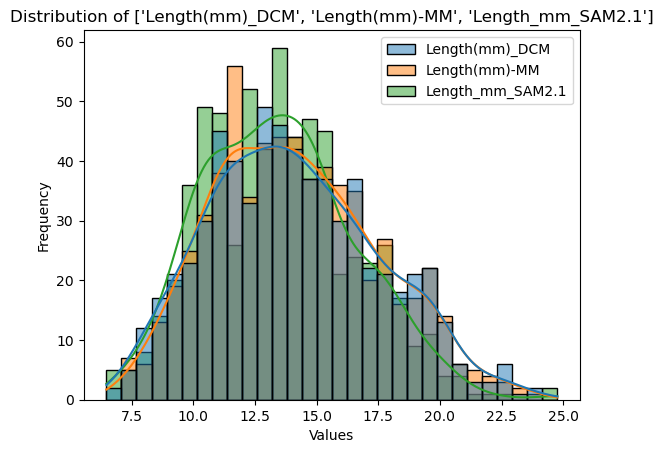


Shapiro-Wilk Test for 'Length(mm)_DCM': ShapiroResult(statistic=np.float64(0.986278502335402), pvalue=np.float64(9.60401666995824e-06))

Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=np.float64(0.9848044461987623), pvalue=np.float64(3.0636054287055234e-06))

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=np.float64(0.9886625999622733), pvalue=np.float64(6.949824314178187e-05))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(4.988948823045044), pvalue=np.float64(0.006900990765015583))
Pearson correlation between 'Length(mm)_DCM' and 'Length(mm)-MM': PearsonRResult(statistic=np.float64(0.9933449772143149), pvalue=np.float64(0.0))


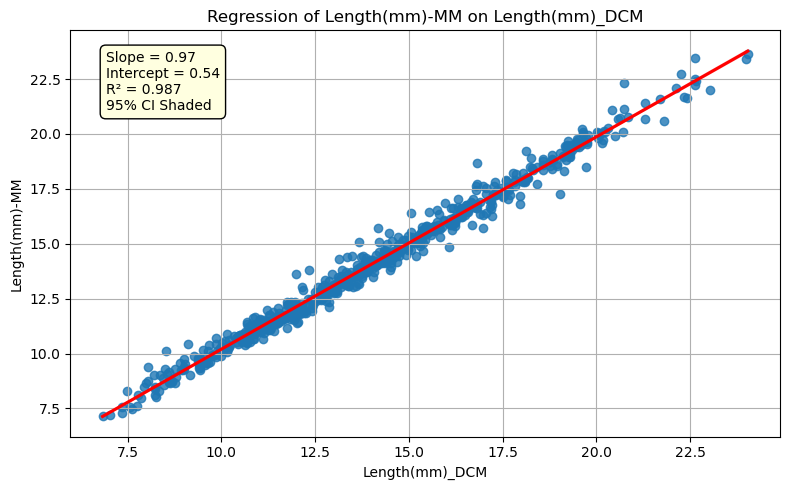

Pearson correlation between 'Length(mm)_DCM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9650269943690203), pvalue=np.float64(0.0))


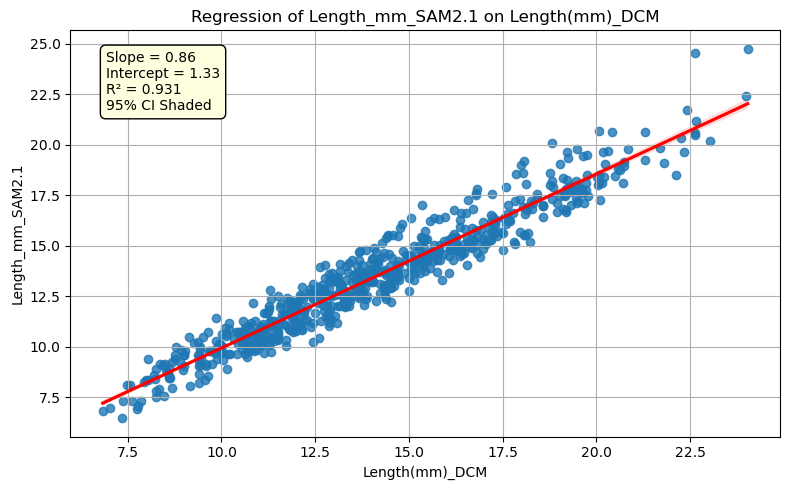

Pearson correlation between 'Length(mm)-MM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9672493638846534), pvalue=np.float64(0.0))


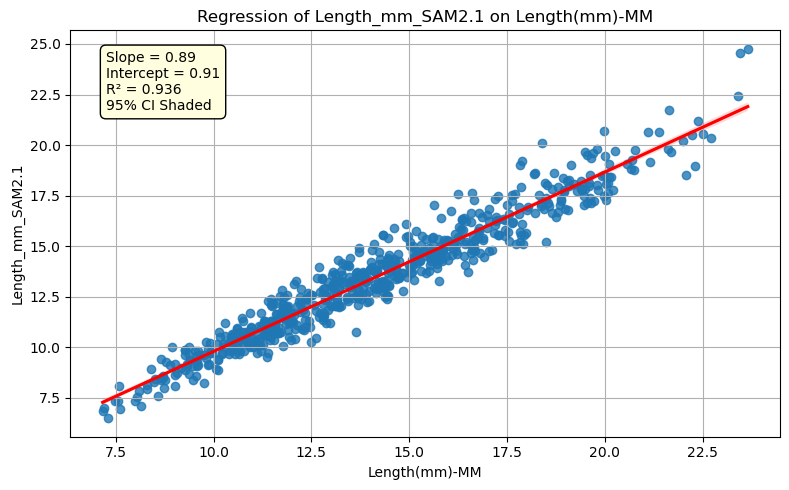


ANOVA result across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: F_onewayResult(statistic=np.float64(8.483308607087471), pvalue=np.float64(0.00021471086478270514))
Kruskal-Wallis Test across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: KruskalResult(statistic=np.float64(14.074384282019716), pvalue=np.float64(0.0008785900590598697))


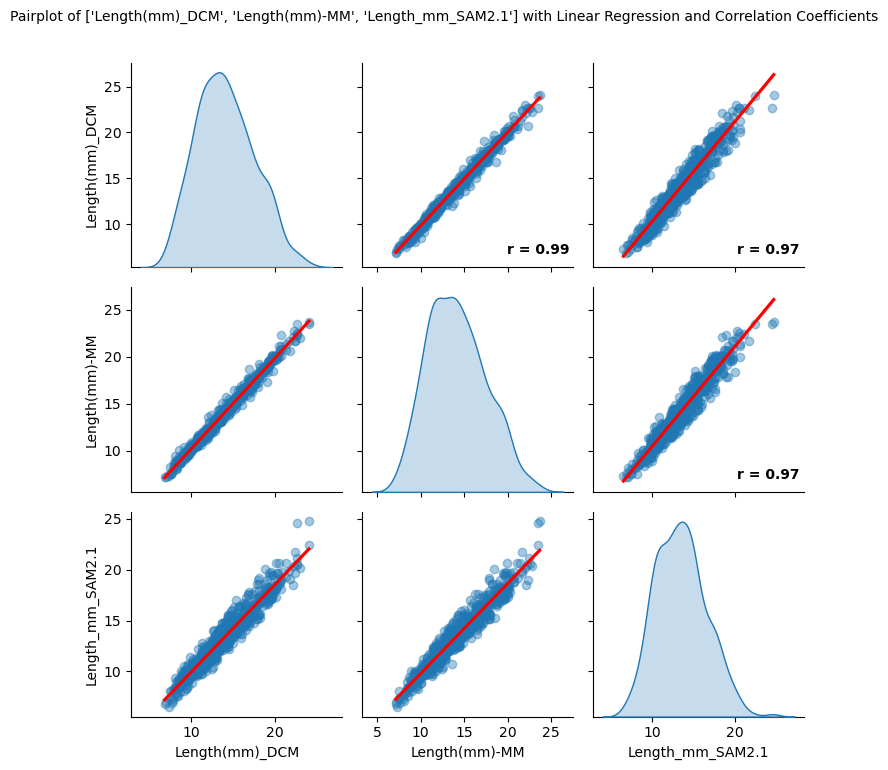

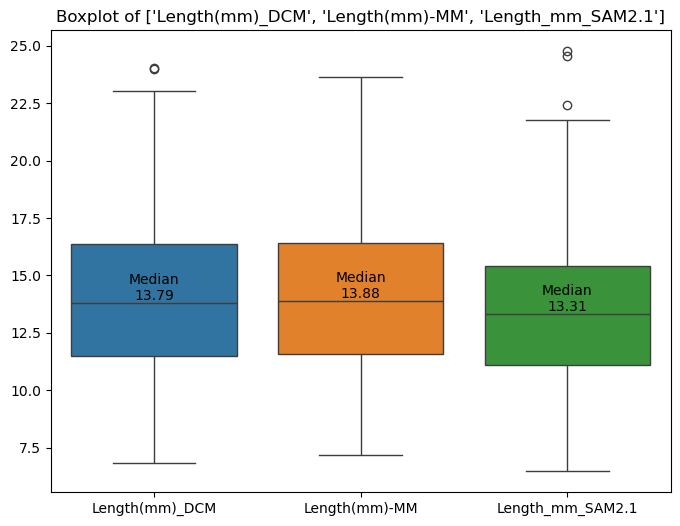

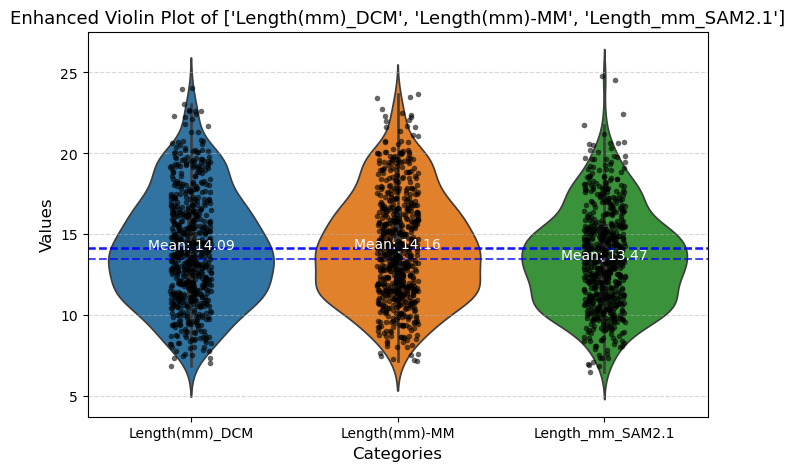

In [91]:
# Perform analysis on both sets of columns
analyze_columns(df_100, ["Length(mm)_DCM", "Length(mm)-MM", "Length_mm_SAM2.1"])


#### Effect size for length

In [92]:
# Effect size for length
effect_size(df_100, ["Length(mm)_DCM", "Length(mm)-MM"]) # ground truth data
effect_size(df_100, ["Length(mm)_DCM", "Length_mm_SAM2.1"]) # Gold standard
effect_size(df_100, ["Length(mm)-MM", "Length_mm_SAM2.1"]) # Silver standard

The Cohen's d for Length(mm)_DCM and Length(mm)-MM: -0.019 
Effect Size Interpretation for Length(mm)_DCM and Length(mm)-MM: Small (negligible)
The Cohen's d for Length(mm)_DCM and Length_mm_SAM2.1: 0.190 
Effect Size Interpretation for Length(mm)_DCM and Length_mm_SAM2.1: Small (negligible)
The Cohen's d for Length(mm)-MM and Length_mm_SAM2.1: 0.213 
Effect Size Interpretation for Length(mm)-MM and Length_mm_SAM2.1: Small to Medium


#### Error difference

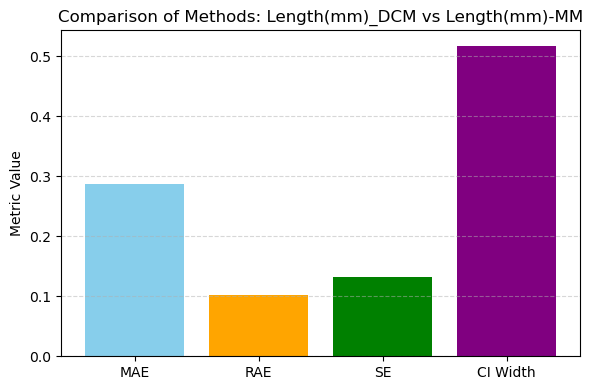

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0   Length(mm)_DCM   Length(mm)-MM  0.286355  0.102125  0.131713  13.896616   

    CI Upper  CI Width  
0  14.413897  0.517281

In [93]:
# Error difference
compare_two_methods_with_plot(df_100, ["Length(mm)_DCM", "Length(mm)-MM"])

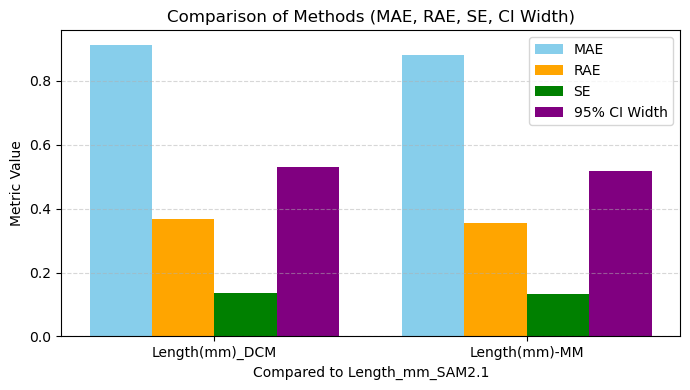

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0  Length_mm_SAM2.1  Length(mm)_DCM  0.912784  0.368832  0.135367  13.825396   
1  Length_mm_SAM2.1   Length(mm)-MM  0.882056  0.356416  0.131713  13.896616   

    CI Upper  CI Width  
0  14.357026  0.531631  
1  14.413897  0.517281

In [94]:
# Error difference
compare_three_methods_with_plot(df_100, ["Length_mm_SAM2.1", "Length(mm)_DCM", "Length(mm)-MM"])

#### Levels  of agreement between SAM2.1 generated data with gold and silver standards

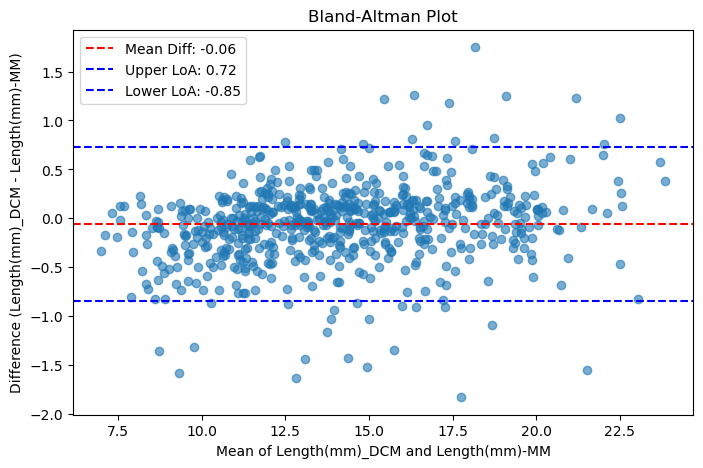

In [95]:
bland_altman_plot(df_100["Length(mm)_DCM"], df_100["Length(mm)-MM"], label_a="Length(mm)_DCM", label_b="Length(mm)-MM")

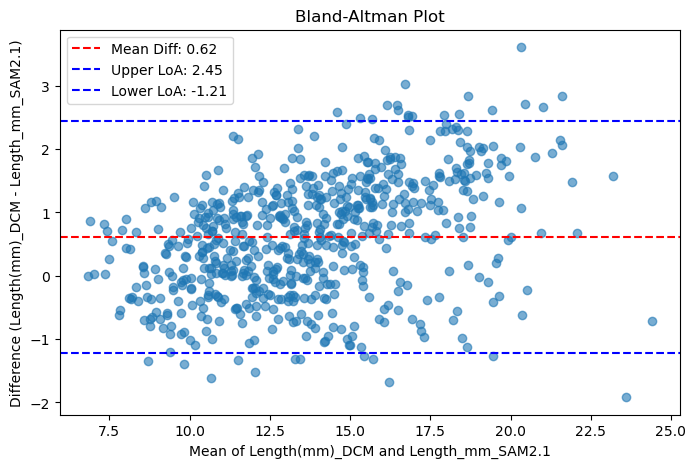

In [96]:
bland_altman_plot(df_100["Length(mm)_DCM"], df_100["Length_mm_SAM2.1"], label_a="Length(mm)_DCM", label_b="Length_mm_SAM2.1")

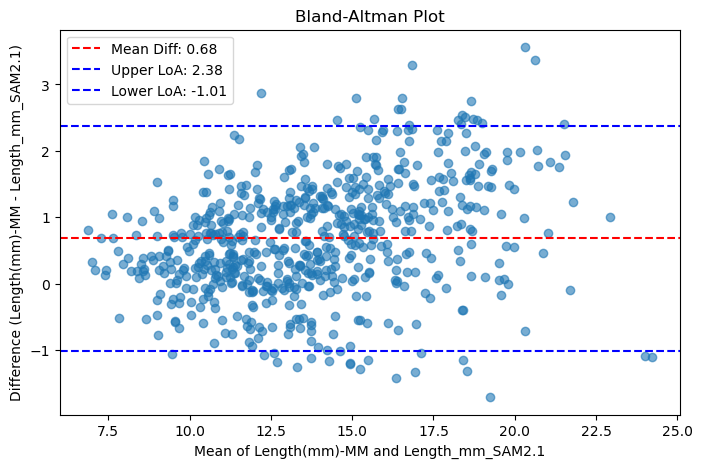

In [97]:
bland_altman_plot(df_100["Length(mm)-MM"], df_100["Length_mm_SAM2.1"], label_a="Length(mm)-MM", label_b="Length_mm_SAM2.1")

### Width (mm) of beans 

#### Descriptive statistics for Width


Analyzing columns: ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width(mm)_DCM  Width(mm)-MM  Width_mm_SAM2.1
count     644.000000    644.000000       644.000000
mean       10.486724     10.599032        11.177891
std         2.399810      2.390924         2.683373
min         5.530000      5.398641         5.524894
25%         8.797500      8.969167         9.276661
50%        10.155000     10.303860        10.747712
75%        11.992500     12.045374        12.881445
max        18.770000     19.272344        20.879527

Skewness:
 Width(mm)_DCM      0.489422
Width(mm)-MM       0.488363
Width_mm_SAM2.1    0.532408
dtype: float64

Kurtosis:
 Width(mm)_DCM     -0.018240
Width(mm)-MM      -0.034648
Width_mm_SAM2.1   -0.010430
dtype: float64


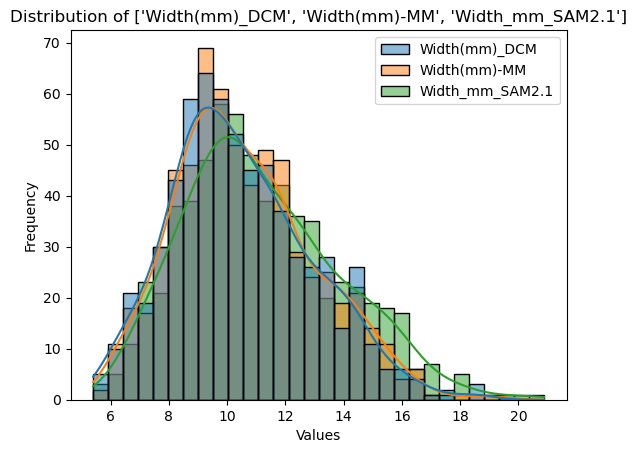


Shapiro-Wilk Test for 'Width(mm)_DCM': ShapiroResult(statistic=np.float64(0.9813260631155367), pvalue=np.float64(2.543187927899401e-07))

Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=np.float64(0.9811898805691192), pvalue=np.float64(2.3192927528747674e-07))

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=np.float64(0.9783941414390118), pvalue=np.float64(3.775532954618424e-08))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(4.756763294930168), pvalue=np.float64(0.008694436744090105))
Pearson correlation between 'Width(mm)_DCM' and 'Width(mm)-MM': PearsonRResult(statistic=np.float64(0.9673100615841004), pvalue=np.float64(0.0))


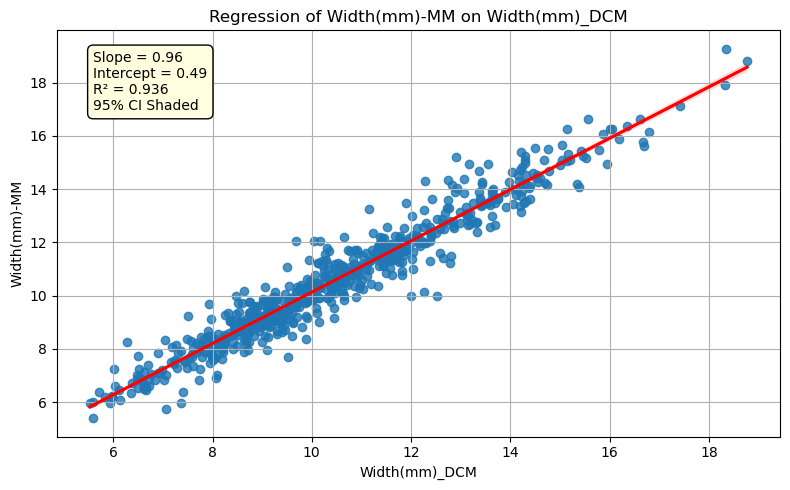

Pearson correlation between 'Width(mm)_DCM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9519345586992556), pvalue=np.float64(0.0))


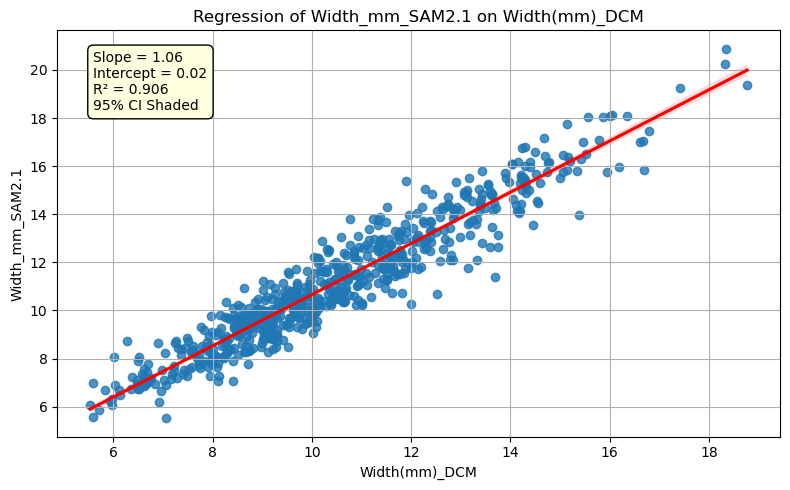

Pearson correlation between 'Width(mm)-MM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9666487730843194), pvalue=np.float64(0.0))


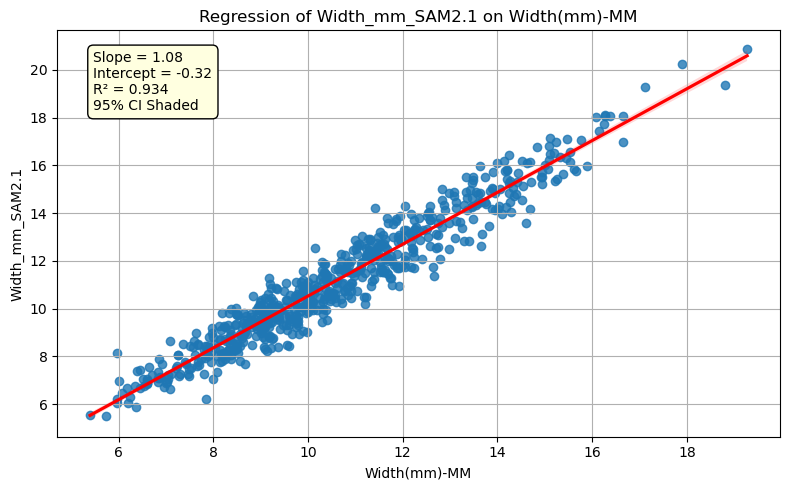


ANOVA result across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: F_onewayResult(statistic=np.float64(14.230993793529487), pvalue=np.float64(7.323351602612101e-07))
Kruskal-Wallis Test across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: KruskalResult(statistic=np.float64(22.889045868791253), pvalue=np.float64(1.070796249969174e-05))


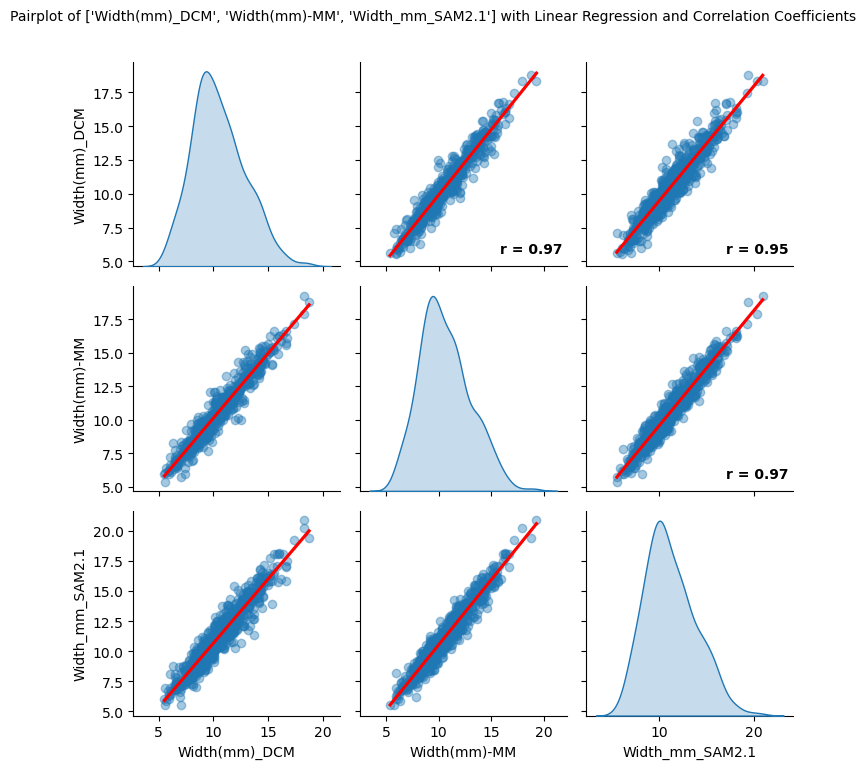

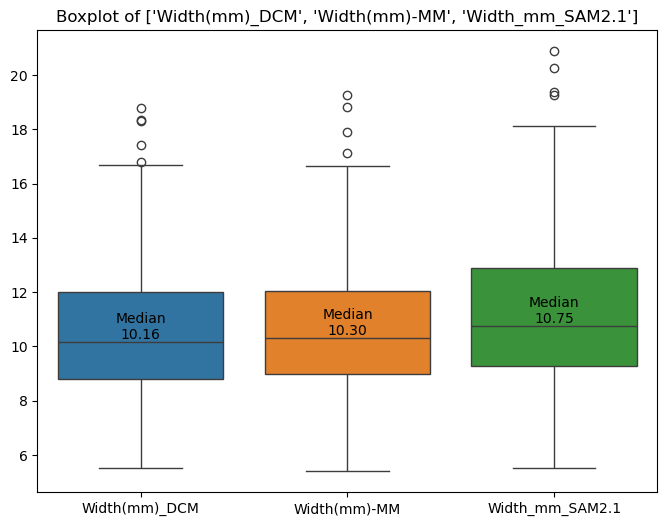

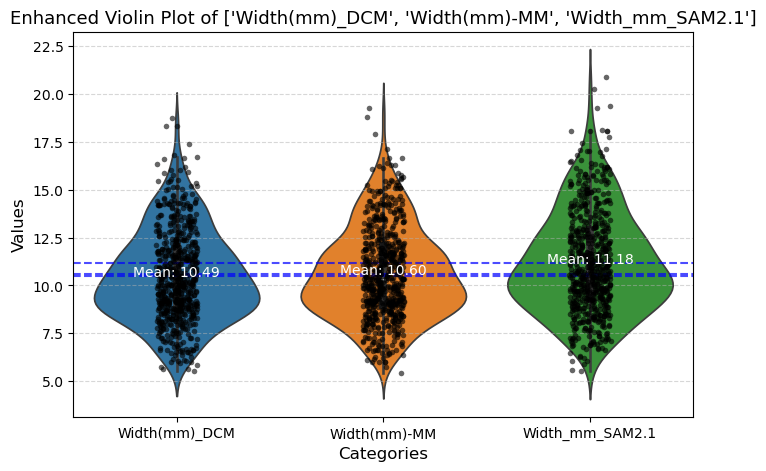

In [98]:
analyze_columns(df_100, ["Width(mm)_DCM","Width(mm)-MM","Width_mm_SAM2.1"])

#### Effect size for width

In [99]:
# Cohen-s d test for Width
effect_size(df_100, ["Width(mm)_DCM", "Width(mm)-MM"])
effect_size(df_100, ["Width(mm)_DCM", "Width_mm_SAM2.1"])
effect_size(df_100, ["Width(mm)-MM", "Width_mm_SAM2.1"])

The Cohen's d for Width(mm)_DCM and Width(mm)-MM: -0.047 
Effect Size Interpretation for Width(mm)_DCM and Width(mm)-MM: Small (negligible)
The Cohen's d for Width(mm)_DCM and Width_mm_SAM2.1: -0.272 
Effect Size Interpretation for Width(mm)_DCM and Width_mm_SAM2.1: Small to Medium
The Cohen's d for Width(mm)-MM and Width_mm_SAM2.1: -0.228 
Effect Size Interpretation for Width(mm)-MM and Width_mm_SAM2.1: Small to Medium


#### Error statistics for width

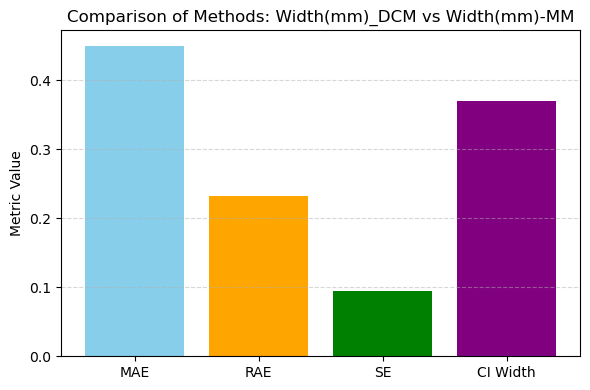

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0    Width(mm)_DCM    Width(mm)-MM  0.449553  0.232747  0.094216  10.414025   

   CI Upper  CI Width  
0  10.78404  0.370015

In [100]:
# Error difference
compare_two_methods_with_plot(df_100, ["Width(mm)_DCM", "Width(mm)-MM"])

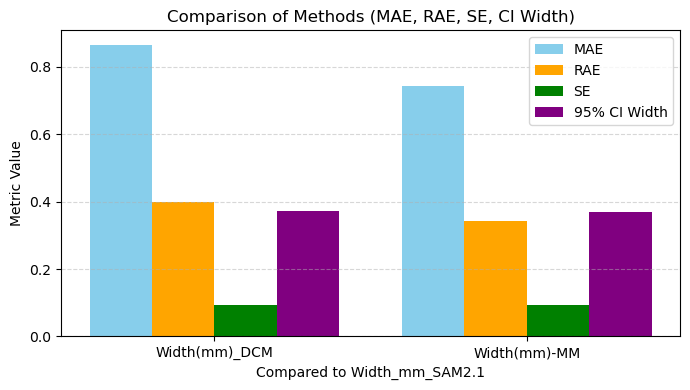

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0  Width_mm_SAM2.1   Width(mm)_DCM  0.865201  0.398988  0.094566  10.301029   
1  Width_mm_SAM2.1    Width(mm)-MM  0.742324  0.342323  0.094216  10.414025   

    CI Upper  CI Width  
0  10.672419  0.371390  
1  10.784040  0.370015

In [101]:
# Error difference
compare_three_methods_with_plot(df_100, ["Width_mm_SAM2.1", "Width(mm)_DCM", "Width(mm)-MM"])

#### Levels of agreement for width

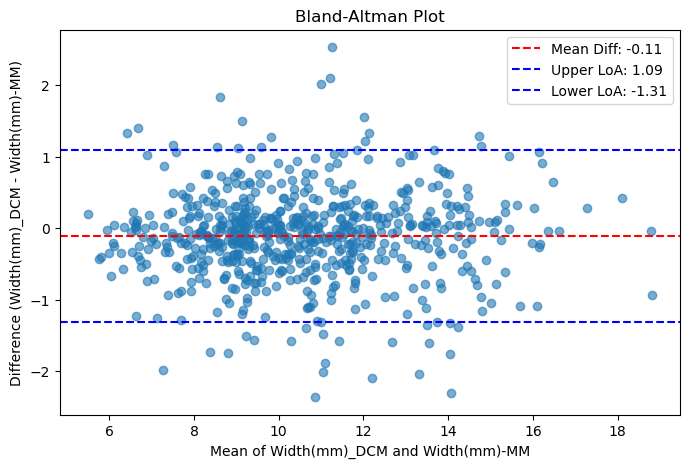

In [102]:
bland_altman_plot(df_100["Width(mm)_DCM"], df_100["Width(mm)-MM"], label_a="Width(mm)_DCM", label_b="Width(mm)-MM")

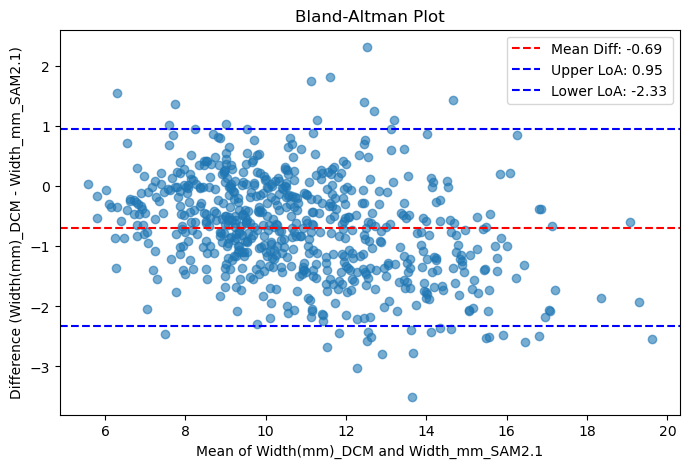

In [103]:
bland_altman_plot(df_100["Width(mm)_DCM"], df_100["Width_mm_SAM2.1"], label_a="Width(mm)_DCM", label_b="Width_mm_SAM2.1")

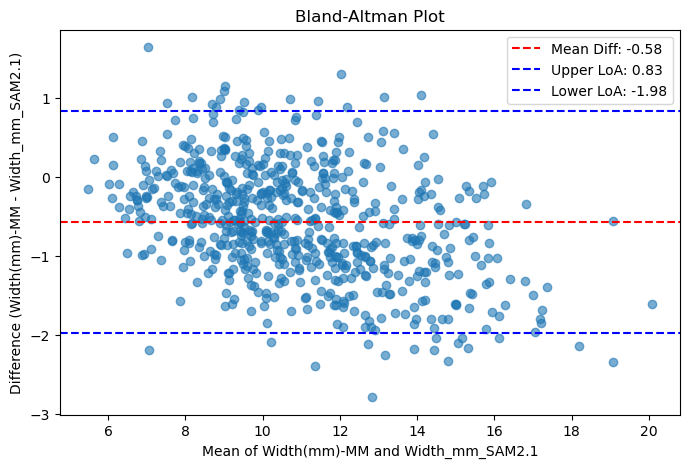

In [104]:
bland_altman_plot(df_100["Width(mm)-MM"], df_100["Width_mm_SAM2.1"], label_a="Width(mm)-MM", label_b="Width_mm_SAM2.1")

### Area (mm2) for beans

#### Descriptive statistics


Analyzing columns: ['Area(mm²)-MM', 'Area_mm2_SAM2.1']

Descriptive Statistics:
        Area(mm²)-MM  Area_mm2_SAM2.1
count    644.000000       644.000000
mean     121.485103       124.631419
std       55.671858        57.304416
min       29.823068        32.076276
25%       80.015049        80.866019
50%      111.087892       113.795620
75%      150.358860       153.825702
max      351.741399       404.743734

Skewness:
 Area(mm²)-MM       0.900789
Area_mm2_SAM2.1    1.005823
dtype: float64

Kurtosis:
 Area(mm²)-MM       0.647965
Area_mm2_SAM2.1    1.306854
dtype: float64


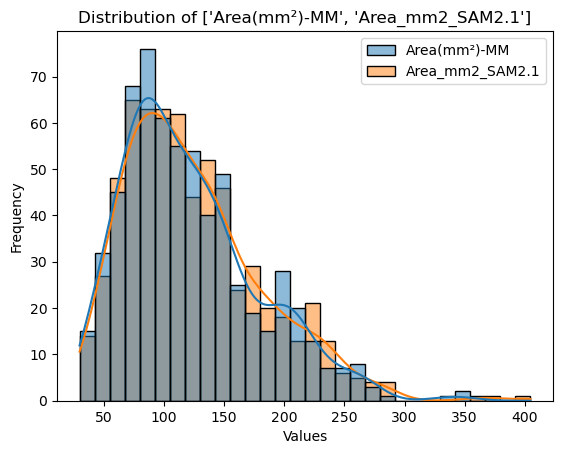


Shapiro-Wilk Test for 'Area(mm²)-MM': ShapiroResult(statistic=np.float64(0.942907127767832), pvalue=np.float64(4.982847921940866e-15))

Shapiro-Wilk Test for 'Area_mm2_SAM2.1': ShapiroResult(statistic=np.float64(0.938591306276165), pvalue=np.float64(1.2181238940937444e-15))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(0.16081353547386162), pvalue=np.float64(0.6884752348985281))
Pearson correlation between 'Area(mm²)-MM' and 'Area_mm2_SAM2.1': PearsonRResult(statistic=np.float64(0.9871840918324905), pvalue=np.float64(0.0))


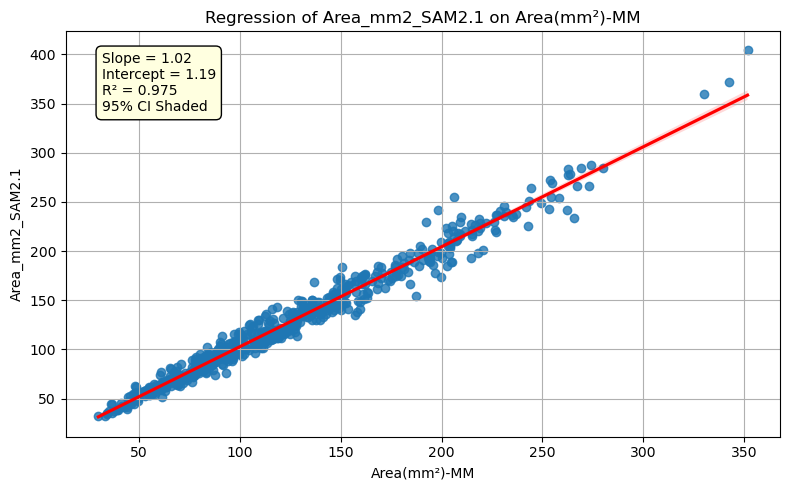


ANOVA result across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: F_onewayResult(statistic=np.float64(0.9987467118539493), pvalue=np.float64(0.31780196017147455))
Kruskal-Wallis Test across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: KruskalResult(statistic=np.float64(0.8934652197423082), pvalue=np.float64(0.3445399906177796))


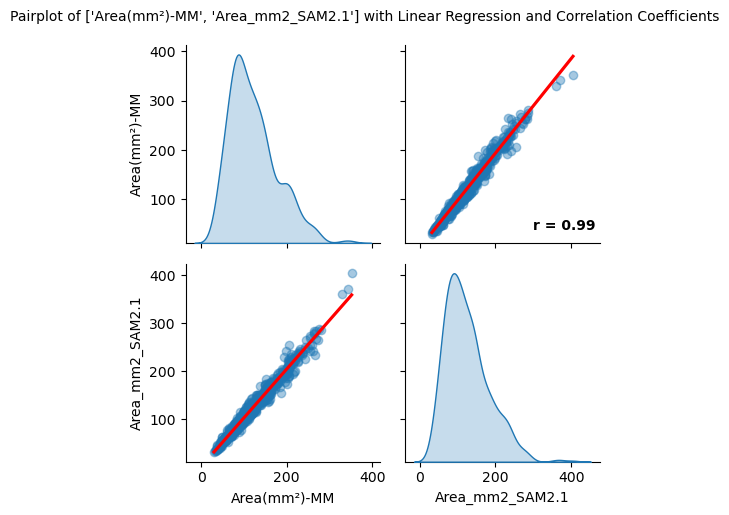

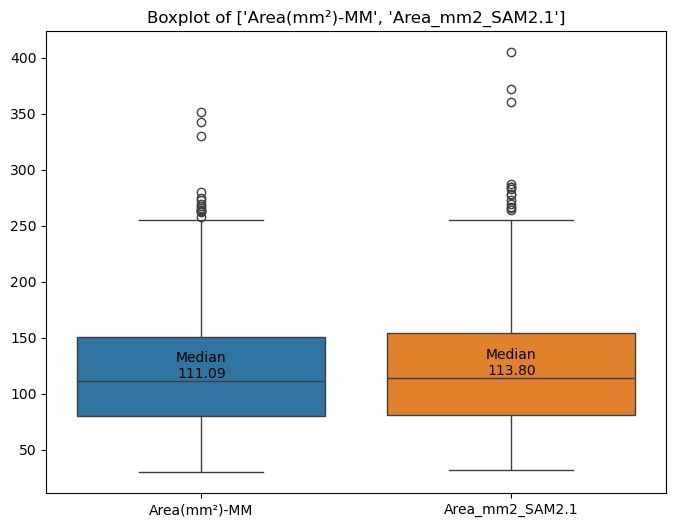

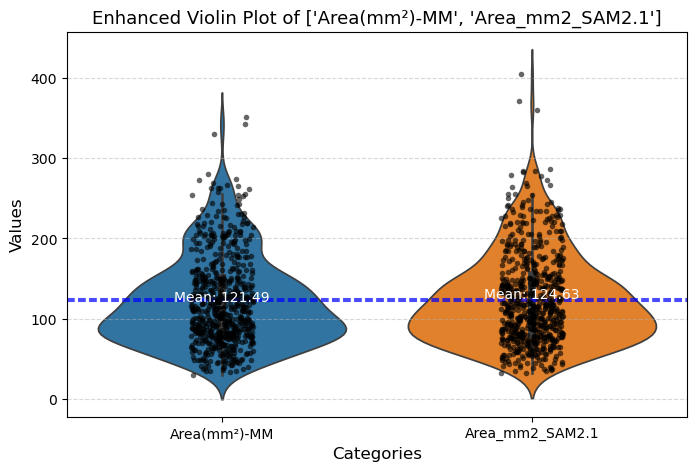

In [105]:
analyze_columns(df_100, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

#### effect size 

In [106]:
# Cohen-s d test for Area in mm2
effect_size(df_100, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])


The Cohen's d for Area(mm²)-MM and Area_mm2_SAM2.1: -0.056 
Effect Size Interpretation for Area(mm²)-MM and Area_mm2_SAM2.1: Small (negligible)


The results of Cohen's d test prove that there are negligible differences between the measurements of area from both the methods.


#### Error analysis

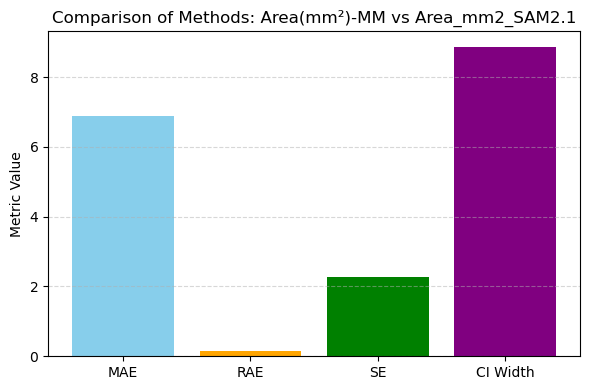

Reference Method  Compared Method       MAE       RAE       SE    CI Lower  \
0     Area(mm²)-MM  Area_mm2_SAM2.1  6.873443  0.154835  2.25811  120.197257   

    CI Upper  CI Width  
0  129.06558  8.868323

In [107]:
compare_two_methods_with_plot(df_100, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

#### Levels of agreement

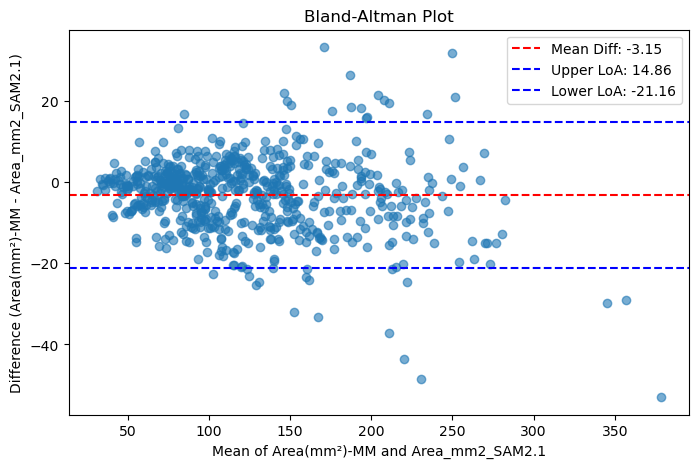

In [108]:
bland_altman_plot(df_100["Area(mm²)-MM"], df_100["Area_mm2_SAM2.1"], label_a="Area(mm²)-MM", label_b="Area_mm2_SAM2.1")


MAE, SE also prove that there are negligible errors between the values generated from all the methods. Most of the values lie within the limits, suggesting that the values are close to each other.

### Aspect ratio for beans

#### Descriptive statistics


Analyzing columns: ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']

Descriptive Statistics:
        Aspect Ratio-DCM  L/W Ratio-MM  Aspect_Ratio_SAM2.1
count        644.000000    644.000000           644.000000
mean           1.343167      1.336481             1.366891
std            0.119335      0.116621             0.120802
min            0.901757      1.043063             1.048560
25%            1.263521      1.258874             1.281165
50%            1.339593      1.333182             1.360956
75%            1.413159      1.404230             1.438306
max            1.919737      1.988823             1.912108

Skewness:
 Aspect Ratio-DCM       0.474377
L/W Ratio-MM           0.759126
Aspect_Ratio_SAM2.1    0.630809
dtype: float64

Kurtosis:
 Aspect Ratio-DCM       1.341864
L/W Ratio-MM           2.404162
Aspect_Ratio_SAM2.1    1.245219
dtype: float64


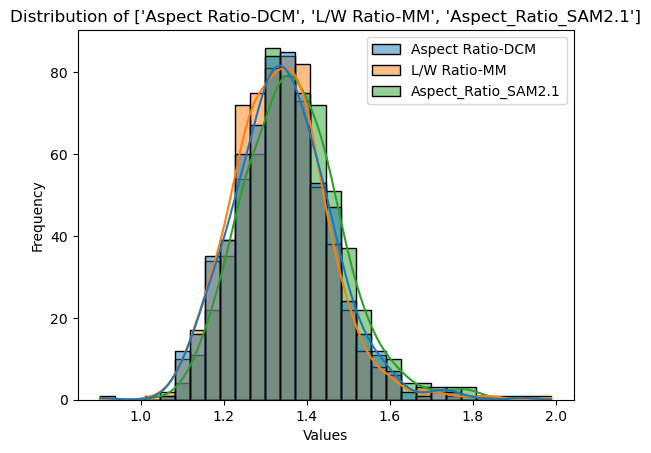


Shapiro-Wilk Test for 'Aspect Ratio-DCM': ShapiroResult(statistic=np.float64(0.9837728629026714), pvalue=np.float64(1.4230910525746726e-06))

Shapiro-Wilk Test for 'L/W Ratio-MM': ShapiroResult(statistic=np.float64(0.9692394203855711), pvalue=np.float64(2.2401109774950103e-10))

Shapiro-Wilk Test for 'Aspect_Ratio_SAM2.1': ShapiroResult(statistic=np.float64(0.9779042693857084), pvalue=np.float64(2.7856669173235628e-08))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(0.4506942067447708), pvalue=np.float64(0.6372527382704578))
Pearson correlation between 'Aspect Ratio-DCM' and 'L/W Ratio-MM': PearsonRResult(statistic=np.float64(0.6730732169927862), pvalue=np.float64(3.597820280920781e-86))


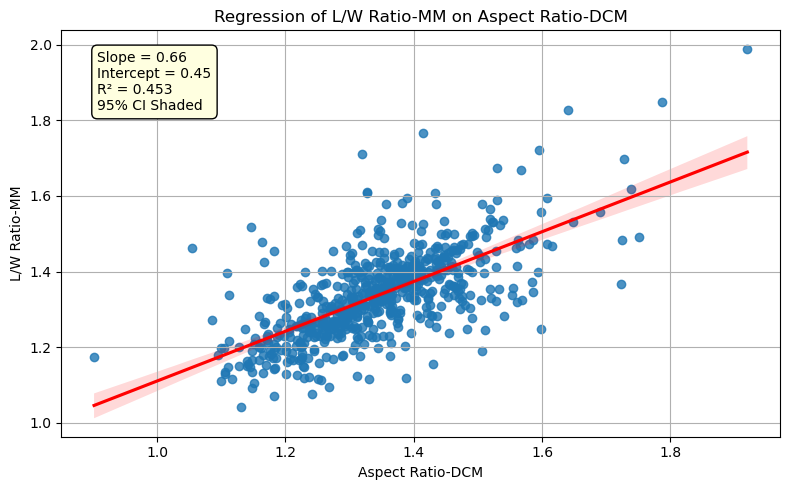

Pearson correlation between 'Aspect Ratio-DCM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=np.float64(0.6415133682962106), pvalue=np.float64(5.876524852153208e-76))


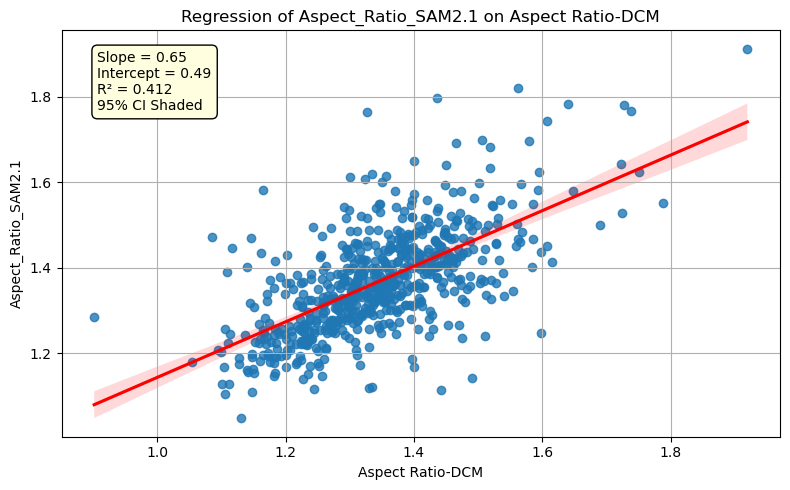

Pearson correlation between 'L/W Ratio-MM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=np.float64(0.7003817714579297), pvalue=np.float64(4.322956612980899e-96))


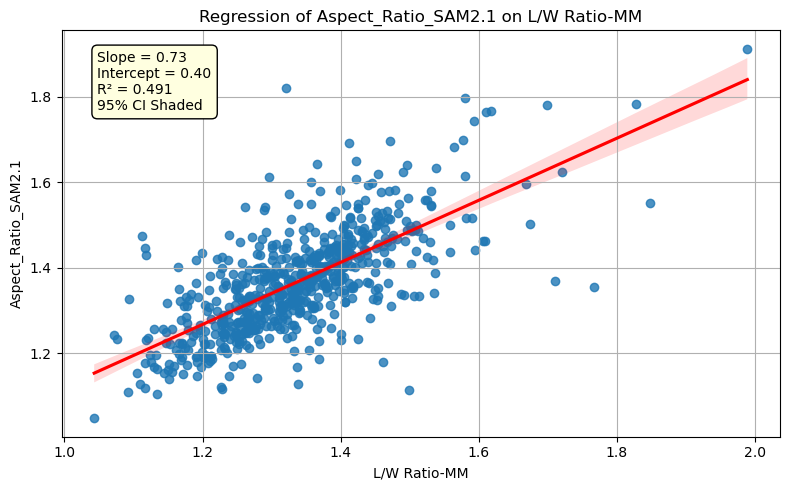


ANOVA result across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: F_onewayResult(statistic=np.float64(11.627394637152037), pvalue=np.float64(9.560537050456896e-06))
Kruskal-Wallis Test across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: KruskalResult(statistic=np.float64(22.757966417813954), pvalue=np.float64(1.1433267975481964e-05))


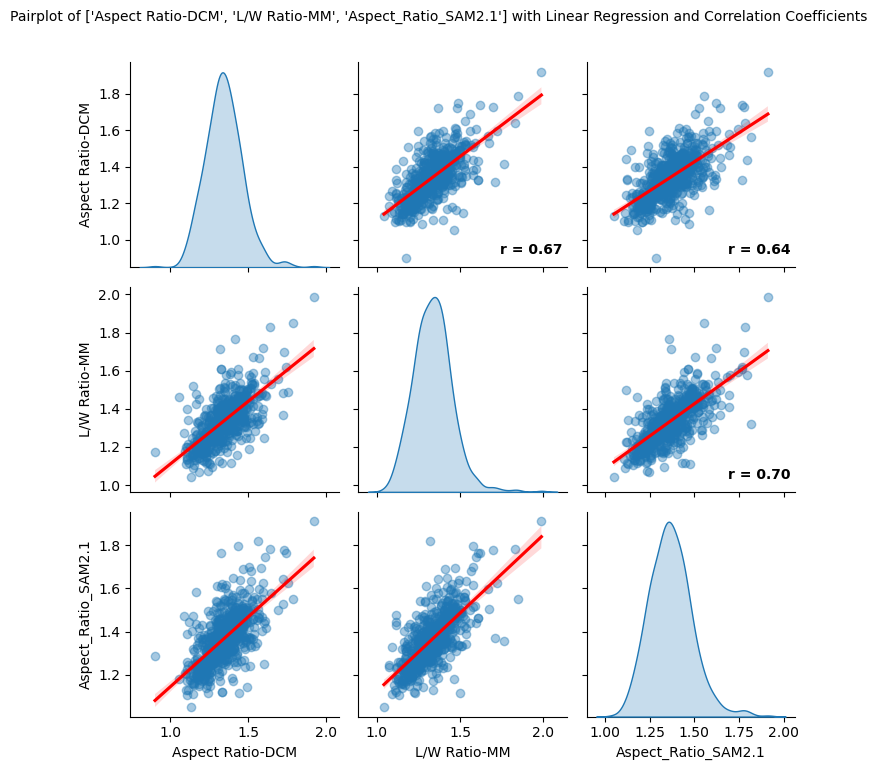

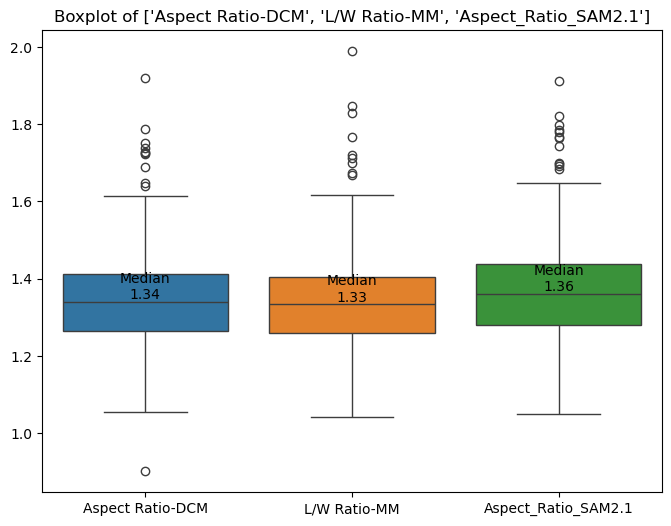

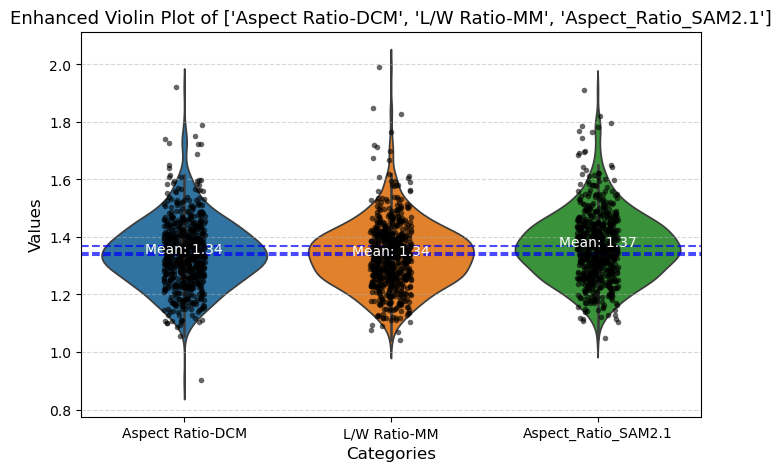

In [109]:
# analyze_columns(df_100, ['Aspect Ratio-DCM','L/W Ratio-MM'])
analyze_columns(df_100, ["Aspect Ratio-DCM","L/W Ratio-MM","Aspect_Ratio_SAM2.1"])

#### Effect size

In [110]:
# Cohen-s d test for aspect ratio
effect_size(df_100, ["Aspect Ratio-DCM",  "L/W Ratio-MM"])
effect_size(df_100, ["L/W Ratio-MM",  "Aspect_Ratio_SAM2.1"])
effect_size(df_100, ["Aspect Ratio-DCM",  "Aspect_Ratio_SAM2.1"])

The Cohen's d for Aspect Ratio-DCM and L/W Ratio-MM: 0.057 
Effect Size Interpretation for Aspect Ratio-DCM and L/W Ratio-MM: Small (negligible)
The Cohen's d for L/W Ratio-MM and Aspect_Ratio_SAM2.1: -0.256 
Effect Size Interpretation for L/W Ratio-MM and Aspect_Ratio_SAM2.1: Small to Medium
The Cohen's d for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: -0.198 
Effect Size Interpretation for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: Small (negligible)


#### Error analysis

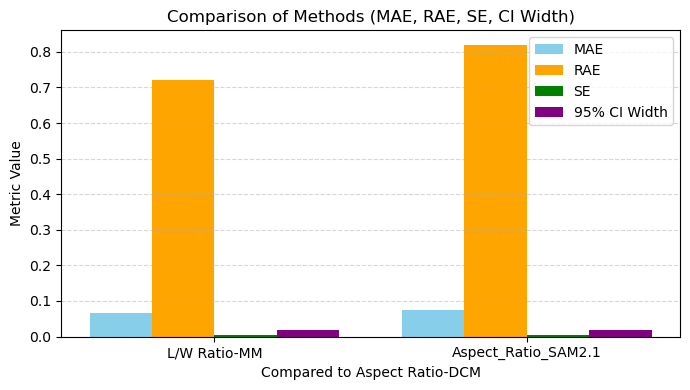

Reference Method      Compared Method       MAE       RAE        SE  \
0  Aspect Ratio-DCM         L/W Ratio-MM  0.066416  0.721686  0.004595   
1  Aspect Ratio-DCM  Aspect_Ratio_SAM2.1  0.075428  0.819607  0.004760   

   CI Lower  CI Upper  CI Width  
0  1.327457  1.345505  0.018048  
1  1.357544  1.376239  0.018695

In [111]:
compare_three_methods_with_plot(df_100, ["Aspect Ratio-DCM","L/W Ratio-MM", "Aspect_Ratio_SAM2.1"])

#### Levels of agreement

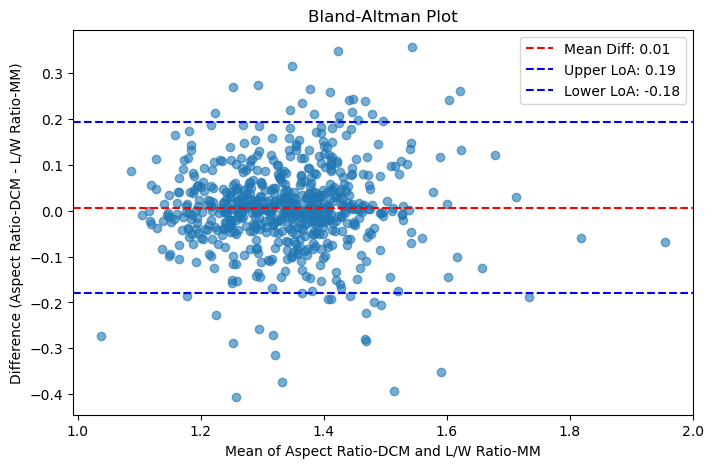

In [112]:
bland_altman_plot(df_100["Aspect Ratio-DCM"], df_100["L/W Ratio-MM"], label_a="Aspect Ratio-DCM", label_b="L/W Ratio-MM")

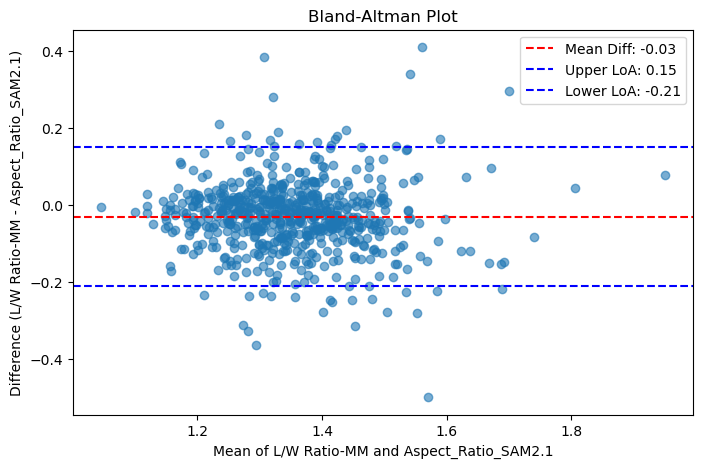

In [113]:
bland_altman_plot(df_100["L/W Ratio-MM"], df_100["Aspect_Ratio_SAM2.1"], label_a="L/W Ratio-MM", label_b="Aspect_Ratio_SAM2.1")

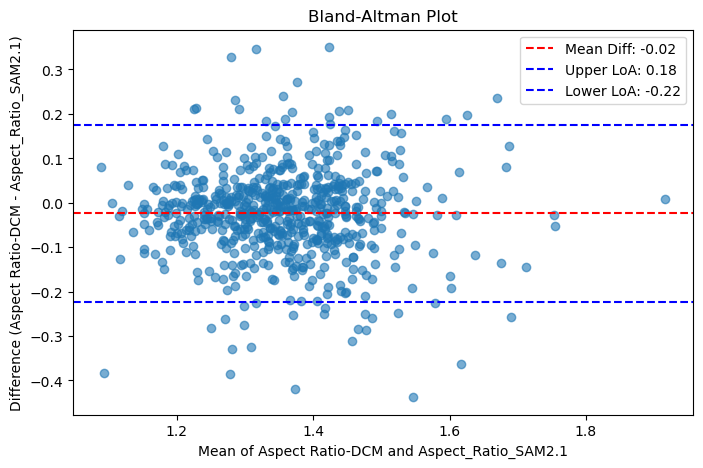

In [114]:
bland_altman_plot(df_100["Aspect Ratio-DCM"], df_100["Aspect_Ratio_SAM2.1"], label_a="Aspect Ratio-DCM", label_b="Aspect_Ratio_SAM2.1")

### Circularity for Machine-measured and SAM-measured data

#### Descriptive statistics


Analyzing columns: ['Circularity-MM', 'Circularity_SAM2.1']

Descriptive Statistics:
        Circularity-MM  Circularity_SAM2.1
count      644.000000          644.000000
mean         1.174541            1.168712
std          0.032179            0.027522
min          1.126595            1.118356
25%          1.155905            1.150556
50%          1.169415            1.165051
75%          1.185770            1.181388
max          1.461095            1.329119

Skewness:
 Circularity-MM        3.169983
Circularity_SAM2.1    1.608415
dtype: float64

Kurtosis:
 Circularity-MM        18.574244
Circularity_SAM2.1     4.910445
dtype: float64


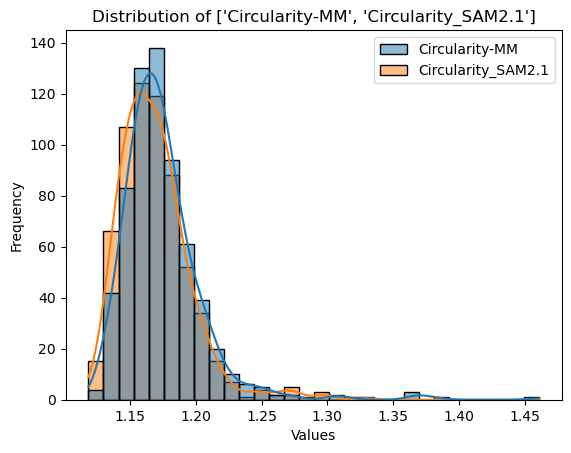


Shapiro-Wilk Test for 'Circularity-MM': ShapiroResult(statistic=np.float64(0.7757796200455145), pvalue=np.float64(9.266880604748319e-29))

Shapiro-Wilk Test for 'Circularity_SAM2.1': ShapiroResult(statistic=np.float64(0.8983614684192197), pvalue=np.float64(3.0737334782777206e-20))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(0.13922050168625358), pvalue=np.float64(0.7091186641456654))
Pearson correlation between 'Circularity-MM' and 'Circularity_SAM2.1': PearsonRResult(statistic=np.float64(0.633812383633023), pvalue=np.float64(1.2073070074755464e-73))


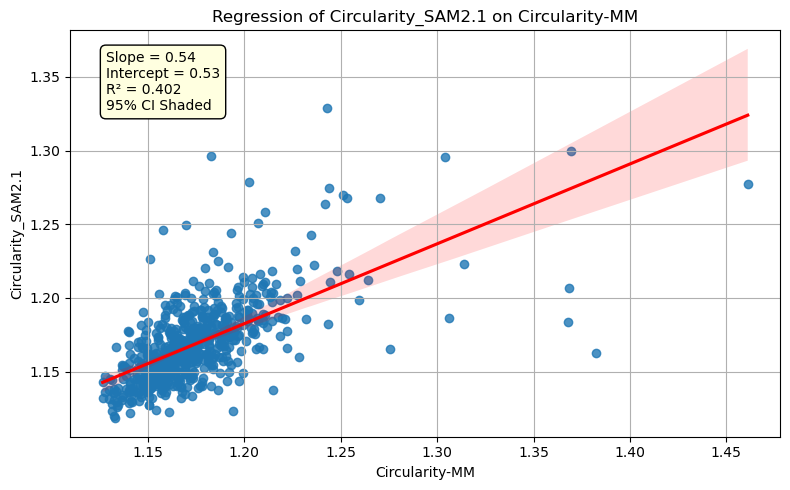


ANOVA result across ['Circularity-MM', 'Circularity_SAM2.1']: F_onewayResult(statistic=np.float64(12.204250050372265), pvalue=np.float64(0.0004929924643255485))
Kruskal-Wallis Test across ['Circularity-MM', 'Circularity_SAM2.1']: KruskalResult(statistic=np.float64(14.102366977432212), pvalue=np.float64(0.00017312578876578077))


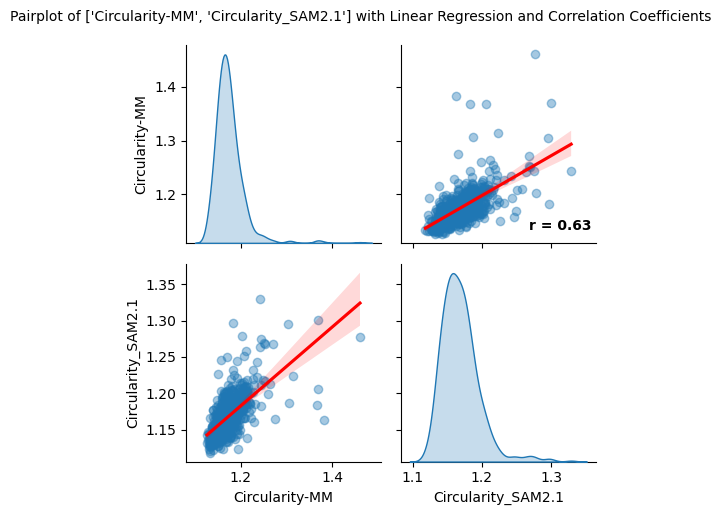

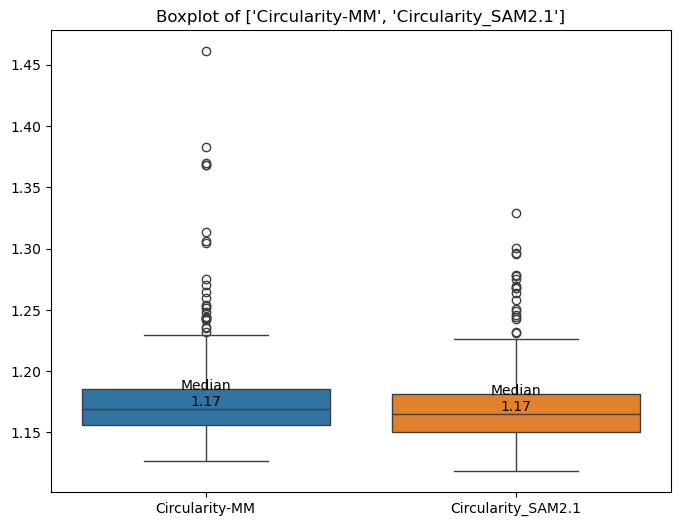

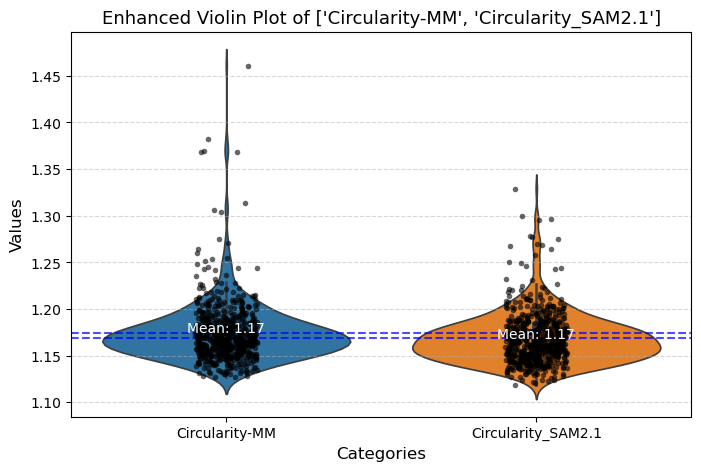

In [115]:
analyze_columns(df_100, ["Circularity-MM","Circularity_SAM2.1"])

#### Effect size

In [116]:
# Cohen-s d test for Area in pixels
effect_size(df_100, ["Circularity-MM", "Circularity_SAM2.1"])


The Cohen's d for Circularity-MM and Circularity_SAM2.1: 0.195 
Effect Size Interpretation for Circularity-MM and Circularity_SAM2.1: Small (negligible)


#### Error analysis

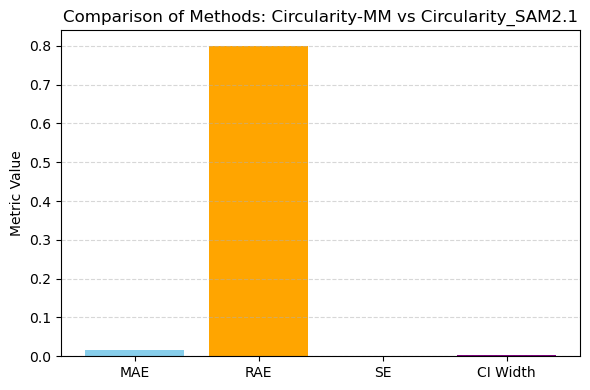

Reference Method     Compared Method       MAE       RAE        SE  \
0   Circularity-MM  Circularity_SAM2.1  0.016686  0.799911  0.001085   

   CI Lower  CI Upper  CI Width  
0  1.166583  1.170842  0.004259

In [117]:
compare_two_methods_with_plot(df_100, ['Circularity-MM', 'Circularity_SAM2.1'])

#### Descriptive statistics

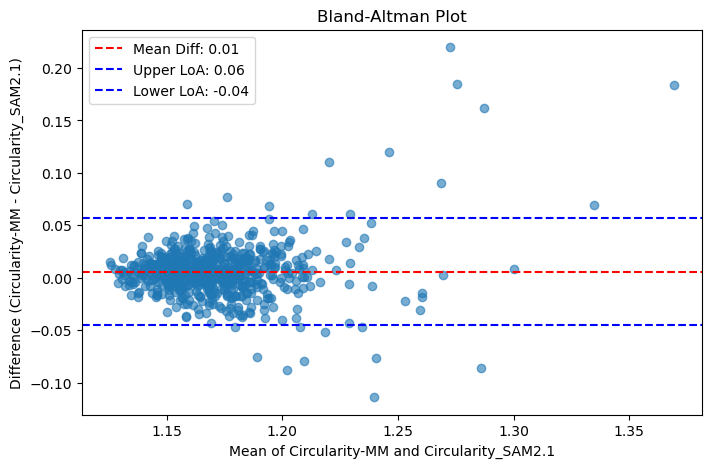

In [118]:
bland_altman_plot(df_100["Circularity-MM"], df_100["Circularity_SAM2.1"], label_a="Circularity-MM", label_b="Circularity_SAM2.1")

### Area (pixels) for beans

#### Descriptive statistics


Analyzing columns: ['Area(pix)-MM', 'Area_pix_SAM2.1']

Descriptive Statistics:
        Area(pix)-MM  Area_pix_SAM2.1
count    644.000000       644.000000
mean   17208.939441     79239.167702
std     7837.302956     36431.254154
min     4284.000000     20536.000000
25%    11374.500000     51984.000000
50%    15750.000000     72430.000000
75%    21280.500000     99255.250000
max    49571.000000    233409.000000

Skewness:
 Area(pix)-MM       0.897411
Area_pix_SAM2.1    0.888578
dtype: float64

Kurtosis:
 Area(pix)-MM       0.638709
Area_pix_SAM2.1    0.509606
dtype: float64


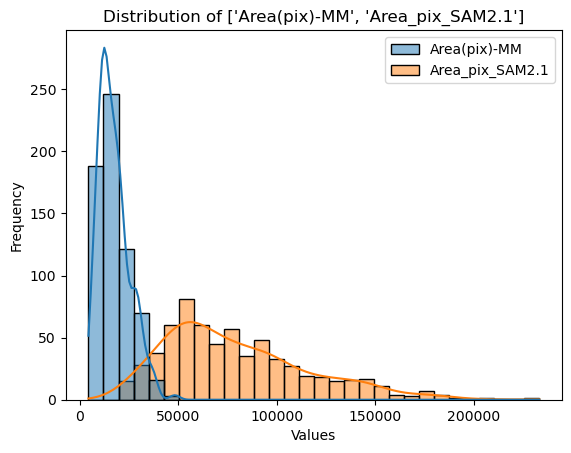


Shapiro-Wilk Test for 'Area(pix)-MM': ShapiroResult(statistic=np.float64(0.9432632513897775), pvalue=np.float64(5.615426736422593e-15))

Shapiro-Wilk Test for 'Area_pix_SAM2.1': ShapiroResult(statistic=np.float64(0.94232673812722), pvalue=np.float64(4.105501826804495e-15))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(562.9243292779064), pvalue=np.float64(1.650594417726332e-103))
Pearson correlation between 'Area(pix)-MM' and 'Area_pix_SAM2.1': PearsonRResult(statistic=np.float64(0.9919012270167454), pvalue=np.float64(0.0))


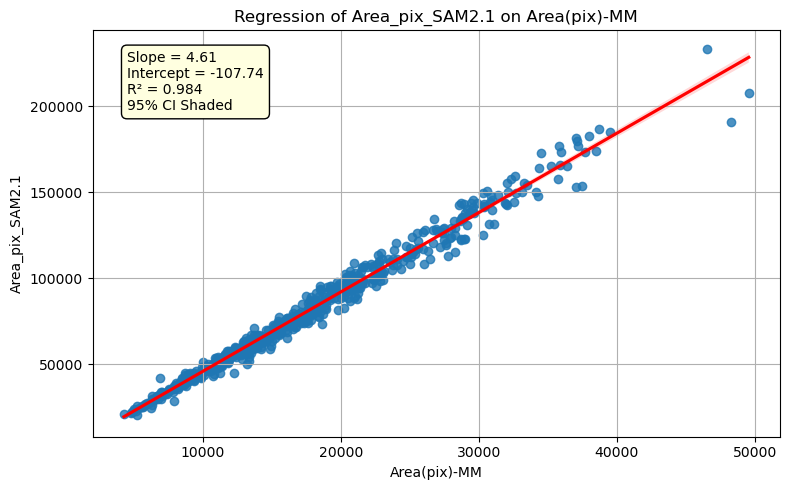


ANOVA result across ['Area(pix)-MM', 'Area_pix_SAM2.1']: F_onewayResult(statistic=np.float64(1784.4189476329095), pvalue=np.float64(2.7460270905383007e-245))
Kruskal-Wallis Test across ['Area(pix)-MM', 'Area_pix_SAM2.1']: KruskalResult(statistic=np.float64(933.175596365268), pvalue=np.float64(6.0254314090207124e-205))


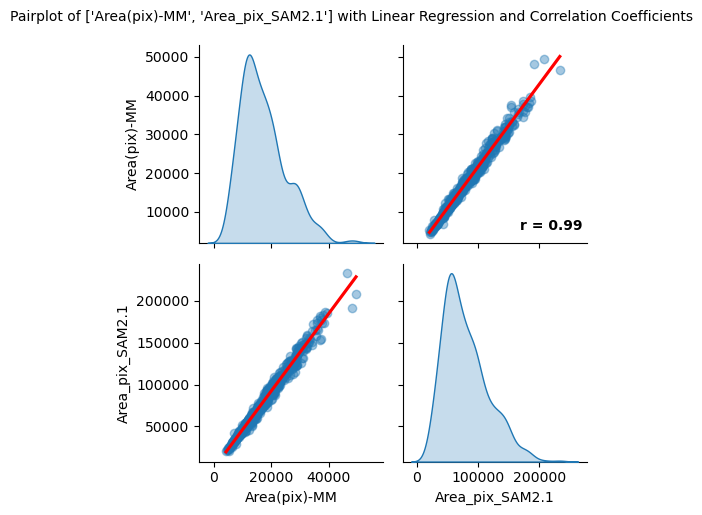

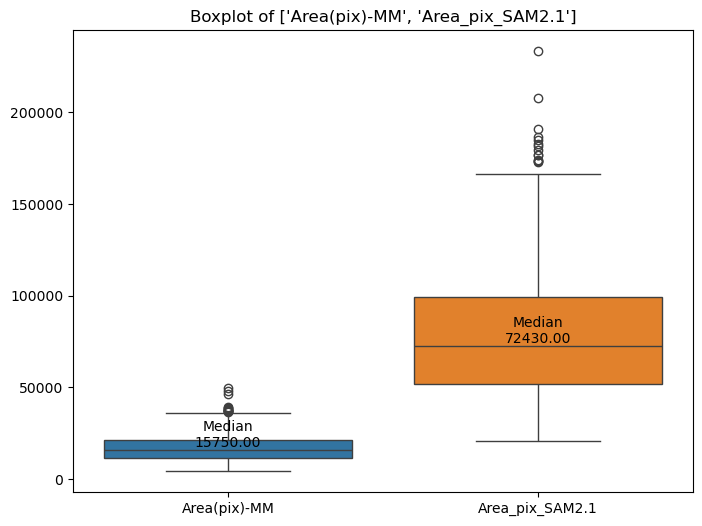

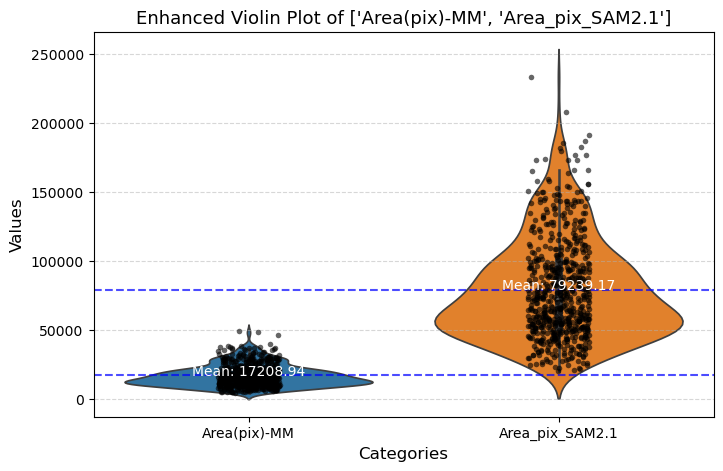

In [119]:
analyze_columns(df_100, ["Area(pix)-MM","Area_pix_SAM2.1"])

#### Effect size

In [120]:
# Cohen-s d test for Area in pixels
effect_size(df_100, ["Area(pix)-MM", "Area_pix_SAM2.1"])

The Cohen's d for Area(pix)-MM and Area_pix_SAM2.1: -2.354 
Effect Size Interpretation for Area(pix)-MM and Area_pix_SAM2.1: Large


#### Error analysis

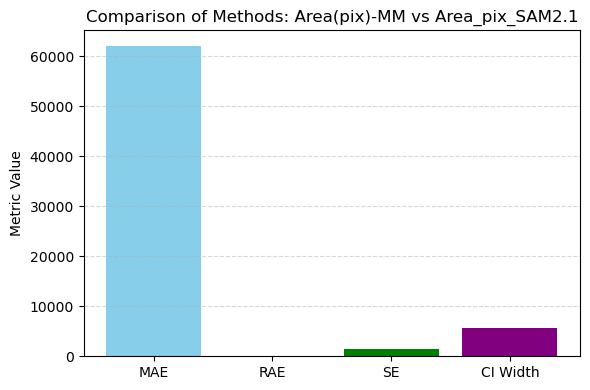

Reference Method  Compared Method           MAE       RAE           SE  \
0     Area(pix)-MM  Area_pix_SAM2.1  62030.228261  9.924222  1435.592526   

       CI Lower      CI Upper     CI Width  
0  76420.151795  82058.183609  5638.031814

In [121]:
compare_two_methods_with_plot(df_100, ["Area(pix)-MM", "Area_pix_SAM2.1"])

#### Levels of agreement

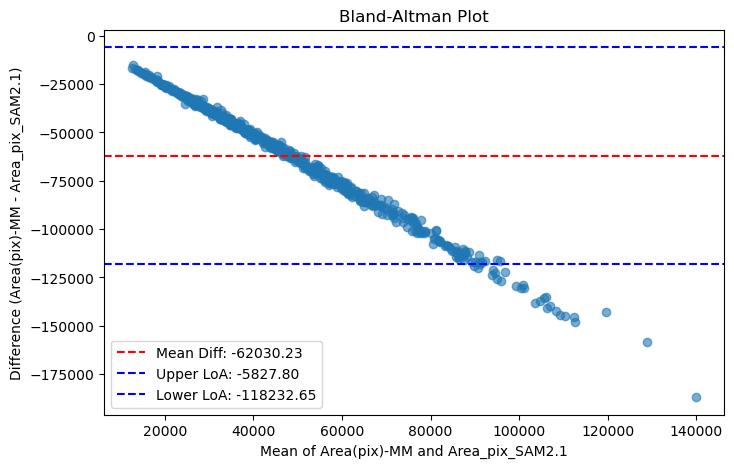

In [122]:
bland_altman_plot(df_100["Area(pix)-MM"], df_100["Area_pix_SAM2.1"], label_a="Area(pix)-MM", label_b="Area_pix_SAM2.1")

## Average data for each image from all 100 images

In [123]:
df_100images=df_100.groupby(df_100.index).mean()
df_100images

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2         19.322500      13.890000      19.600875     14.314509   
Vf104-1-2       11.071429       7.694286      11.408118      8.230620   
Vf106-1-2       11.242500       8.527500      11.303283      8.361465   
Vf108-1-1       10.403333       8.561667      10.855747      8.940023   
Vf109-1-1       16.495000      12.015000      16.336555     12.113819   
...                   ...            ...            ...           ...   
Vf67-1-1        14.514286      10.825714      15.008167     10.998745   
Vf68-1-1        12.337500       9.357500      12.756891      9.590631   
Vf71-1-1        20.316000      15.910000      20.246112     16.157181   
Vf8-1-1         10.618889       8.095556      10.984360      8.330176   
Vf89-1-1        14.700000      10.652500      14.705518     10.715207   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      219.500247  31003.750000        1.168153      1.368314   
Vf104-1-2     71.513188  10175.142857        1.185993      1.391063   
Vf106-1-2     72.600375  10323.250000        1.182813      1.355561   
Vf108-1-1     72.092068  10255.500000        1.167893      1.221891   
Vf109-1-1    150.081928  21238.500000        1.170977      1.348786   
...                 ...           ...             ...           ...   
Vf67-1-1     127.116859  18012.285714        1.200800      1.366912   
Vf68-1-1      97.839746  13885.250000        1.159991      1.330066   
Vf71-1-1     258.218601  36434.400000        1.156296      1.255246   
Vf8-1-1       70.955747  10091.888889        1.161806      1.317772   
Vf89-1-1     125.575985  17785.750000        1.174098      1.361657   

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         224.620047         19.723124        14.492135   
Vf104-1-2        72.320823         11.021296         8.362507   
Vf106-1-2        74.323136         11.019475         8.605892   
Vf108-1-1        71.378128         10.449711         8.730797   
Vf109-1-1       177.454029         17.201748        13.155763   
...                    ...               ...              ...   
Vf67-1-1        122.314508         14.567863        10.794229   
Vf68-1-1         93.366276         12.494538         9.524593   
Vf71-1-1        300.514284         21.520032        17.594018   
Vf8-1-1          74.968365         10.989454         8.662577   
Vf89-1-1        121.211018         14.120150        10.587393   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  Roundness_SAM2.1  \
ID                                                                  
Vf1-1-2              54.392223    137819.750000          0.852639   
Vf104-1-2            30.869002     47827.714286          0.847270   
Vf106-1-2            31.237828     49358.500000          0.853723   
Vf108-1-1            30.483010     47461.666667          0.858532   
Vf109-1-1            48.388177     91181.000000          0.854558   
...                        ...              ...               ...   
Vf67-1-1             40.548557     82548.142857          0.834763   
Vf68-1-1             34.882219     63047.500000          0.862594   
Vf71-1-1             62.244111    154447.800000          0.861169   
Vf8-1-1              31.113001     45650.888889          0.866013   
Vf89-1-1             39.133345     81289.750000          0.858861   

           Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                           
Vf1-1-2              1.172945                   497.471554   
Vf104-1-2            1.180564                   292.011866   
Vf106-1-2            1.171549                   293.557083   
Vf108-1-1            1.165340                   278.551584   
Vf109-1-1            

In [124]:
df_100images.head(2)

Length(mm)_DCM  Width(mm)_DCM  Length(mm)-MM  Width(mm)-MM  \
ID                                                                      
Vf1-1-2         19.322500      13.890000      19.600875     14.314509   
Vf104-1-2       11.071429       7.694286      11.408118      8.230620   

           Area(mm²)-MM  Area(pix)-MM  Circularity-MM  L/W Ratio-MM  \
ID                                                                    
Vf1-1-2      219.500247  31003.750000        1.168153      1.368314   
Vf104-1-2     71.513188  10175.142857        1.185993      1.391063   

           Area_mm2_SAM2.1  Length_mm_SAM2.1  Width_mm_SAM2.1  \
ID                                                              
Vf1-1-2         224.620047         19.723124        14.492135   
Vf104-1-2        72.320823         11.021296         8.362507   

           perimeter_mm_SAM2.1  Area_pix_SAM2.1  Roundness_SAM2.1  \
ID                                                                  
Vf1-1-2              54.392223    137819.750000          0.852639   
Vf104-1-2            30.869002     47827.714286          0.847270   

           Circularity_SAM2.1  AxisMajorLength(pix)_SAM2.1  \
ID                                                           
Vf1-1-2              1.172945                   497.471554   
Vf104-1-2            1.180564                   292.011866   

           AxisMinorLength(pix)_SAM2.1  Aspect_Ratio_SAM2.1  Aspect Ratio-DCM  
ID                                                                             
Vf1-1-2                     352.863993             1.409362          1.391691  
Vf104-1-2                   209.077571             1.398353          1.443215

### Average Length of beans 

#### Descriptive statistics


Analyzing columns: ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']

Descriptive Statistics:
        Length(mm)_DCM  Length(mm)-MM  Length_mm_SAM2.1
count       99.000000      99.000000         99.000000
mean        14.274762      14.327975         13.655280
std          3.278929       3.182348          2.921198
min          8.260000       8.287498          7.993105
25%         11.885833      11.845652         11.348125
50%         14.136667      14.170585         13.434411
75%         16.712500      16.588277         15.555875
max         21.040000      20.639073         21.520032

Skewness:
 Length(mm)_DCM      0.271889
Length(mm)-MM       0.290637
Length_mm_SAM2.1    0.390252
dtype: float64

Kurtosis:
 Length(mm)_DCM     -0.796057
Length(mm)-MM      -0.815686
Length_mm_SAM2.1   -0.382472
dtype: float64


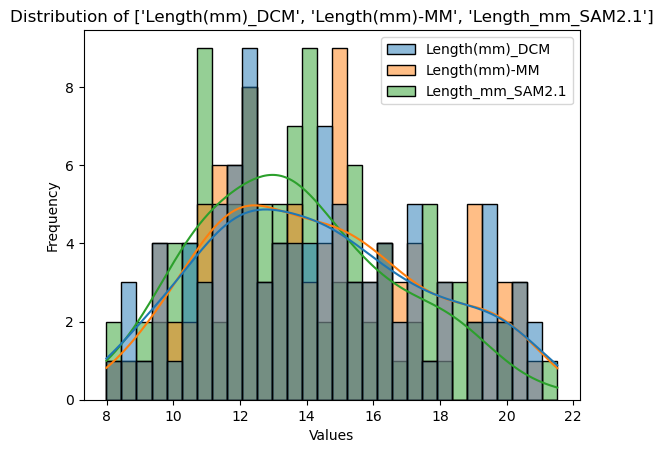


Shapiro-Wilk Test for 'Length(mm)_DCM': ShapiroResult(statistic=np.float64(0.9697139947728977), pvalue=np.float64(0.022034245002034252))

Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=np.float64(0.9674416989691348), pvalue=np.float64(0.014858494873870256))

Shapiro-Wilk Test for 'Length_mm_SAM2.1': ShapiroResult(statistic=np.float64(0.979547106477576), pvalue=np.float64(0.1265045742243736))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(1.2095513651597525), pvalue=np.float64(0.299811224179062))
Pearson correlation between 'Length(mm)_DCM' and 'Length(mm)-MM': PearsonRResult(statistic=np.float64(0.9976893469819332), pvalue=np.float64(4.218514790266808e-115))


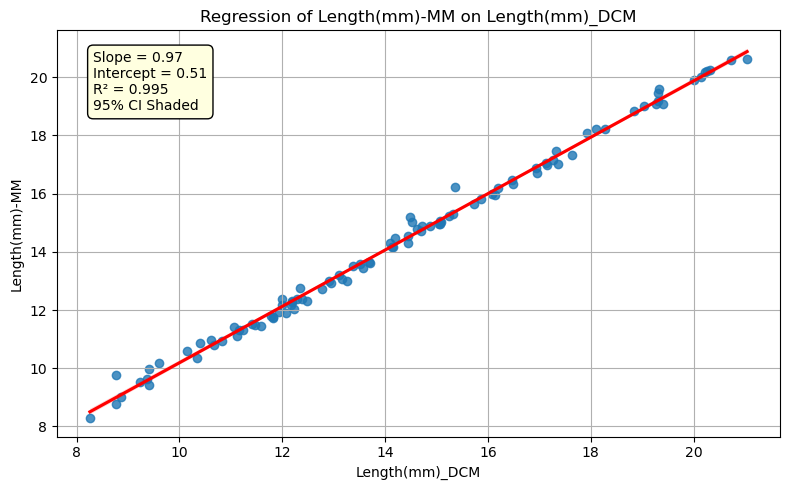

Pearson correlation between 'Length(mm)_DCM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9690818788143295), pvalue=np.float64(9.287925352042738e-61))


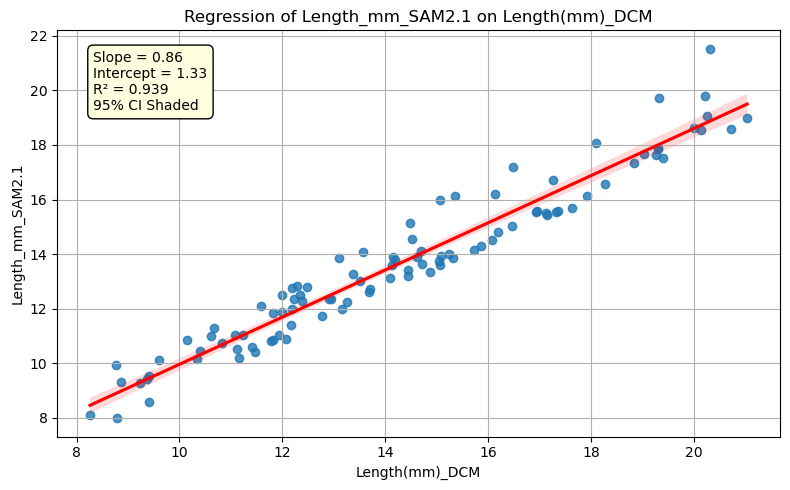

Pearson correlation between 'Length(mm)-MM' and 'Length_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9743886672042367), pvalue=np.float64(1.1374008410269297e-64))


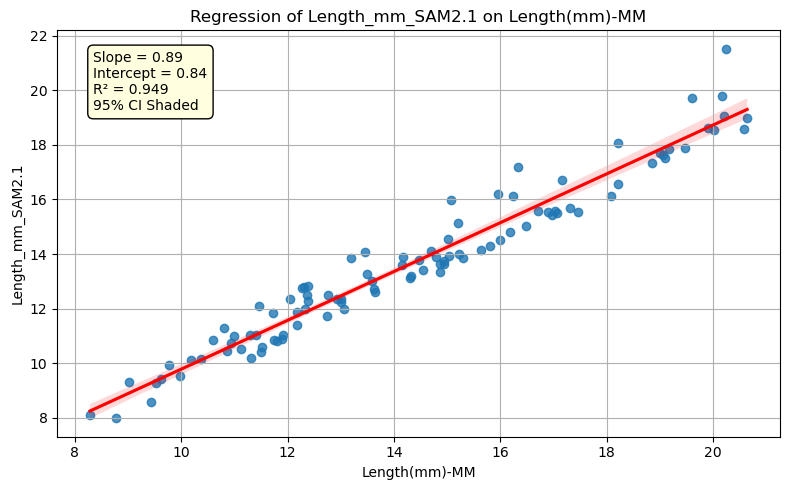


ANOVA result across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: F_onewayResult(statistic=np.float64(1.4122013499577337), pvalue=np.float64(0.2452539419766892))
Kruskal-Wallis Test across ['Length(mm)_DCM', 'Length(mm)-MM', 'Length_mm_SAM2.1']: KruskalResult(statistic=np.float64(2.3498273357943162), pvalue=np.float64(0.3088456418308167))


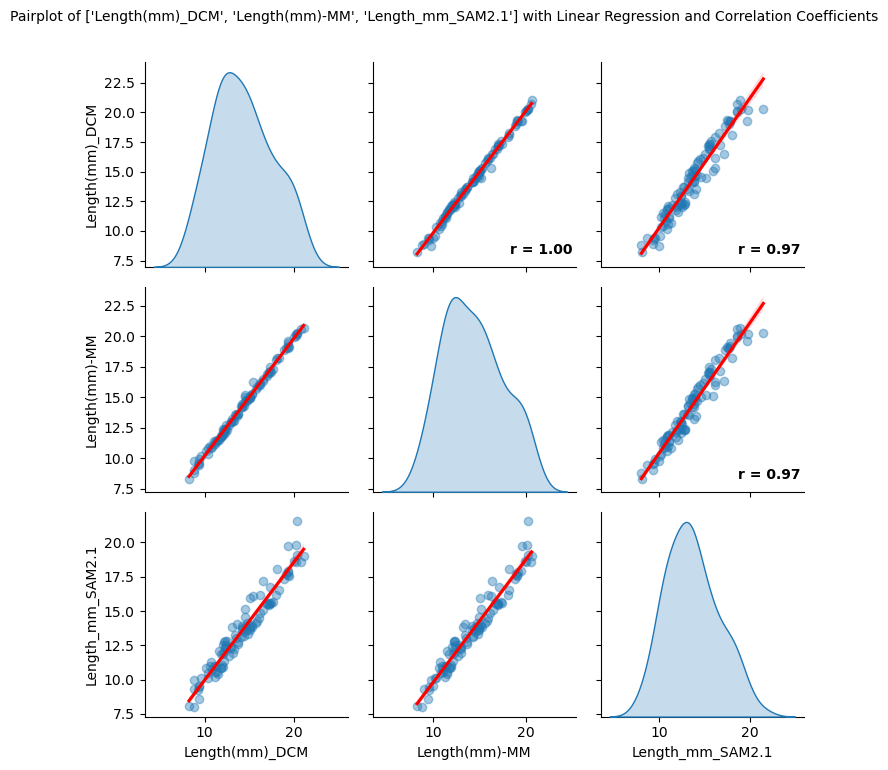

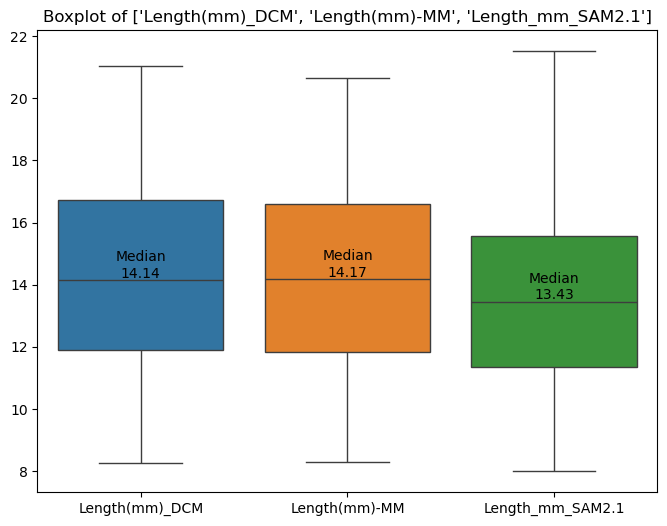

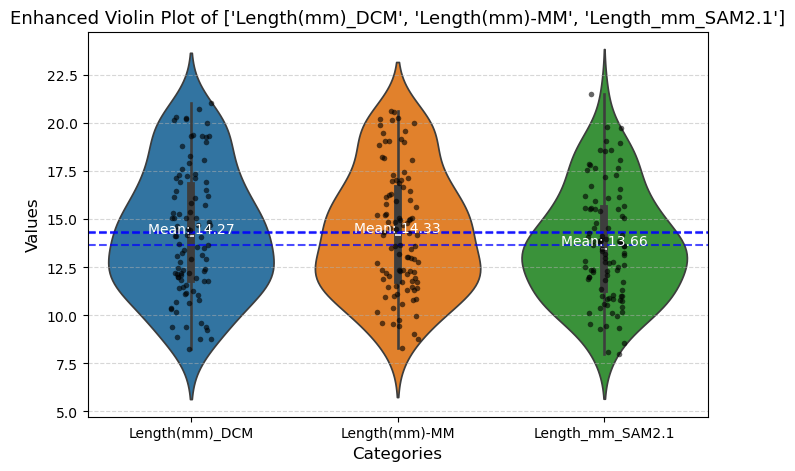

In [125]:
# Perform analysis on both sets of columns
analyze_columns(df_100images, ["Length(mm)_DCM", "Length(mm)-MM", "Length_mm_SAM2.1"])

#### Effect size

In [126]:
#Effect size for avg length
effect_size(df_100images, ["Length(mm)_DCM", "Length(mm)-MM"]) # ground truth data
effect_size(df_100images, ["Length(mm)_DCM", "Length_mm_SAM2.1"]) # gold standard
effect_size(df_100images, ["Length(mm)-MM", "Length_mm_SAM2.1"]) # silver standard

The Cohen's d for Length(mm)_DCM and Length(mm)-MM: -0.016 
Effect Size Interpretation for Length(mm)_DCM and Length(mm)-MM: Small (negligible)
The Cohen's d for Length(mm)_DCM and Length_mm_SAM2.1: 0.199 
Effect Size Interpretation for Length(mm)_DCM and Length_mm_SAM2.1: Small (negligible)
The Cohen's d for Length(mm)-MM and Length_mm_SAM2.1: 0.220 
Effect Size Interpretation for Length(mm)-MM and Length_mm_SAM2.1: Small to Medium


#### Error analysis 

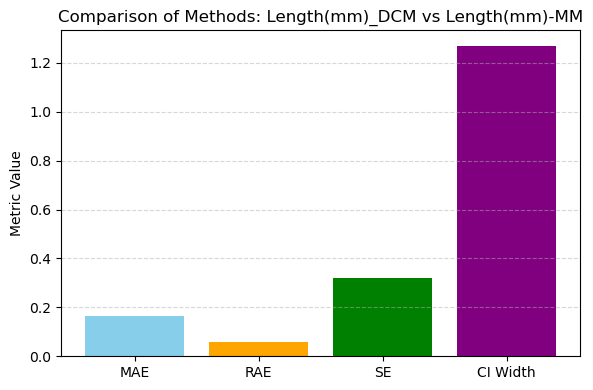

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0   Length(mm)_DCM   Length(mm)-MM  0.163401  0.060249  0.319838  13.693266   

    CI Upper  CI Width  
0  14.962683  1.269416

In [127]:
compare_two_methods_with_plot(df_100images, [ 'Length(mm)_DCM', 'Length(mm)-MM'])

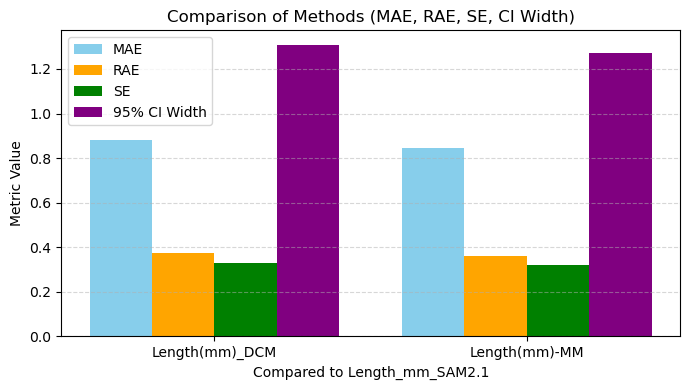

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0  Length_mm_SAM2.1  Length(mm)_DCM  0.880572  0.375354  0.329545  13.620791   
1  Length_mm_SAM2.1   Length(mm)-MM  0.845363  0.360345  0.319838  13.693266   

    CI Upper  CI Width  
0  14.928732  1.307942  
1  14.962683  1.269416

In [128]:
compare_three_methods_with_plot(df_100images, ['Length_mm_SAM2.1','Length(mm)_DCM', 'Length(mm)-MM'])

#### Agreement levels

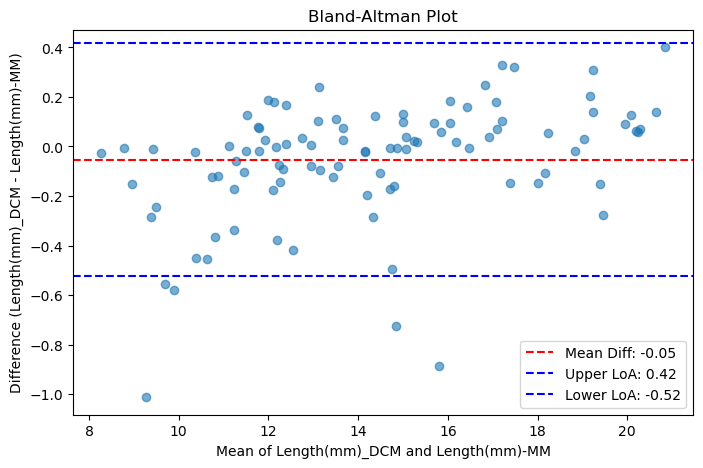

In [129]:
bland_altman_plot(df_100images["Length(mm)_DCM"], df_100images["Length(mm)-MM"], label_a="Length(mm)_DCM", label_b="Length(mm)-MM")

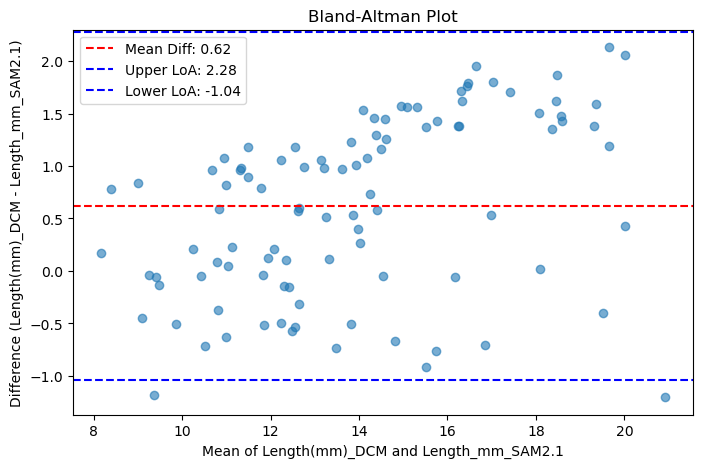

In [130]:
bland_altman_plot(df_100images["Length(mm)_DCM"], df_100images["Length_mm_SAM2.1"], label_a="Length(mm)_DCM", label_b="Length_mm_SAM2.1")

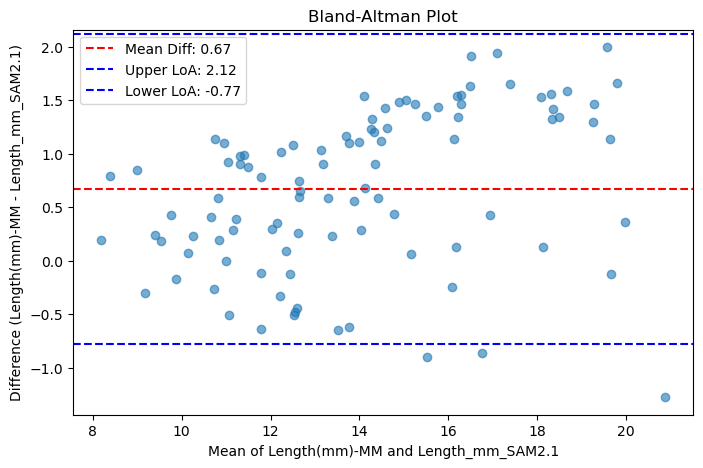

In [131]:
bland_altman_plot(df_100images["Length(mm)-MM"], df_100images["Length_mm_SAM2.1"], label_a="Length(mm)-MM", label_b="Length_mm_SAM2.1")

### Average seed data for Width (mm)

#### Descriptive statistics


Analyzing columns: ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']

Descriptive Statistics:
        Width(mm)_DCM  Width(mm)-MM  Width_mm_SAM2.1
count      99.000000     99.000000        99.000000
mean       10.621497     10.722898        11.312881
std         2.296634      2.303053         2.591090
min         6.045000      6.160683         6.337874
25%         9.104333      9.220962         9.560089
50%        10.101429     10.164260        10.779704
75%        12.078750     12.194483        13.094988
max        16.455000     16.157181        17.781404

Skewness:
 Width(mm)_DCM      0.437309
Width(mm)-MM       0.467004
Width_mm_SAM2.1    0.490320
dtype: float64

Kurtosis:
 Width(mm)_DCM     -0.412828
Width(mm)-MM      -0.434115
Width_mm_SAM2.1   -0.361265
dtype: float64


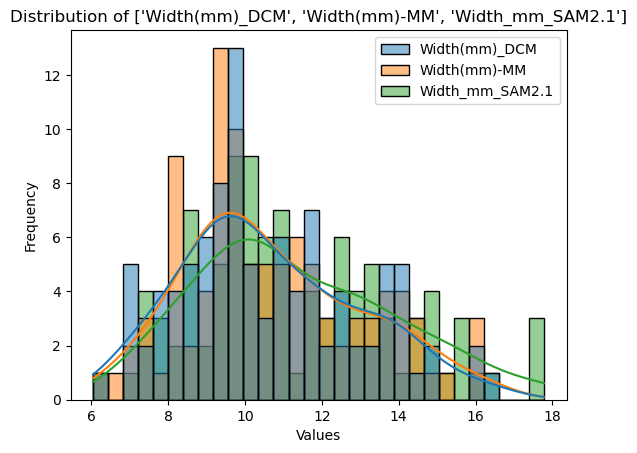


Shapiro-Wilk Test for 'Width(mm)_DCM': ShapiroResult(statistic=np.float64(0.9724762790013644), pvalue=np.float64(0.035820247114395506))

Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=np.float64(0.9676092679212986), pvalue=np.float64(0.015293616319827832))

Shapiro-Wilk Test for 'Width_mm_SAM2.1': ShapiroResult(statistic=np.float64(0.9695585013872723), pvalue=np.float64(0.02144431856589764))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(0.7544051020840624), pvalue=np.float64(0.47119847011982585))
Pearson correlation between 'Width(mm)_DCM' and 'Width(mm)-MM': PearsonRResult(statistic=np.float64(0.9959029920707746), pvalue=np.float64(4.683645702283183e-103))


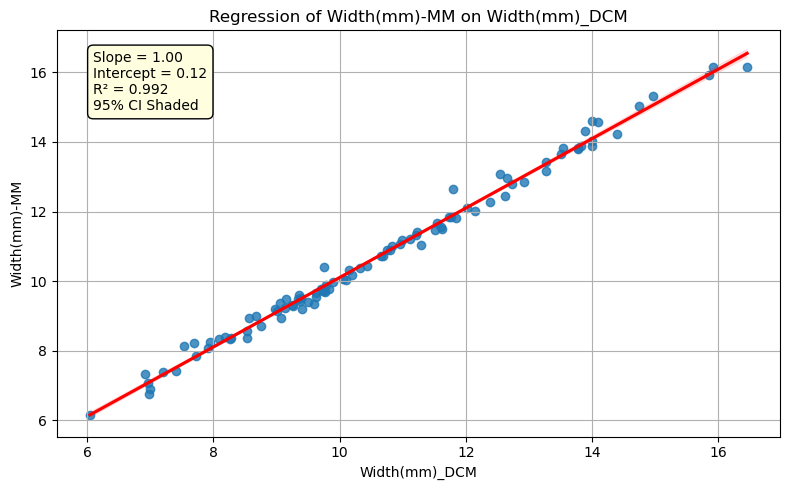

Pearson correlation between 'Width(mm)_DCM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9794653381222094), pvalue=np.float64(2.8476056251711e-69))


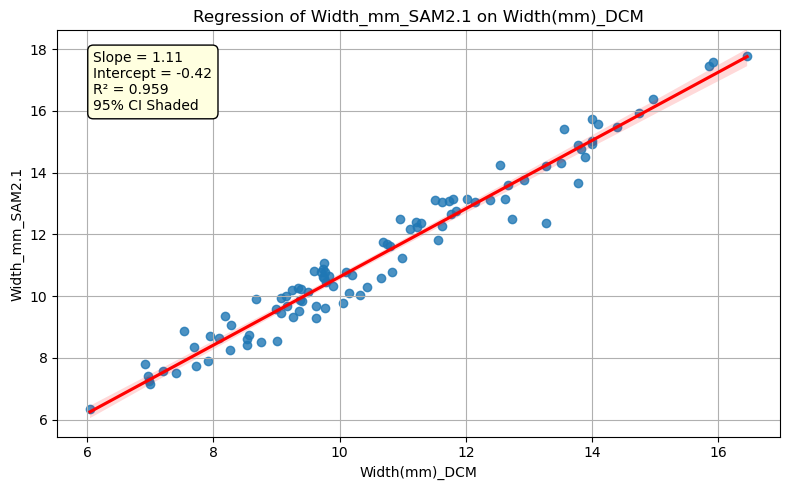

Pearson correlation between 'Width(mm)-MM' and 'Width_mm_SAM2.1': PearsonRResult(statistic=np.float64(0.9816339484395967), pvalue=np.float64(1.335742042207111e-71))


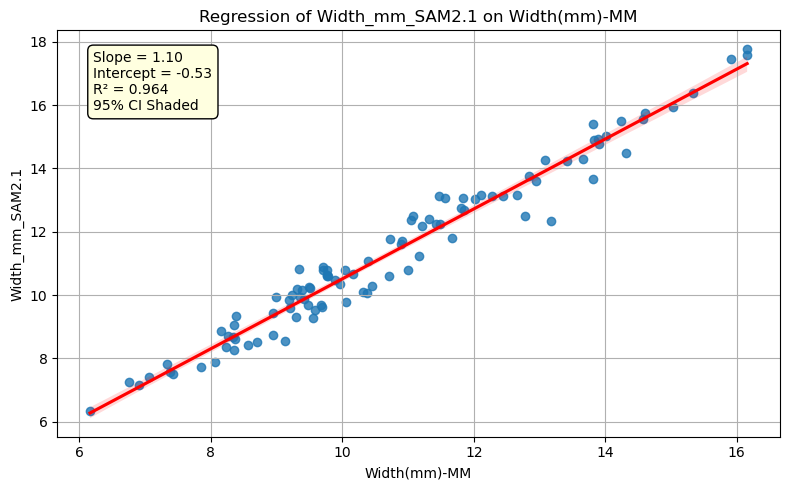


ANOVA result across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: F_onewayResult(statistic=np.float64(2.394154942694207), pvalue=np.float64(0.09302680915114195))
Kruskal-Wallis Test across ['Width(mm)_DCM', 'Width(mm)-MM', 'Width_mm_SAM2.1']: KruskalResult(statistic=np.float64(3.9467853232342804), pvalue=np.float64(0.13898452796972485))


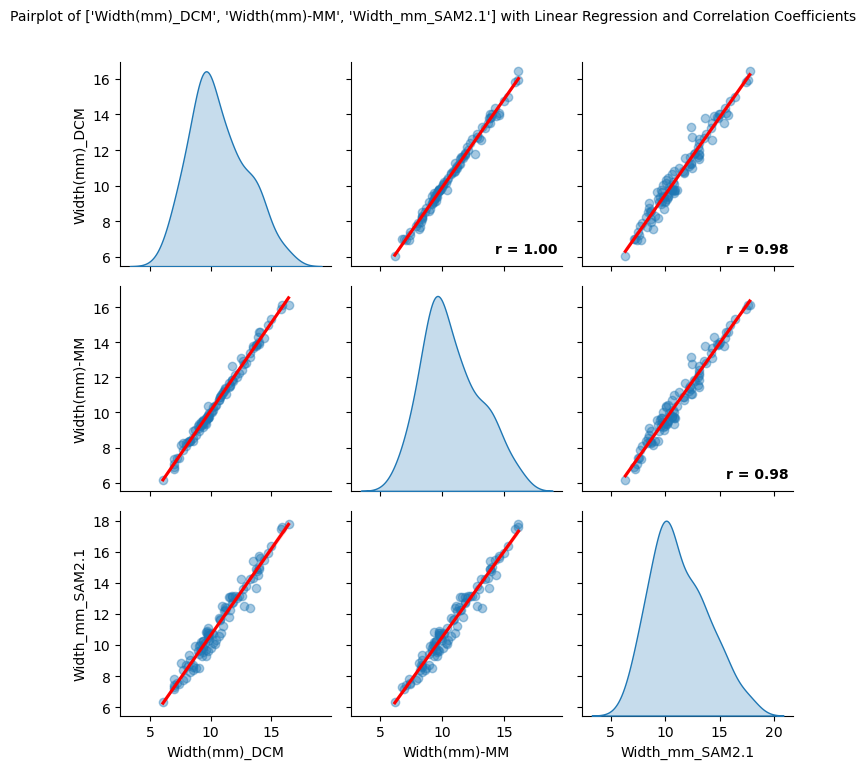

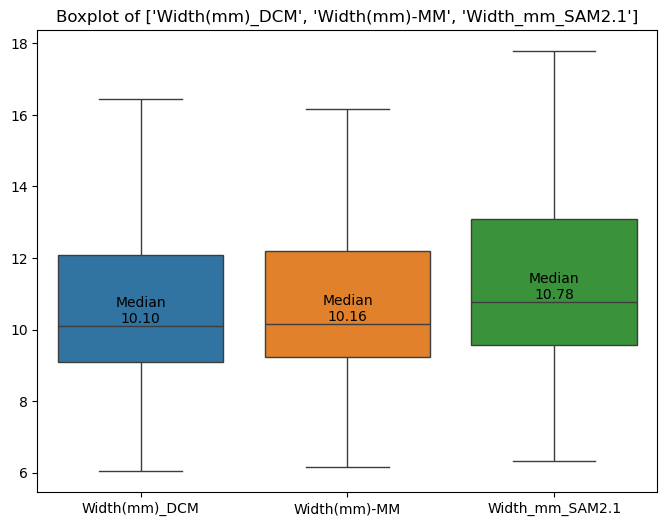

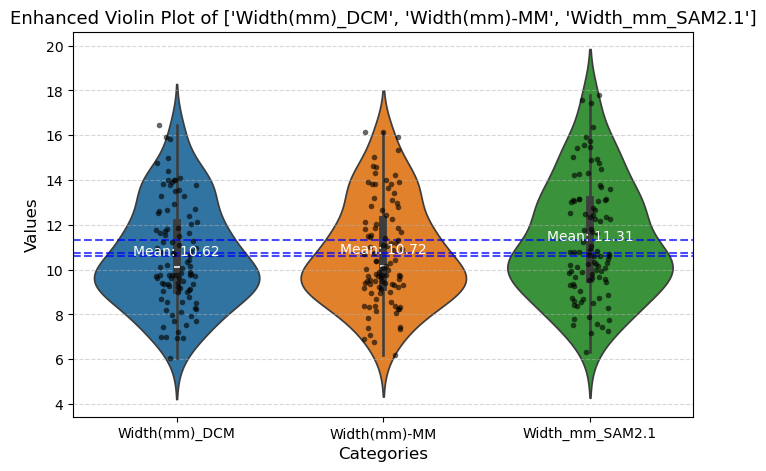

In [132]:
# Perform analysis on both sets of columns
analyze_columns(df_100images, ["Width(mm)_DCM", "Width(mm)-MM", "Width_mm_SAM2.1"])

#### Effect size

In [133]:
#Effect size for length
effect_size(df_100images, ["Width(mm)_DCM", "Width(mm)_DCM"])

effect_size(df_100images, ["Width(mm)_DCM", "Width_mm_SAM2.1"])

effect_size(df_100images, ["Width(mm)-MM", "Width_mm_SAM2.1"])

The Cohen's d for Width(mm)_DCM and Width(mm)_DCM: 0.000 
Effect Size Interpretation for Width(mm)_DCM and Width(mm)_DCM: Small (negligible)
The Cohen's d for Width(mm)_DCM and Width_mm_SAM2.1: -0.282 
Effect Size Interpretation for Width(mm)_DCM and Width_mm_SAM2.1: Small to Medium
The Cohen's d for Width(mm)-MM and Width_mm_SAM2.1: -0.241 
Effect Size Interpretation for Width(mm)-MM and Width_mm_SAM2.1: Small to Medium


#### Error analysis

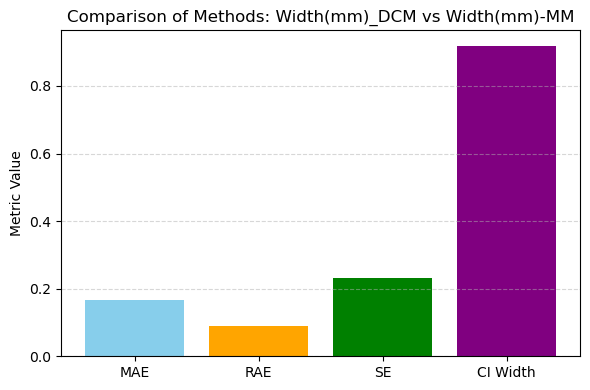

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0    Width(mm)_DCM    Width(mm)-MM  0.167923  0.089149  0.231466  10.263562   

    CI Upper  CI Width  
0  11.182234  0.918672

In [134]:
# Error difference
compare_two_methods_with_plot(df_100images, [ 'Width(mm)_DCM', 'Width(mm)-MM'])

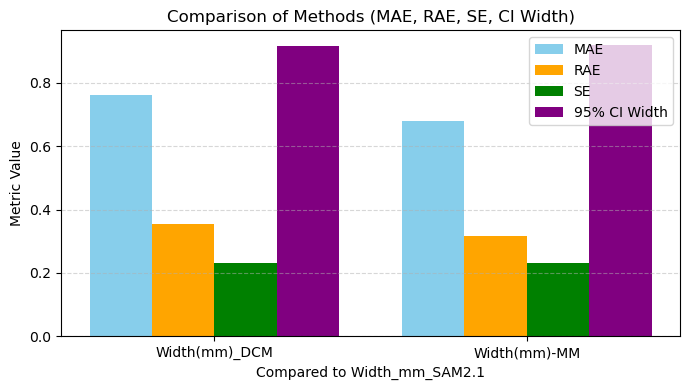

Reference Method Compared Method       MAE       RAE        SE   CI Lower  \
0  Width_mm_SAM2.1   Width(mm)_DCM  0.760122  0.354458  0.230820  10.163441   
1  Width_mm_SAM2.1    Width(mm)-MM  0.679518  0.316870  0.231466  10.263562   

    CI Upper  CI Width  
0  11.079552  0.916111  
1  11.182234  0.918672

In [135]:
# Error difference
compare_three_methods_with_plot(df_100images, ['Width_mm_SAM2.1', 'Width(mm)_DCM', 'Width(mm)-MM'])


#### Agreement levels

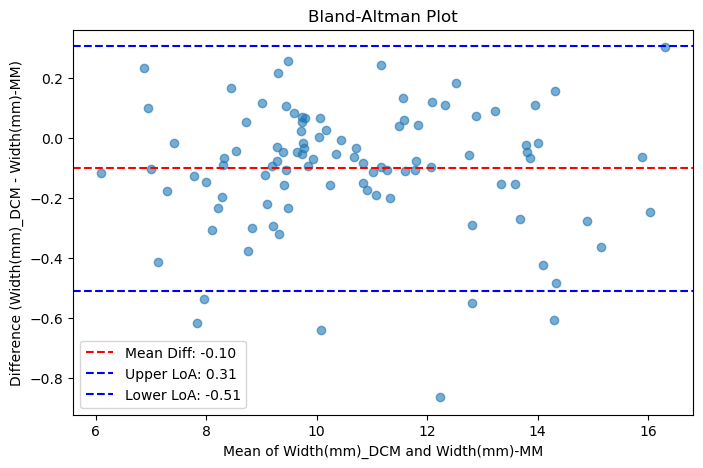

In [136]:
bland_altman_plot(df_100images["Width(mm)_DCM"], df_100images["Width(mm)-MM"], label_a="Width(mm)_DCM", label_b="Width(mm)-MM")

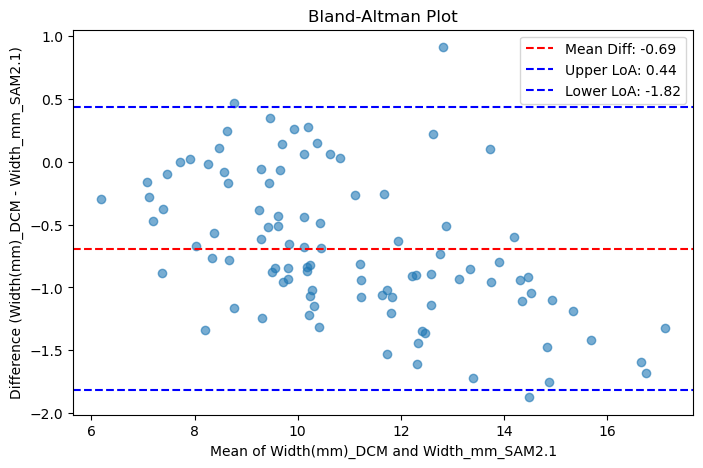

In [137]:
bland_altman_plot(df_100images["Width(mm)_DCM"], df_100images["Width_mm_SAM2.1"], label_a="Width(mm)_DCM", label_b="Width_mm_SAM2.1")

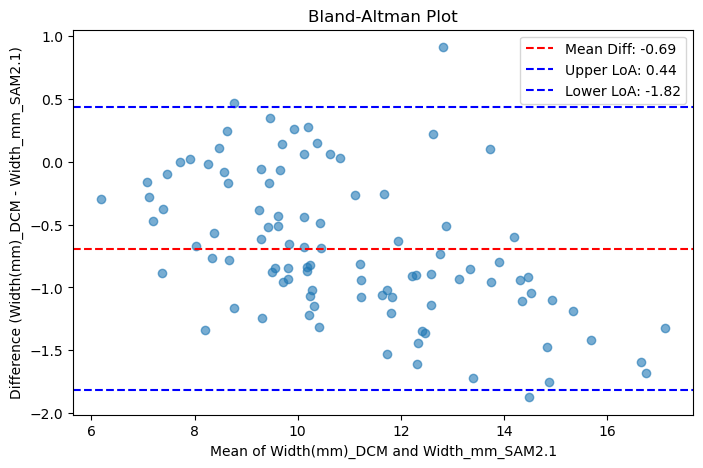

In [138]:
bland_altman_plot(df_100images["Width(mm)_DCM"], df_100images["Width_mm_SAM2.1"], label_a="Width(mm)_DCM", label_b="Width_mm_SAM2.1")

### Average seed data for Area (mm2)

#### Descriptive statistics


Analyzing columns: ['Area(mm²)-MM', 'Area_mm2_SAM2.1']

Descriptive Statistics:
        Area(mm²)-MM  Area_mm2_SAM2.1
count     99.000000        99.000000
mean     124.681640       128.247793
std       54.105401        55.882782
min       39.657486        40.527196
25%       84.589635        85.511072
50%      109.116601       111.340501
75%      151.644013       155.283858
max      262.298994       300.514284

Skewness:
 Area(mm²)-MM       0.713893
Area_mm2_SAM2.1    0.835100
dtype: float64

Kurtosis:
 Area(mm²)-MM      -0.312655
Area_mm2_SAM2.1    0.200923
dtype: float64


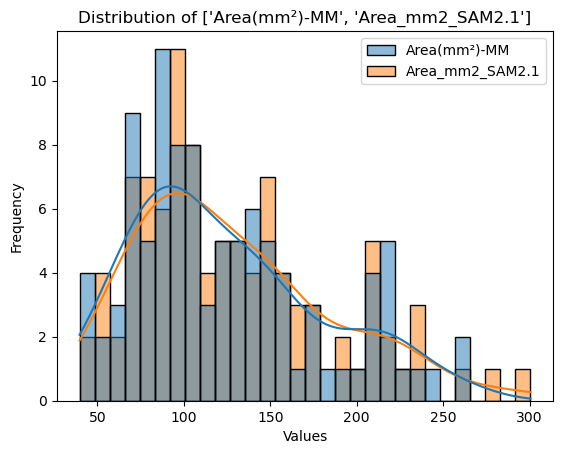


Shapiro-Wilk Test for 'Area(mm²)-MM': ShapiroResult(statistic=np.float64(0.9386983108042866), pvalue=np.float64(0.00017391302047732945))

Shapiro-Wilk Test for 'Area_mm2_SAM2.1': ShapiroResult(statistic=np.float64(0.9406768549546651), pvalue=np.float64(0.00022911101464434785))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(0.0216780801827249), pvalue=np.float64(0.8830980514959627))
Pearson correlation between 'Area(mm²)-MM' and 'Area_mm2_SAM2.1': PearsonRResult(statistic=np.float64(0.9907253500935755), pvalue=np.float64(6.720157205183513e-86))


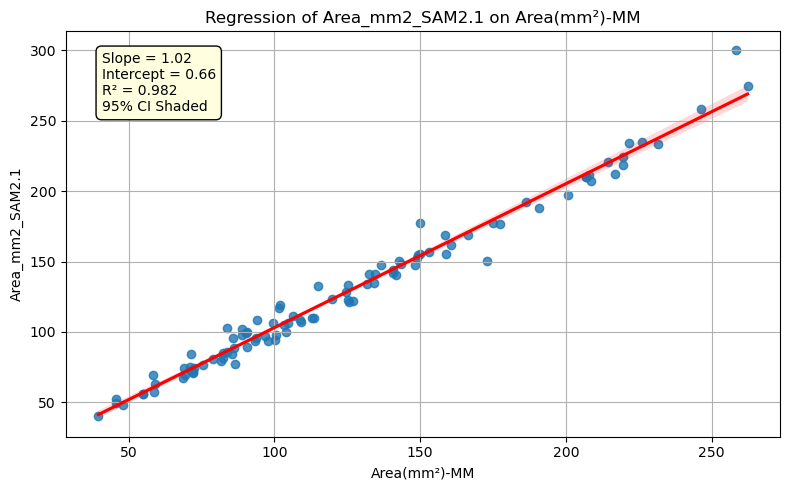


ANOVA result across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: F_onewayResult(statistic=np.float64(0.20809410514643603), pvalue=np.float64(0.6487703955715116))
Kruskal-Wallis Test across ['Area(mm²)-MM', 'Area_mm2_SAM2.1']: KruskalResult(statistic=np.float64(0.20717145568676187), pvalue=np.float64(0.6489934791570495))


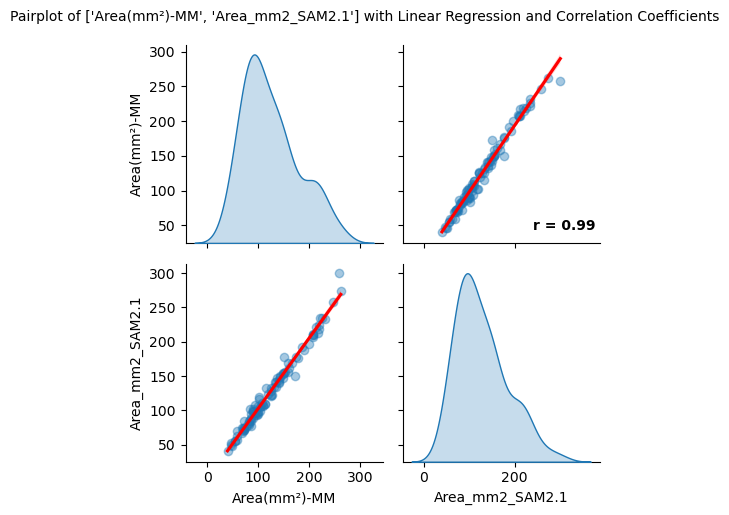

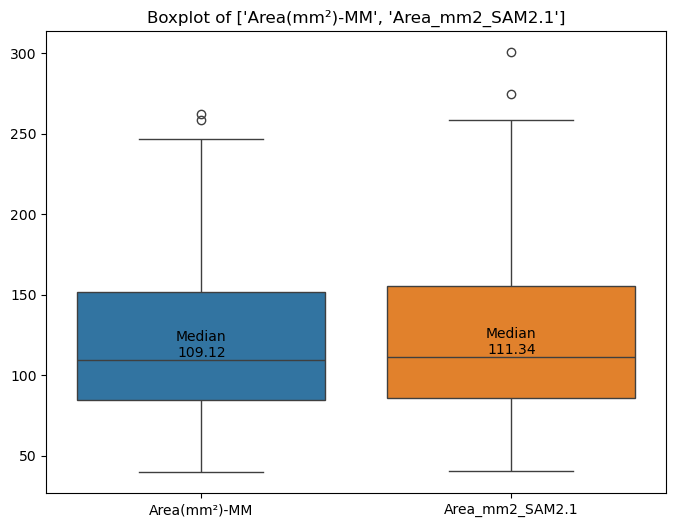

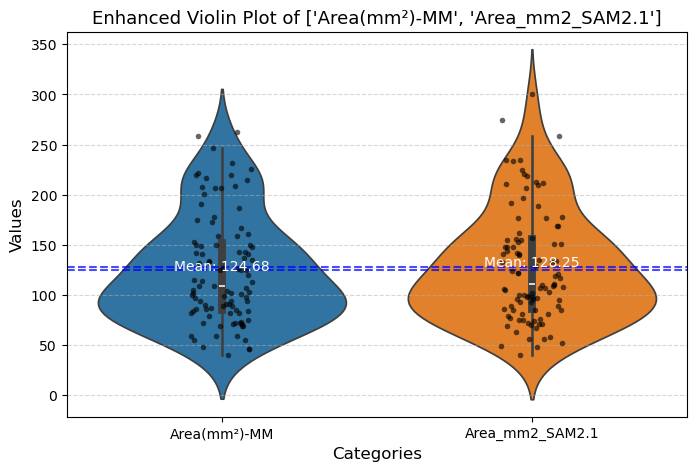

In [139]:
analyze_columns(df_100images, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

#### Effect size

In [140]:
# Cohen-s d test for Area in mm2
effect_size(df_100images, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

The Cohen's d for Area(mm²)-MM and Area_mm2_SAM2.1: -0.065 
Effect Size Interpretation for Area(mm²)-MM and Area_mm2_SAM2.1: Small (negligible)



#### Error analysis

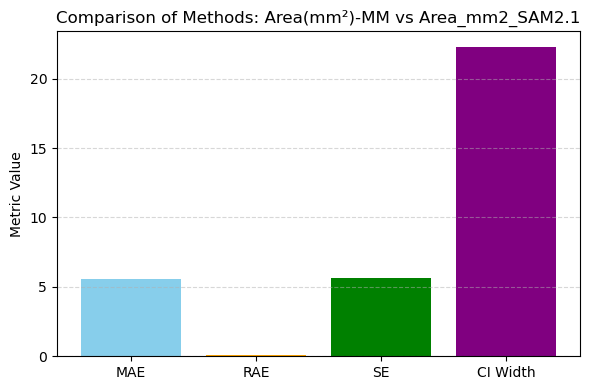

Reference Method  Compared Method       MAE       RAE        SE    CI Lower  \
0     Area(mm²)-MM  Area_mm2_SAM2.1  5.564192  0.125742  5.616431  117.102169   

     CI Upper   CI Width  
0  139.393417  22.291249

In [141]:
compare_two_methods_with_plot(df_100images, ["Area(mm²)-MM", "Area_mm2_SAM2.1"])

#### Agreement levels

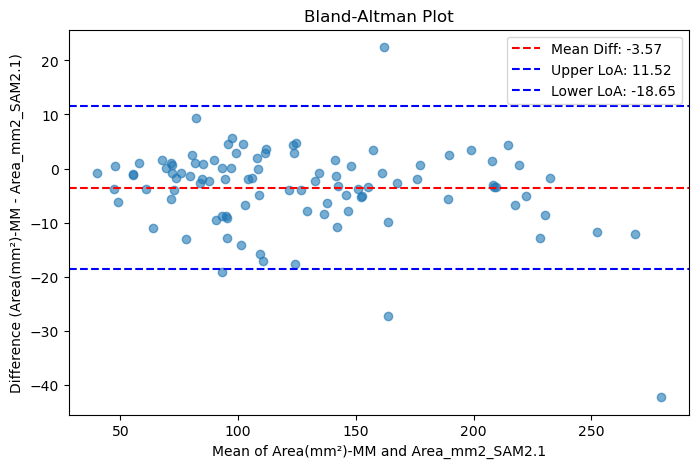

In [142]:
bland_altman_plot(df_100images["Area(mm²)-MM"], df_100images["Area_mm2_SAM2.1"], label_a="Area(mm²)-MM", label_b="Area_mm2_SAM2.1")

### Aspect Ratio

#### Descriptive statistics


Analyzing columns: ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']

Descriptive Statistics:
        Aspect Ratio-DCM  L/W Ratio-MM  Aspect_Ratio_SAM2.1
count         99.000000     99.000000            99.000000
mean           1.342840      1.337280             1.366626
std            0.088265      0.083484             0.087007
min            1.162113      1.170620             1.207872
25%            1.278339      1.278707             1.299616
50%            1.338654      1.329444             1.359137
75%            1.397659      1.380971             1.419550
max            1.629499      1.611820             1.652598

Skewness:
 Aspect Ratio-DCM       0.583560
L/W Ratio-MM           0.751613
Aspect_Ratio_SAM2.1    0.623134
dtype: float64

Kurtosis:
 Aspect Ratio-DCM       0.506770
L/W Ratio-MM           1.093241
Aspect_Ratio_SAM2.1    0.775427
dtype: float64


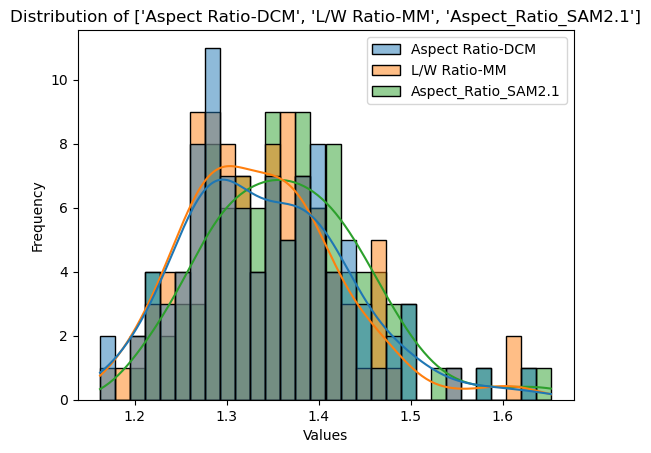


Shapiro-Wilk Test for 'Aspect Ratio-DCM': ShapiroResult(statistic=np.float64(0.9757655879073427), pvalue=np.float64(0.06435495798516572))

Shapiro-Wilk Test for 'L/W Ratio-MM': ShapiroResult(statistic=np.float64(0.965216072472313), pvalue=np.float64(0.010158354230178157))

Shapiro-Wilk Test for 'Aspect_Ratio_SAM2.1': ShapiroResult(statistic=np.float64(0.9724560392991662), pvalue=np.float64(0.035692085964932695))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(0.2523532957418087), pvalue=np.float64(0.7771383116024413))
Pearson correlation between 'Aspect Ratio-DCM' and 'L/W Ratio-MM': PearsonRResult(statistic=np.float64(0.9645647104503069), pvalue=np.float64(6.2206909645321156e-58))


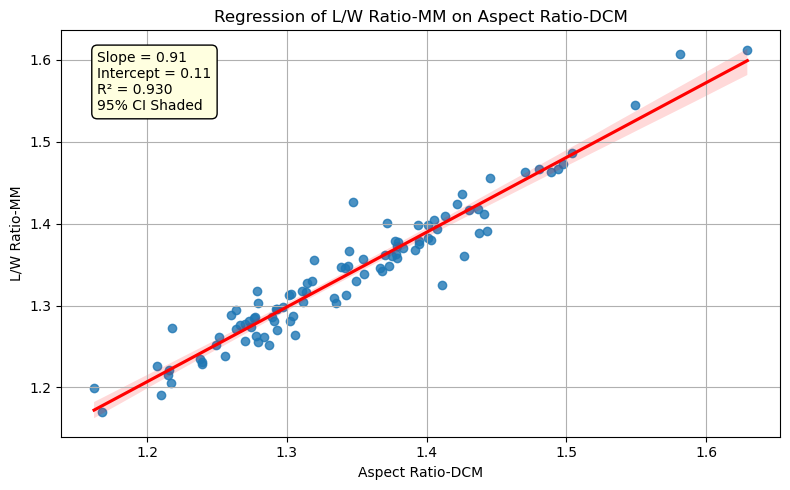

Pearson correlation between 'Aspect Ratio-DCM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=np.float64(0.952642434272847), pvalue=np.float64(6.020681394205382e-52))


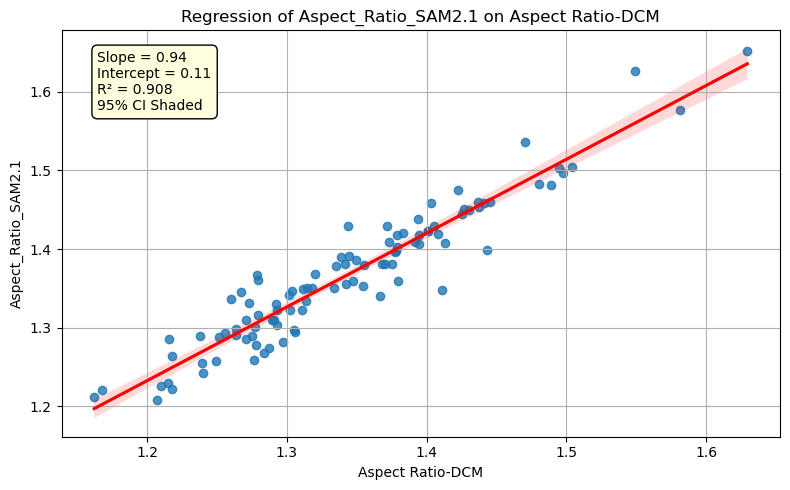

Pearson correlation between 'L/W Ratio-MM' and 'Aspect_Ratio_SAM2.1': PearsonRResult(statistic=np.float64(0.9544591102005088), pvalue=np.float64(9.430025585970493e-53))


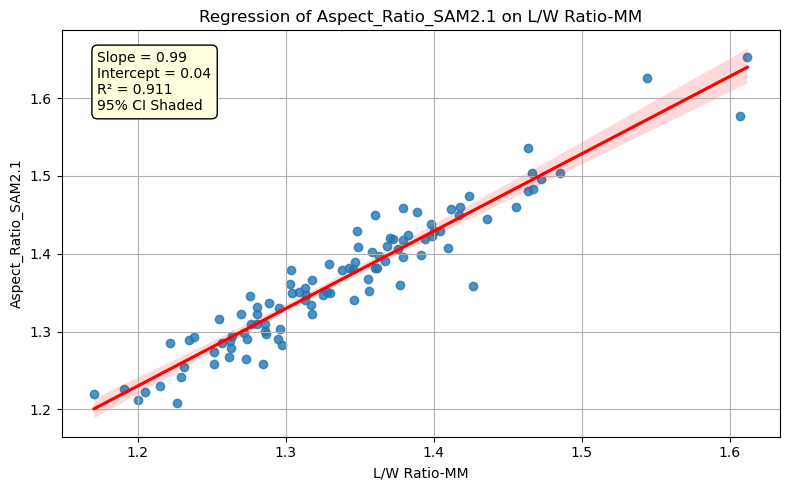


ANOVA result across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: F_onewayResult(statistic=np.float64(3.231825748732119), pvalue=np.float64(0.04089236823511427))
Kruskal-Wallis Test across ['Aspect Ratio-DCM', 'L/W Ratio-MM', 'Aspect_Ratio_SAM2.1']: KruskalResult(statistic=np.float64(7.01890027657771), pvalue=np.float64(0.029913358125919727))


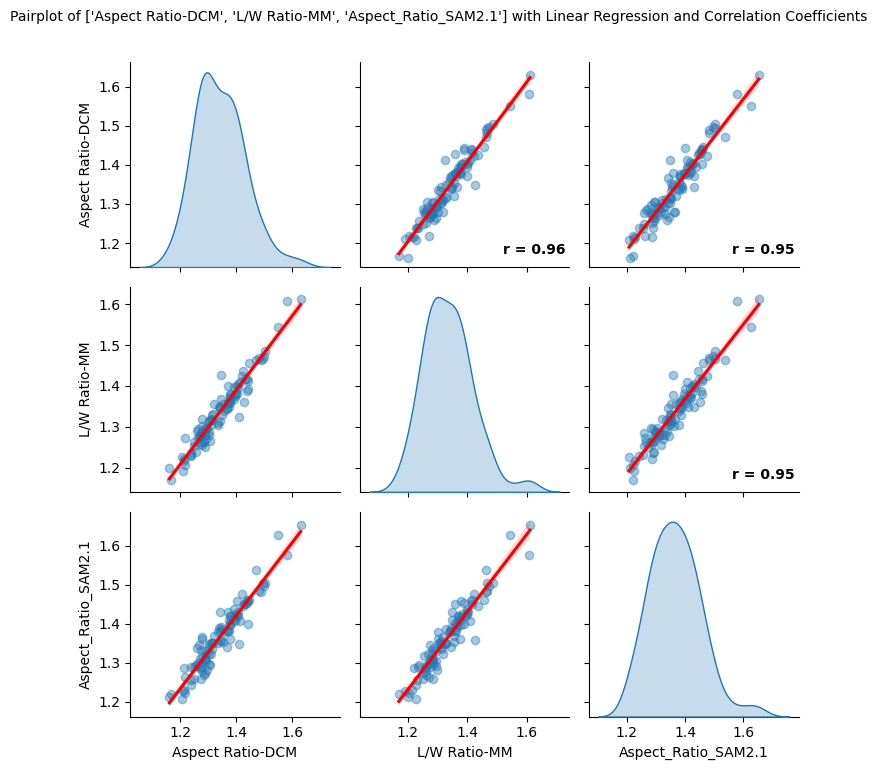

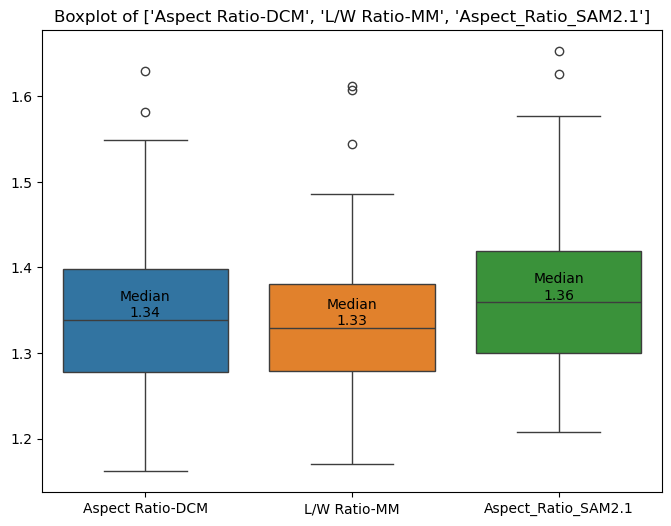

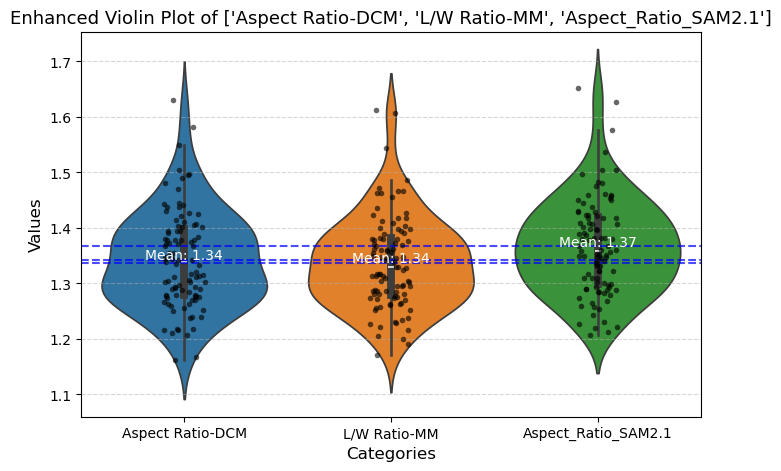

In [143]:
analyze_columns(df_100images, ["Aspect Ratio-DCM","L/W Ratio-MM","Aspect_Ratio_SAM2.1"])

#### Effect size

In [144]:
# Cohen-s d test for aspect ratio
effect_size(df_100images, ["Aspect Ratio-DCM", "L/W Ratio-MM"])
effect_size(df_100images, ["L/W Ratio-MM", "Aspect_Ratio_SAM2.1"])
effect_size(df_100images, ["Aspect Ratio-DCM", "Aspect_Ratio_SAM2.1"])

The Cohen's d for Aspect Ratio-DCM and L/W Ratio-MM: 0.065 
Effect Size Interpretation for Aspect Ratio-DCM and L/W Ratio-MM: Small (negligible)
The Cohen's d for L/W Ratio-MM and Aspect_Ratio_SAM2.1: -0.344 
Effect Size Interpretation for L/W Ratio-MM and Aspect_Ratio_SAM2.1: Small to Medium
The Cohen's d for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: -0.271 
Effect Size Interpretation for Aspect Ratio-DCM and Aspect_Ratio_SAM2.1: Small to Medium


#### Error analysis

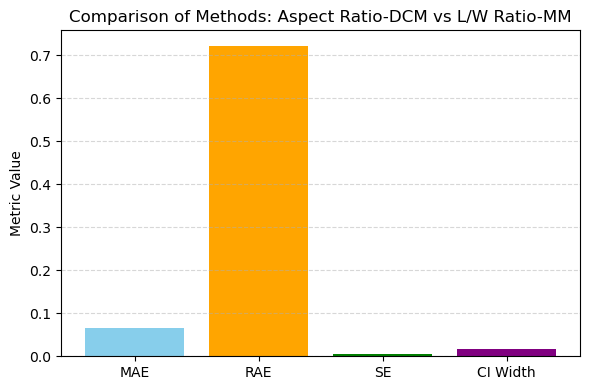

Reference Method Compared Method       MAE       RAE        SE  CI Lower  \
0  Aspect Ratio-DCM    L/W Ratio-MM  0.066416  0.721686  0.004595  1.327457   

   CI Upper  CI Width  
0  1.345505  0.018048

In [145]:
compare_two_methods_with_plot(df_100, ["Aspect Ratio-DCM", "L/W Ratio-MM"])

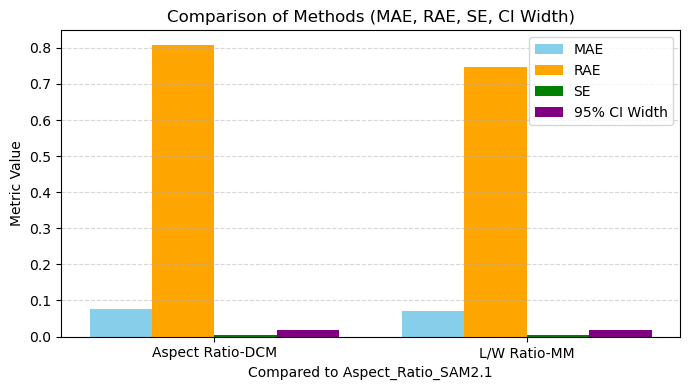

Reference Method   Compared Method       MAE       RAE        SE  \
0  Aspect_Ratio_SAM2.1  Aspect Ratio-DCM  0.075428  0.808166  0.004702   
1  Aspect_Ratio_SAM2.1      L/W Ratio-MM  0.069729  0.747104  0.004595   

   CI Lower  CI Upper  CI Width  
0  1.333933  1.352401  0.018468  
1  1.327457  1.345505  0.018048

In [146]:
compare_three_methods_with_plot(df_100, ["Aspect_Ratio_SAM2.1","Aspect Ratio-DCM", "L/W Ratio-MM"])

#### Agreement levels

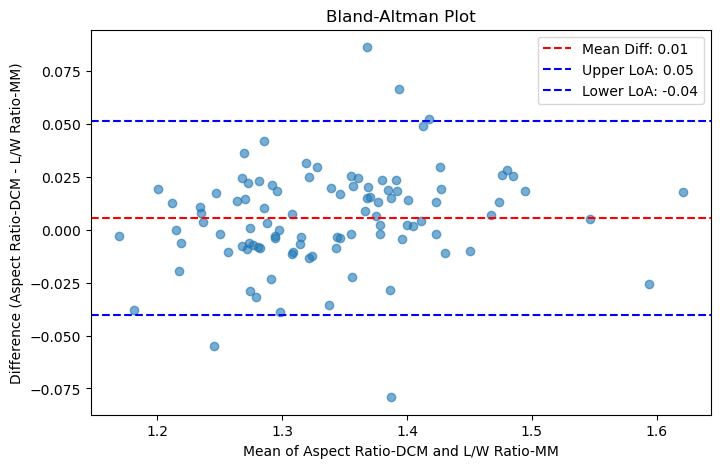

In [147]:

bland_altman_plot(df_100images["Aspect Ratio-DCM"], df_100images["L/W Ratio-MM"], label_a="Aspect Ratio-DCM", label_b="L/W Ratio-MM")

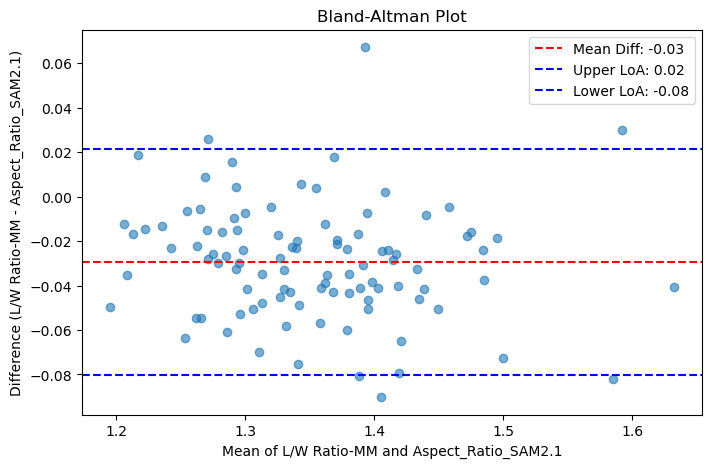

In [148]:
bland_altman_plot(df_100images["L/W Ratio-MM"], df_100images["Aspect_Ratio_SAM2.1"], label_a="L/W Ratio-MM", label_b="Aspect_Ratio_SAM2.1")

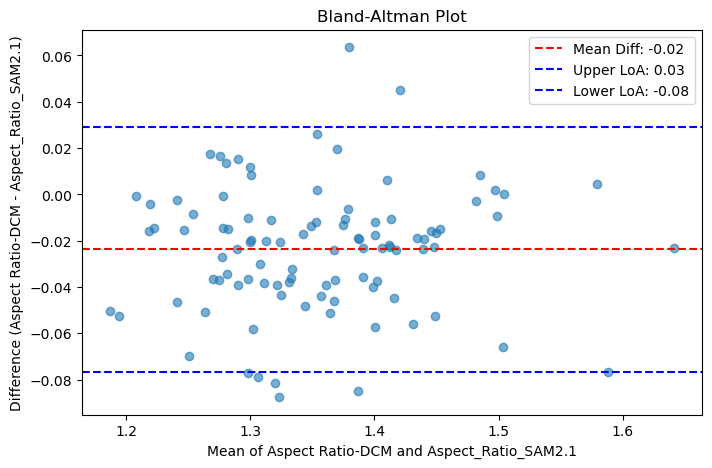

In [149]:
bland_altman_plot(df_100images["Aspect Ratio-DCM"], df_100images["Aspect_Ratio_SAM2.1"], label_a="Aspect Ratio-DCM", label_b="Aspect_Ratio_SAM2.1")

### Average seed area (pixels)

#### Descriptive statistics


Analyzing columns: ['Area(pix)-MM', 'Area_pix_SAM2.1']

Descriptive Statistics:
        Area(pix)-MM  Area_pix_SAM2.1
count     99.000000        99.000000
mean   17658.670334     81552.237410
std     7616.496815     35367.675577
min     5672.500000     26675.500000
25%    12014.550000     54697.516667
50%    15475.333333     72433.750000
75%    21461.400000    100196.683333
max    37010.000000    177932.000000

Skewness:
 Area(pix)-MM       0.711511
Area_pix_SAM2.1    0.738984
dtype: float64

Kurtosis:
 Area(pix)-MM      -0.316510
Area_pix_SAM2.1   -0.257949
dtype: float64


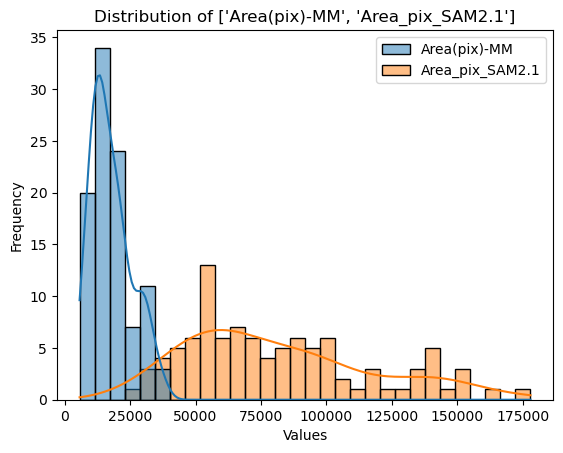


Shapiro-Wilk Test for 'Area(pix)-MM': ShapiroResult(statistic=np.float64(0.9389527245387386), pvalue=np.float64(0.0001801471883155003))

Shapiro-Wilk Test for 'Area_pix_SAM2.1': ShapiroResult(statistic=np.float64(0.9377237696749311), pvalue=np.float64(0.00015205719262819726))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(87.76467782841077), pvalue=np.float64(1.80503946450704e-17))
Pearson correlation between 'Area(pix)-MM' and 'Area_pix_SAM2.1': PearsonRResult(statistic=np.float64(0.9967224996716639), pvalue=np.float64(9.507445397664837e-108))


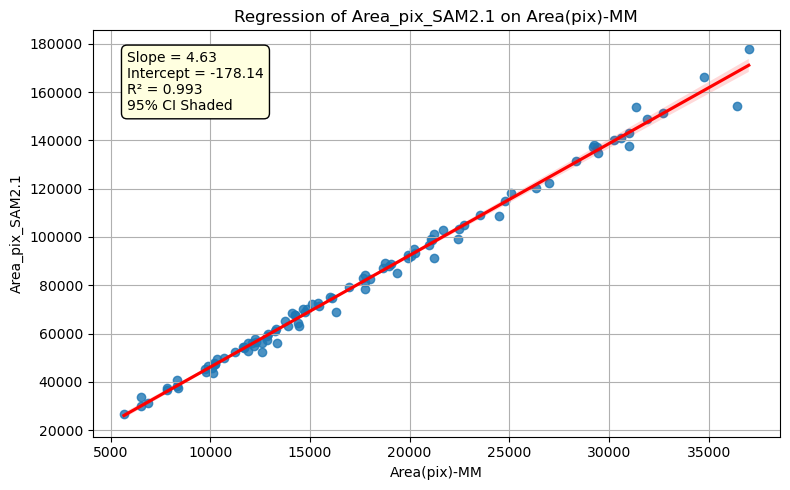


ANOVA result across ['Area(pix)-MM', 'Area_pix_SAM2.1']: F_onewayResult(statistic=np.float64(308.7795083552356), pvalue=np.float64(3.9603181486417526e-42))
Kruskal-Wallis Test across ['Area(pix)-MM', 'Area_pix_SAM2.1']: KruskalResult(statistic=np.float64(145.59088832592704), pvalue=np.float64(1.5950703564191256e-33))


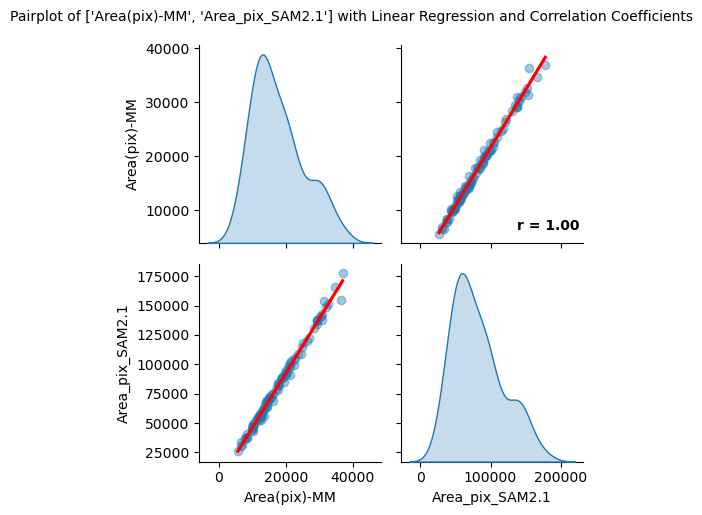

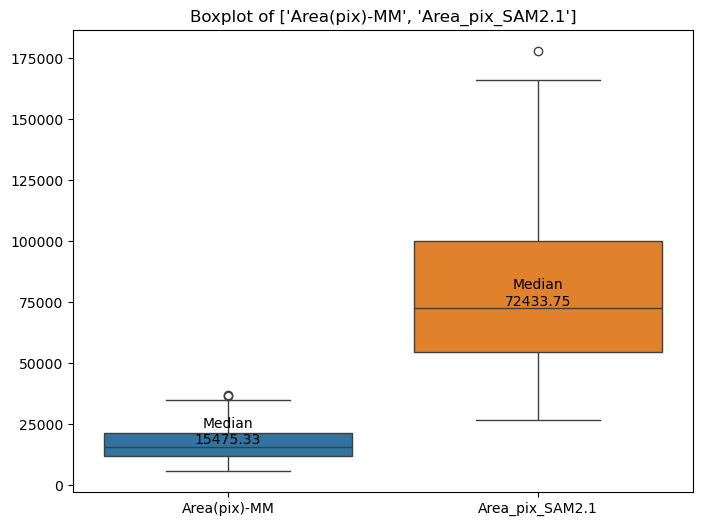

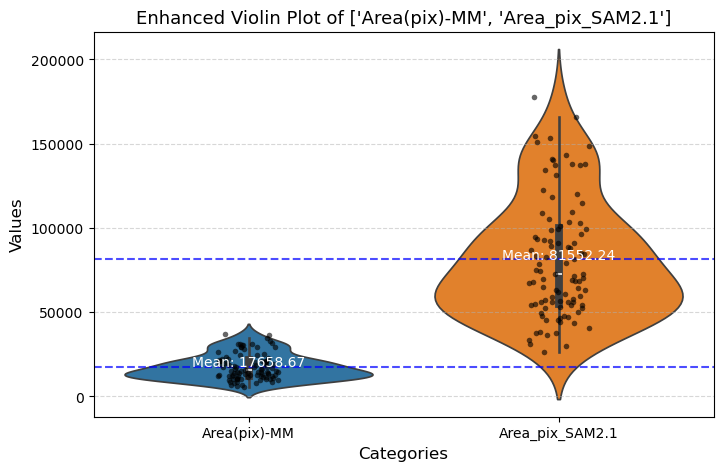

In [150]:
analyze_columns(df_100images, ["Area(pix)-MM", "Area_pix_SAM2.1"])

#### Effect size

In [151]:
# Cohen-s d test for Area in mm2
effect_size(df_100images, ["Area(pix)-MM", "Area_pix_SAM2.1"])

The Cohen's d for Area(pix)-MM and Area_pix_SAM2.1: -2.498 
Effect Size Interpretation for Area(pix)-MM and Area_pix_SAM2.1: Large


#### Error analysis

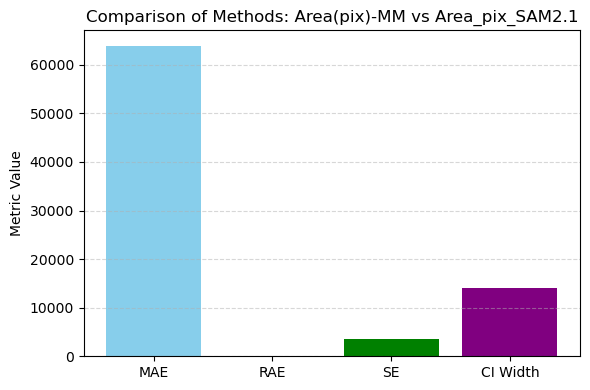

Reference Method  Compared Method           MAE        RAE           SE  \
0     Area(pix)-MM  Area_pix_SAM2.1  63893.567076  10.255283  3554.585139   

       CI Lower      CI Upper      CI Width  
0  74498.278887  88606.195933  14107.917046

In [152]:
compare_two_methods_with_plot(df_100images, ["Area(pix)-MM", "Area_pix_SAM2.1"])

#### Levels of agreement

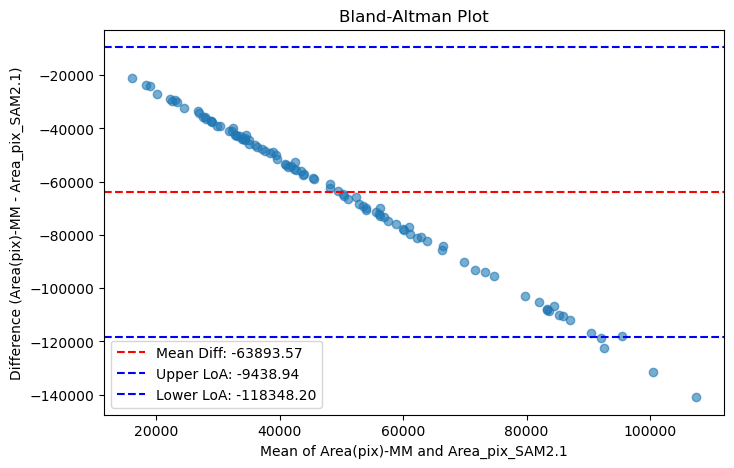

In [153]:
bland_altman_plot(df_100images["Area(pix)-MM"], df_100images["Area_pix_SAM2.1"], label_a="Area(pix)-MM", label_b="Area_pix_SAM2.1")


### Circularity

#### Descriptive statistics


Analyzing columns: ['Circularity-MM', 'Circularity_SAM2.1']

Descriptive Statistics:
        Circularity-MM  Circularity_SAM2.1
count       99.000000           99.000000
mean         1.174796            1.168559
std          0.025194            0.020676
min          1.133777            1.126153
25%          1.160101            1.155299
50%          1.168515            1.166207
75%          1.185058            1.178689
max          1.301300            1.250485

Skewness:
 Circularity-MM        2.273831
Circularity_SAM2.1    1.014628
dtype: float64

Kurtosis:
 Circularity-MM        8.286181
Circularity_SAM2.1    2.222230
dtype: float64


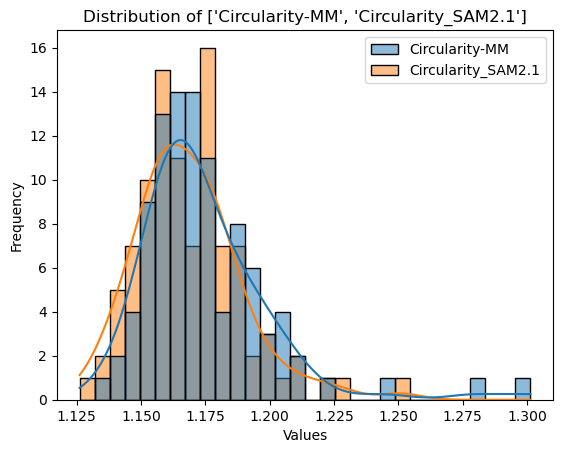


Shapiro-Wilk Test for 'Circularity-MM': ShapiroResult(statistic=np.float64(0.8233540422433849), pvalue=np.float64(1.5777230439639853e-09))

Shapiro-Wilk Test for 'Circularity_SAM2.1': ShapiroResult(statistic=np.float64(0.9500168495501718), pvalue=np.float64(0.0008913492937616054))

Levene's Test for equality of variances: LeveneResult(statistic=np.float64(0.19306090332195133), pvalue=np.float64(0.660865214503322))
Pearson correlation between 'Circularity-MM' and 'Circularity_SAM2.1': PearsonRResult(statistic=np.float64(0.8680536744684763), pvalue=np.float64(2.9452171263872036e-31))


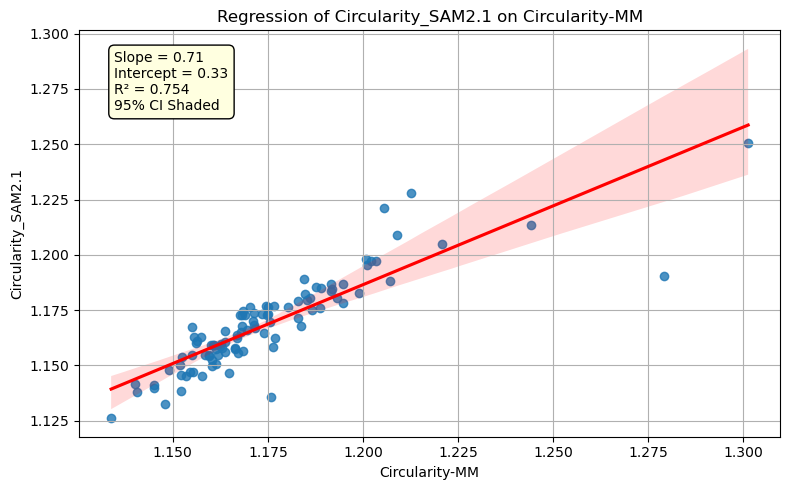


ANOVA result across ['Circularity-MM', 'Circularity_SAM2.1']: F_onewayResult(statistic=np.float64(3.6245591906191863), pvalue=np.float64(0.058397656468592))
Kruskal-Wallis Test across ['Circularity-MM', 'Circularity_SAM2.1']: KruskalResult(statistic=np.float64(2.984695439240795), pvalue=np.float64(0.08405509876545836))


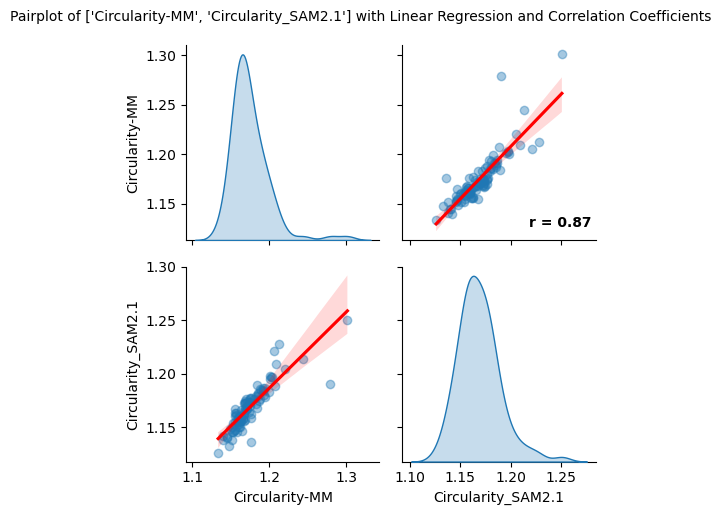

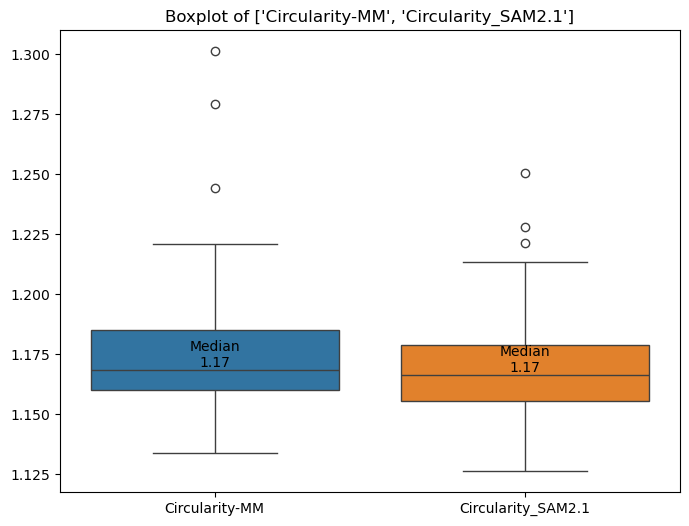

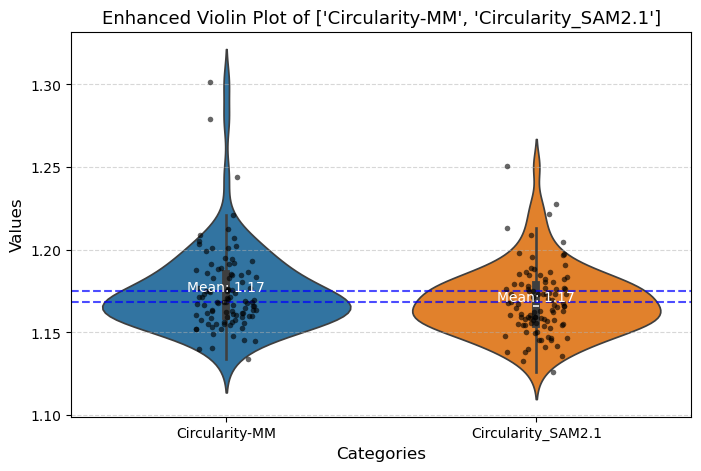

In [154]:
analyze_columns(df_100images, ["Circularity-MM","Circularity_SAM2.1"])

#### Effect size

In [155]:
# Cohen-s d test for Area in pixels
effect_size(df_100images, ["Circularity-MM", "Circularity_SAM2.1"])

The Cohen's d for Circularity-MM and Circularity_SAM2.1: 0.271 
Effect Size Interpretation for Circularity-MM and Circularity_SAM2.1: Small to Medium


#### Error analysis

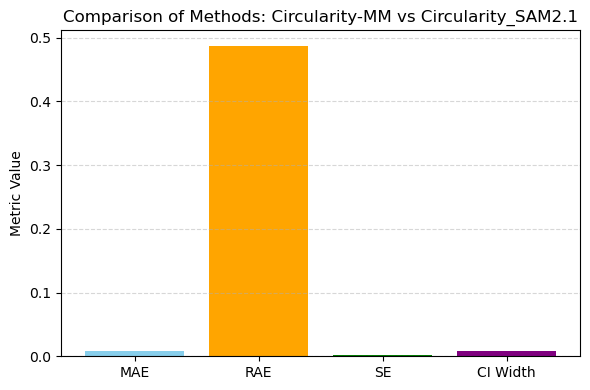

Reference Method     Compared Method       MAE       RAE        SE  \
0   Circularity-MM  Circularity_SAM2.1  0.008417  0.487099  0.002078   

   CI Lower  CI Upper  CI Width  
0  1.164436  1.172683  0.008248

In [156]:
compare_two_methods_with_plot(df_100images, ["Circularity-MM", "Circularity_SAM2.1"])

#### Agreement levels

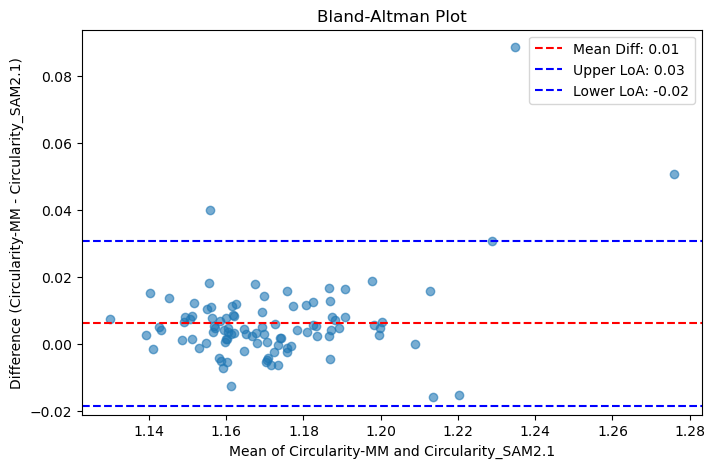

In [157]:
bland_altman_plot(df_100images["Circularity-MM"], df_100images["Circularity_SAM2.1"], label_a="Circularity-MM", label_b="Circularity_SAM2.1")

## Conclusion:
Despite some minor systematic biases and small statistical differences, SAM2.1 demonstrated strong alignment with both the MM (silver standard) and DCM (gold standard) across all measured parameters. Length and width estimates from SAM2.1 showed high precision, with small mean absolute errors and narrow confidence intervals, and their correlations with both standards were consistently strong. Area measurements in both mm² and pixels reflected high linear agreement, particularly with MM, supporting SAM2.1’s capacity for accurate spatial quantification. Aspect ratio and circularity, though exhibiting moderate correlations and minor overestimation, still fell within acceptable limits of agreement and showed reasonable consistency. Overall, the performance of SAM2.1 closely mirrors that of established reference methods, confirming its validity as a reliable tool for bean morphological assessment. These results support the use of SAM2.1 for high-throughput phenotyping workflows where both accuracy and consistency relative to gold and silver standards are essential.

#### Overall, SAM2.1 measurements aligned closely with both MM (silver standard) and DCM (gold standard), demonstrating high consistency, precision, and acceptable agreement across all parameters. These results support SAM2.1 as a reliable method for morphological analysis in comparison to established standards.


In [158]:
df_100images.index

Index(['Vf1-1-2', 'Vf104-1-2', 'Vf106-1-2', 'Vf108-1-1', 'Vf109-1-1',
       'Vf111-1-1', 'Vf114-1-2', 'Vf122-1-2', 'Vf123-1-1', 'Vf126-1-1',
       'Vf134-1-1', 'Vf135-1-2', 'Vf136-1-1', 'Vf144-1-1', 'Vf147-1-1',
       'Vf149-1-1', 'Vf155-1-1', 'Vf161-1-1', 'Vf163-1-1', 'Vf164-1-1',
       'Vf167-1-1', 'Vf170-1-1', 'Vf179-1-1', 'Vf18-1-1', 'Vf180-1-1',
       'Vf193-1-1', 'Vf203-1-1', 'Vf209-1-1', 'Vf216-1-1', 'Vf231-1-2',
       'Vf238-1-1', 'Vf239-1-1', 'Vf241-1-1', 'Vf244-1-1', 'Vf25-1-1',
       'Vf252-1-1', 'Vf256-1-1', 'Vf258-1-1', 'Vf259-1-1', 'Vf261-1-1',
       'Vf263-1-1', 'Vf264-1-1', 'Vf268-1-1', 'Vf269-1-1', 'Vf270-1-1',
       'Vf272-1-1', 'Vf277-1-1', 'Vf289-1-1', 'Vf302-1-1', 'Vf307-1-1',
       'Vf308-1-1', 'Vf332-1-1', 'Vf339-1-1', 'Vf352-1-1', 'Vf359-1-1',
       'Vf367-1-1', 'Vf375-1-1', 'Vf378-1-1', 'Vf384-1-1', 'Vf387-1-1',
       'Vf389-1-1', 'Vf390-1-1', 'Vf392-1-1', 'Vf398-1-1', 'Vf399-1-1',
       'Vf403-1-1', 'Vf405-1-1', 'Vf417-1-1', 'Vf420-1-1', 'Vf421-1-